In [12]:
# Install all required packages for the project
!pip install -q pytorch-lightning torchmetrics scikit-learn pandas numpy matplotlib seaborn plotly

print("✅ Cell 1 done: All libraries installed successfully.")


✅ Cell 1 done: All libraries installed successfully.


In [13]:
"""
Core libraries for data manipulation and visualization
These are used throughout the project for handling spectral data
and producing plots during EDA and evaluation.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Suppress warnings for cleaner, more readable output
warnings.filterwarnings('ignore')

# Set consistent visualization defaults
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Cell 2 done: Core libraries imported and visualization settings applied.")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")


✅ Cell 2 done: Core libraries imported and visualization settings applied.
NumPy version: 2.0.2
Pandas version: 2.2.2


In [14]:
"""
Machine Learning and Deep Learning libraries
Used for traditional ML (SVM, Random Forest) and
deep learning models with PyTorch Lightning.
"""

# ==============================
# Scikit-learn (Traditional ML)
# ==============================
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score
)

# ==============================
# PyTorch (Deep Learning)
# ==============================
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset

# ==============================
# PyTorch Lightning
# ==============================
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning.loggers import CSVLogger

# ==============================
# Torchmetrics
# ==============================
from torchmetrics import Accuracy, F1Score, Precision, Recall

print("✅ Cell 3 done: ML and DL libraries imported successfully.")
print(f"PyTorch version: {torch.__version__}")
print(f"PyTorch Lightning version: {pl.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")


✅ Cell 3 done: ML and DL libraries imported successfully.
PyTorch version: 2.8.0+cu126
PyTorch Lightning version: 2.6.0
CUDA available: False


In [15]:
"""
Generate a synthetic atomic spectroscopy dataset.

Each sample represents spectral intensity values across fixed wavelength bands.
Element-specific peaks are injected to mimic real atomic emission behavior.
"""

# Reproducibility
np.random.seed(42)

# Define atomic elements (classes)
elements = ["Hydrogen", "Helium", "Neon", "Argon"]

# Dataset parameters
samples_per_element = 250
num_features = 50  # intensity at 50 wavelength bands

data = []
labels = []

for element in elements:
    for _ in range(samples_per_element):
        # Base noise simulating measurement uncertainty
        spectrum = np.random.normal(loc=0.0, scale=0.4, size=num_features)

        # Inject element-specific spectral peaks
        if element == "Hydrogen":
            spectrum[10] += 3.0
            spectrum[25] += 2.0
        elif element == "Helium":
            spectrum[15] += 3.0
            spectrum[30] += 2.0
        elif element == "Neon":
            spectrum[20] += 3.0
            spectrum[35] += 2.0
        elif element == "Argon":
            spectrum[12] += 3.0
            spectrum[40] += 2.0

        data.append(spectrum)
        labels.append(element)

# Create DataFrame
df = pd.DataFrame(data, columns=[f"band_{i}" for i in range(num_features)])
df["element"] = labels

print("✅ Cell 4 done: Synthetic atomic spectral dataset generated.")
print(f"📊 Dataset shape: {df.shape}")
print("\nSample rows:")
print(df.head())


✅ Cell 4 done: Synthetic atomic spectral dataset generated.
📊 Dataset shape: (1000, 51)

Sample rows:
     band_0    band_1    band_2    band_3    band_4    band_5    band_6  \
0  0.198686 -0.055306  0.259075  0.609212 -0.093661 -0.093655  0.631685   
1  0.129634 -0.154033 -0.270769  0.244671  0.412400  0.372512 -0.335687   
2 -0.566148 -0.168258 -0.137086 -0.320911 -0.064514  0.161620  0.754474   
3  0.100197  0.138579 -0.272010  0.092901  0.117229 -0.285741  0.746310   
4  0.143115  0.224314  0.433220  0.421521 -0.551068 -0.375130  0.206014   

     band_7    band_8    band_9  ...   band_41   band_42   band_43   band_44  \
0  0.306974 -0.187790  0.217024  ...  0.068547 -0.046259 -0.120441 -0.591409   
1 -0.123685  0.132505  0.390218  ...  0.387458 -0.280821 -0.131065 -0.156843   
2  0.069831  0.103020 -0.029778  ...  0.522857 -0.642993  0.073854  0.103953   
3  0.189533 -0.476521  0.262621  ...  0.342560  0.085637 -0.498296  0.069272   
4  0.205514  0.206019  1.541093  ... -0.045895 

In [16]:
"""
Initial inspection of the synthetic atomic spectroscopy dataset.

This step helps verify:
- Dataset dimensions
- Column structure
- Data types
- Basic sanity checks before EDA
"""

print("=" * 80)
print("📊 DATASET OVERVIEW")
print("=" * 80)

# Dataset shape
print(f"\nTotal samples: {df.shape[0]}")
print(f"Total columns: {df.shape[1]}")

# Preview data
print("\n🔹 First 5 rows:")
display(df.head())

print("\n🔹 Last 5 rows:")
display(df.tail())

# Column names
print("\n🔹 Column names:")
print(df.columns.tolist())

# Data types
print("\n🔹 Data types:")
print(df.dtypes.value_counts())

print("\n✅ Cell 5 done: Initial data inspection complete.")


📊 DATASET OVERVIEW

Total samples: 1000
Total columns: 51

🔹 First 5 rows:


,band_0,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_41,band_42,band_43,band_44,band_45,band_46,band_47,band_48,band_49,element
0,0.198686,-0.055306,0.259075,0.609212,-0.093661,-0.093655,0.631685,0.306974,-0.187790,0.217024,...,0.068547,-0.046259,-0.120441,-0.591409,-0.287938,-0.184256,0.422849,0.137447,-0.705216,Hydrogen
1,0.129634,-0.154033,-0.270769,0.244671,0.412400,0.372512,-0.335687,-0.123685,0.132505,0.390218,...,0.387458,-0.280821,-0.131065,-0.156843,-0.585406,0.118448,0.104422,0.002045,-0.093835,Hydrogen
2,-0.566148,-0.168258,-0.137086,-0.320911,-0.064514,0.161620,0.754474,0.069831,0.103020,-0.029778,...,0.522857,-0.642993,0.073854,0.103953,0.312729,-0.494780,-0.528183,0.208777,0.118794,Hydrogen
3,0.100197,0.138579,-0.272010,0.092901,0.117229,-0.285741,0.746310,0.189533,-0.476521,0.262621,...,0.342560,0.085637,-0.498296,0.069272,0.154127,-0.353543,0.061490,0.023283,-0.457188,Hydrogen
4,0.143115,0.224314,0.433220,0.421521,-0.551068,-0.375130,0.206014,0.205514,0.206019,1.541093,...,-0.045895,0.201995,0.346302,-0.480119,-0.133800,-0.189978,-0.261332,0.706182,0.161993,Hydrogen



🔹 Last 5 rows:


,band_0,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_41,band_42,band_43,band_44,band_45,band_46,band_47,band_48,band_49,element
995,0.268351,0.386188,0.046966,0.376219,1.060003,-0.751357,0.020763,-0.537247,0.624287,0.098524,...,-0.357704,-0.030391,0.068001,-0.743287,0.130031,-0.179817,-0.929122,-0.184352,0.151869,Argon
996,-0.162272,-0.186661,0.061546,-0.191697,-0.106861,-0.530584,-0.207314,0.753632,0.071366,0.107650,...,0.220067,-0.616037,0.508720,-0.446382,-0.544734,0.487224,-0.001128,-0.122499,0.627058,Argon
997,0.292433,-0.179800,-0.053754,0.429565,-0.385430,0.577383,-0.177344,-0.348596,0.434765,0.293842,...,-0.260014,-0.239339,-0.027050,0.304652,-0.275592,0.195516,0.311304,0.460015,0.195914,Argon
998,0.029315,-0.432015,0.109004,-0.150515,0.550595,0.036508,-0.063988,0.566371,-0.192950,-0.001278,...,0.189439,-0.249800,-0.214124,0.317497,-0.358237,-0.476815,0.274091,-0.195275,-0.112000,Argon
999,-0.720446,-0.507719,0.088271,-0.093431,0.363670,-0.359889,-0.066425,0.018594,-0.081651,0.239003,...,-0.295250,-0.136917,0.604048,-0.993990,0.022720,-0.009969,0.200034,0.106086,0.606324,Argon



🔹 Column names:
['band_0', 'band_1', 'band_2', 'band_3', 'band_4', 'band_5', 'band_6', 'band_7', 'band_8', 'band_9', 'band_10', 'band_11', 'band_12', 'band_13', 'band_14', 'band_15', 'band_16', 'band_17', 'band_18', 'band_19', 'band_20', 'band_21', 'band_22', 'band_23', 'band_24', 'band_25', 'band_26', 'band_27', 'band_28', 'band_29', 'band_30', 'band_31', 'band_32', 'band_33', 'band_34', 'band_35', 'band_36', 'band_37', 'band_38', 'band_39', 'band_40', 'band_41', 'band_42', 'band_43', 'band_44', 'band_45', 'band_46', 'band_47', 'band_48', 'band_49', 'element']

🔹 Data types:
float64    50
object      1
Name: count, dtype: int64

✅ Cell 5 done: Initial data inspection complete.


In [17]:
"""
Data quality checks to ensure the dataset is suitable
for machine learning and deep learning models.
"""

print("=" * 80)
print("🔍 DATA QUALITY CHECK")
print("=" * 80)

# Check for missing values
missing_values = df.isnull().sum().sum()
print(f"\n❓ Total missing values in dataset: {missing_values}")

if missing_values == 0:
    print("   ✅ No missing values detected.")
else:
    print("   ⚠️ Missing values found. Details:")
    print(df.isnull().sum()[df.isnull().sum() > 0])

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\n🔁 Duplicate rows: {duplicate_rows}")

if duplicate_rows == 0:
    print("   ✅ No duplicate rows detected.")
else:
    print("   ⚠️ Duplicate rows found.")

# Basic statistical summary (numerical features only)
print("\n📈 Statistical summary of spectral features:")
display(df.drop(columns=["element"]).describe())

# Class distribution
print("\n🏷️ Class distribution:")
display(df["element"].value_counts())

print("\n✅ Cell 6 done: Data quality checks completed.")


🔍 DATA QUALITY CHECK

❓ Total missing values in dataset: 0
   ✅ No missing values detected.

🔁 Duplicate rows: 0
   ✅ No duplicate rows detected.

📈 Statistical summary of spectral features:


,band_0,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_40,band_41,band_42,band_43,band_44,band_45,band_46,band_47,band_48,band_49
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.020458,0.009478,-0.005827,0.005638,-0.015263,-0.003068,-0.000174,0.002927,0.006150,0.004332,...,0.479928,-0.003079,-0.005635,0.000160,0.005879,-0.003996,0.006220,0.009510,0.005967,-0.006077
std,0.406529,0.384031,0.405026,0.386127,0.398473,0.417934,0.390133,0.404088,0.410593,0.385275,...,0.968790,0.406388,0.400708,0.394056,0.410145,0.397118,0.404952,0.406999,0.396047,0.390498
min,-1.718156,-1.158502,-1.333957,-1.197483,-1.300133,-1.217863,-1.120765,-1.232239,-1.323160,-1.298655,...,-1.381342,-1.786242,-1.280228,-1.186701,-1.462035,-1.114459,-1.164864,-1.335743,-1.222284,-1.263635
25%,-0.255832,-0.266770,-0.287988,-0.267152,-0.294962,-0.293369,-0.251599,-0.271127,-0.259706,-0.266277,...,-0.177467,-0.274118,-0.275103,-0.267083,-0.275740,-0.287922,-0.273493,-0.273046,-0.263612,-0.274834
50%,0.017619,0.018525,-0.016096,0.015395,-0.008077,0.001118,-0.001961,-0.000823,-0.000699,-0.000781,...,0.158343,-0.008160,-0.024246,0.003495,0.011958,0.010865,0.017533,-0.000018,0.025770,-0.006923
75%,0.293284,0.271140,0.262937,0.282956,0.271758,0.275383,0.254682,0.269124,0.277175,0.276642,...,1.001923,0.270186,0.272541,0.255373,0.285924,0.278742,0.268435,0.289881,0.282088,0.256133
max,1.182213,1.576932,1.476650,1.101292,1.152639,1.254674,1.238636,1.334107,1.313647,1.541093,...,3.277203,1.411622,1.057164,1.791634,1.274630,1.570495,1.314289,1.286150,1.350953,1.289171



🏷️ Class distribution:


element
Hydrogen    250
Helium      250
Neon        250
Argon       250
Name: count, dtype: int64


✅ Cell 6 done: Data quality checks completed.


In [18]:
"""
Identify feature matrix (X) and target vector (y)
for downstream ML and DL models.
"""

print("=" * 80)
print("🎯 FEATURE & TARGET IDENTIFICATION")
print("=" * 80)

# Target column (known from synthetic generation)
target_column = "element"

# Separate features and target
X = df.drop(columns=[target_column])
y = df[target_column]

print(f"\nTarget column: '{target_column}'")
print(f"Number of classes: {y.nunique()}")
print(f"Classes: {y.unique()}")

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Sanity check
print("\nFeature sample:")
display(X.head())

print("\nTarget sample:")
display(y.head())

print("\n✅ Cell 8 done: Features and target successfully identified.")


🎯 FEATURE & TARGET IDENTIFICATION

Target column: 'element'
Number of classes: 4
Classes: ['Hydrogen' 'Helium' 'Neon' 'Argon']

Feature matrix shape: (1000, 50)
Target vector shape: (1000,)

Feature sample:


,band_0,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_40,band_41,band_42,band_43,band_44,band_45,band_46,band_47,band_48,band_49
0,0.198686,-0.055306,0.259075,0.609212,-0.093661,-0.093655,0.631685,0.306974,-0.187790,0.217024,...,0.295387,0.068547,-0.046259,-0.120441,-0.591409,-0.287938,-0.184256,0.422849,0.137447,-0.705216
1,0.129634,-0.154033,-0.270769,0.244671,0.412400,0.372512,-0.335687,-0.123685,0.132505,0.390218,...,0.038831,0.387458,-0.280821,-0.131065,-0.156843,-0.585406,0.118448,0.104422,0.002045,-0.093835
2,-0.566148,-0.168258,-0.137086,-0.320911,-0.064514,0.161620,0.754474,0.069831,0.103020,-0.029778,...,0.090984,0.522857,-0.642993,0.073854,0.103953,0.312729,-0.494780,-0.528183,0.208777,0.118794
3,0.100197,0.138579,-0.272010,0.092901,0.117229,-0.285741,0.746310,0.189533,-0.476521,0.262621,...,-0.178606,0.342560,0.085637,-0.498296,0.069272,0.154127,-0.353543,0.061490,0.023283,-0.457188
4,0.143115,0.224314,0.433220,0.421521,-0.551068,-0.375130,0.206014,0.205514,0.206019,1.541093,...,-0.317008,-0.045895,0.201995,0.346302,-0.480119,-0.133800,-0.189978,-0.261332,0.706182,0.161993



Target sample:


0    Hydrogen
1    Hydrogen
2    Hydrogen
3    Hydrogen
4    Hydrogen
Name: element, dtype: object


✅ Cell 8 done: Features and target successfully identified.


📊 CLASS DISTRIBUTION ANALYSIS

Samples per element:
element
Hydrogen    250
Helium      250
Neon        250
Argon       250
Name: count, dtype: int64


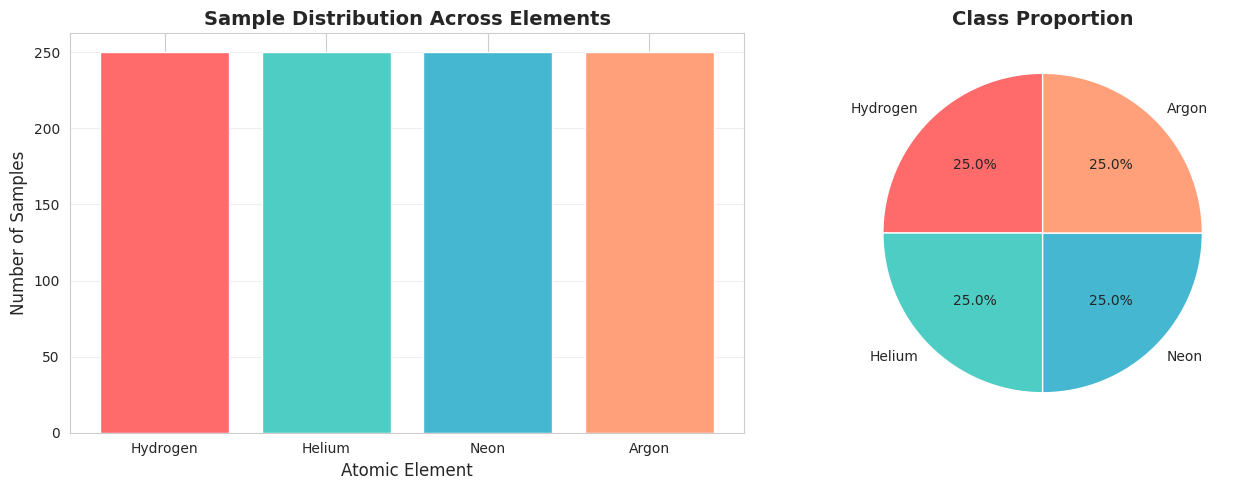


✅ Cell 1 done: Class distribution visualized.


In [21]:
"""
Visualize the distribution of samples across atomic elements.
Balanced classes are important for fair model training.
"""

print("=" * 80)
print("📊 CLASS DISTRIBUTION ANALYSIS")
print("=" * 80)

# Count samples per class
class_counts = y.value_counts()
print("\nSamples per element:")
print(class_counts)

# Visualize distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(
    class_counts.index,
    class_counts.values,
    color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
)
axes[0].set_xlabel('Atomic Element', fontsize=12)
axes[0].set_ylabel('Number of Samples', fontsize=12)
axes[0].set_title('Sample Distribution Across Elements', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(
    class_counts.values,
    labels=class_counts.index,
    autopct='%1.1f%%',
    colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'],
    startangle=90
)
axes[1].set_title('Class Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Cell 1 done: Class distribution visualized.")


📈 SAMPLE SPECTRAL SIGNATURES


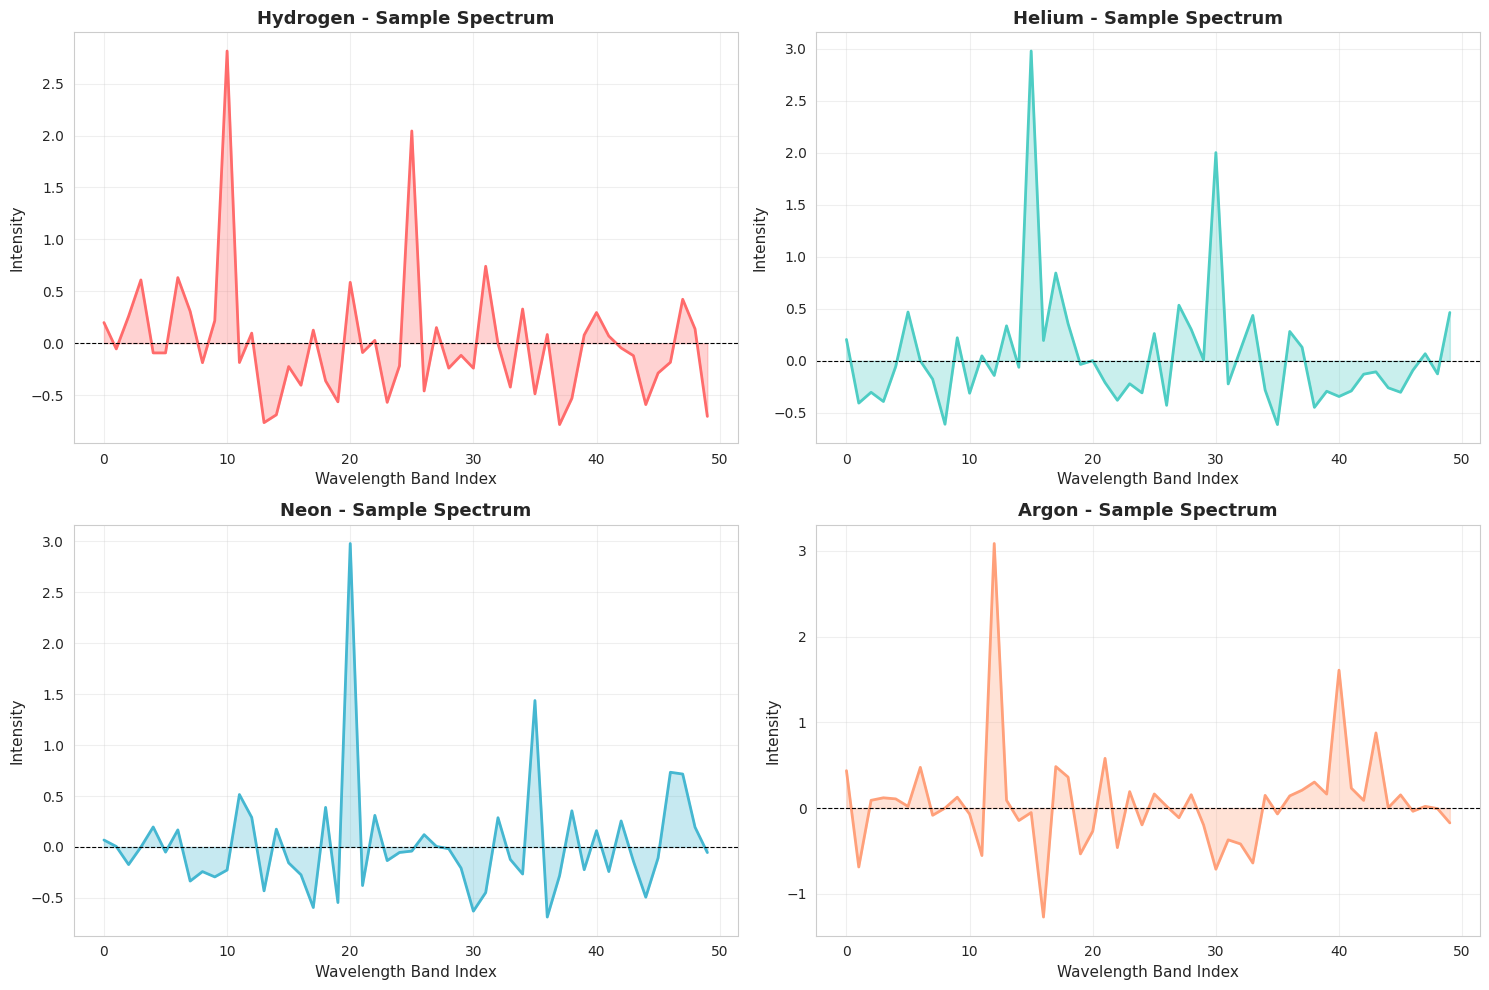


✅ Cell 2 done: Sample spectral signatures plotted.


In [22]:
"""
Plot representative spectral signatures for each element.
This shows the characteristic emission peaks that differentiate elements.
"""

print("=" * 80)
print("📈 SAMPLE SPECTRAL SIGNATURES")
print("=" * 80)

# Create wavelength bands (x-axis)
wavelengths = np.arange(X.shape[1])

# Plot one sample spectrum per element
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for idx, element in enumerate(elements):
    # Get first sample of this element
    sample_spectrum = X[y == element].iloc[0].values
    
    # Plot spectrum
    axes[idx].plot(wavelengths, sample_spectrum, color=colors[idx], linewidth=2)
    axes[idx].fill_between(wavelengths, sample_spectrum, alpha=0.3, color=colors[idx])
    
    axes[idx].set_xlabel('Wavelength Band Index', fontsize=11)
    axes[idx].set_ylabel('Intensity', fontsize=11)
    axes[idx].set_title(f'{element} - Sample Spectrum', fontsize=13, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].axhline(y=0, color='black', linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()

print("\n✅ Cell 2 done: Sample spectral signatures plotted.")


🔬 AVERAGE SPECTRAL PROFILES


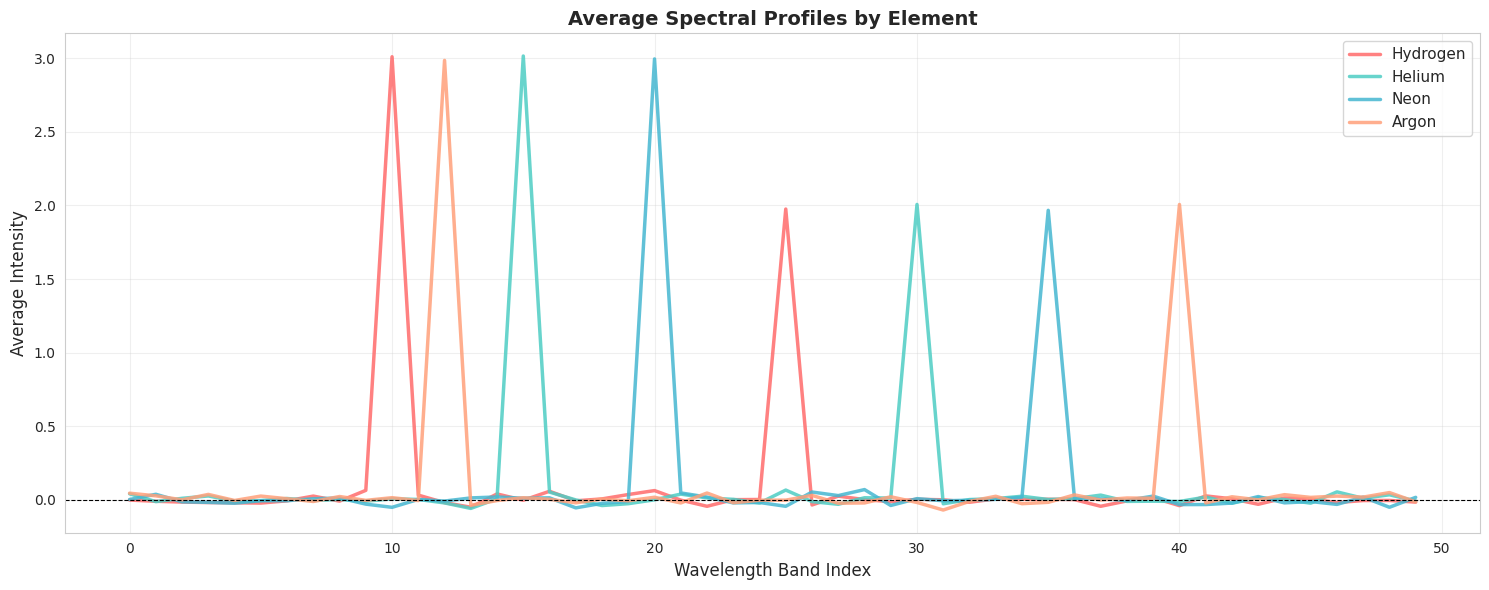


Top 3 peak wavelength bands per element:
Hydrogen  : bands [10 25  9] | intensities [3.01 1.98 0.06]
Helium    : bands [15 30 25] | intensities [3.02 2.01 0.07]
Neon      : bands [20 35 28] | intensities [3.   1.97 0.07]
Argon     : bands [12 40 48] | intensities [2.99 2.01 0.05]

✅ Cell 3 done: Average spectral profiles analyzed.


In [23]:
"""
Compute and visualize the average spectral profile for each element.
Averaging reduces noise and reveals characteristic peak positions.
"""

print("=" * 80)
print("🔬 AVERAGE SPECTRAL PROFILES")
print("=" * 80)

# Calculate mean spectrum for each element
mean_spectra = {}

for element in elements:
    mean_spectra[element] = X[y == element].mean(axis=0).values

# Plot all average spectra together
plt.figure(figsize=(15, 6))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for idx, element in enumerate(elements):
    plt.plot(
        wavelengths,
        mean_spectra[element],
        label=element,
        color=colors[idx],
        linewidth=2.5,
        alpha=0.85
    )

plt.xlabel('Wavelength Band Index', fontsize=12)
plt.ylabel('Average Intensity', fontsize=12)
plt.title('Average Spectral Profiles by Element', fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

# Print dominant peak locations
print("\nTop 3 peak wavelength bands per element:")
for element in elements:
    peaks = np.argsort(mean_spectra[element])[-3:][::-1]
    print(
        f"{element:10s}: bands {peaks} | "
        f"intensities {mean_spectra[element][peaks].round(2)}"
    )

print("\n✅ Cell 3 done: Average spectral profiles analyzed.")


🔥 SPECTRAL INTENSITY HEATMAP


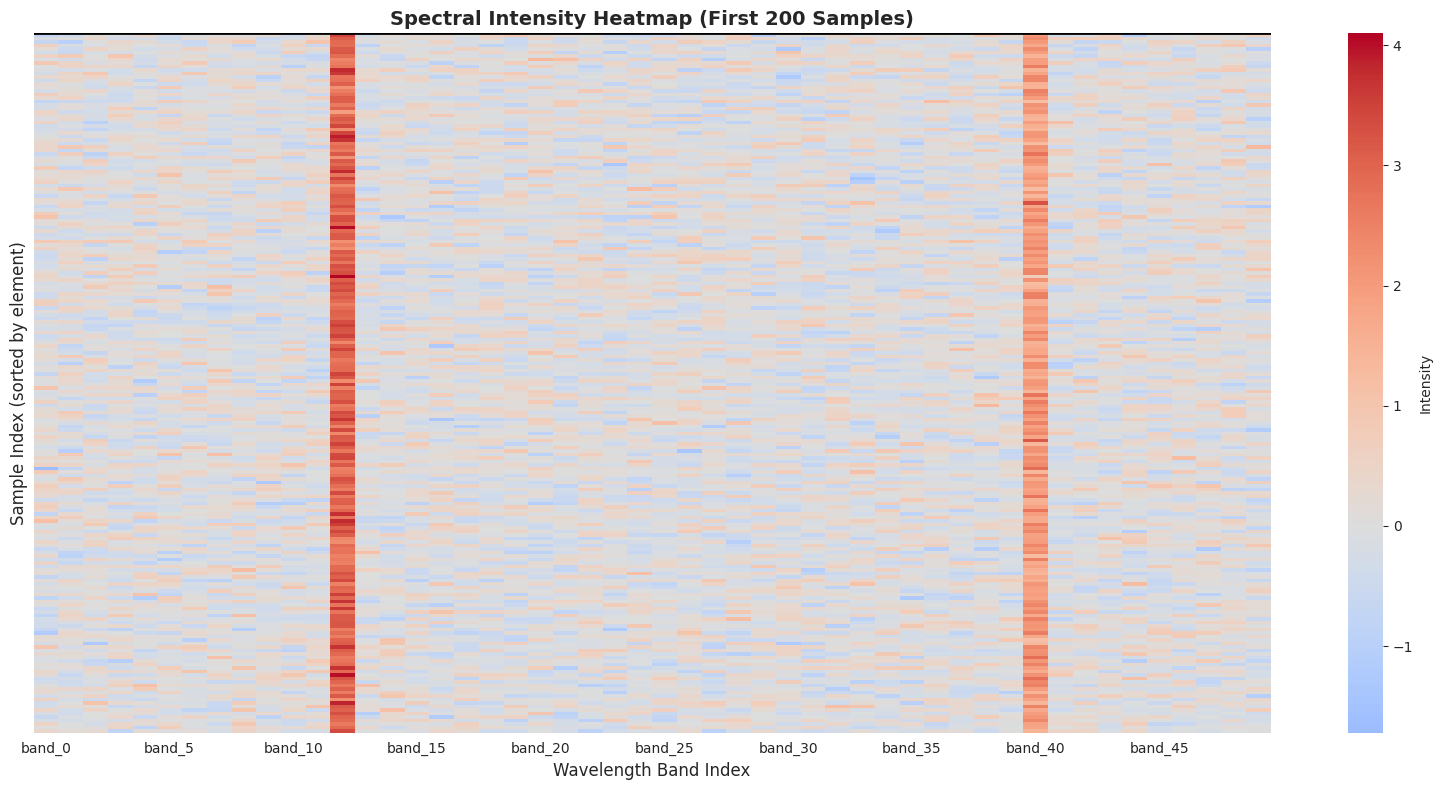


✅ Cell 4 done: Heatmap generated successfully.


In [24]:
"""
Heatmap visualization showing intensity patterns across all samples.
Rows = samples, Columns = wavelength bands, Color = intensity.
"""

print("=" * 80)
print("🔥 SPECTRAL INTENSITY HEATMAP")
print("=" * 80)

# Sort dataset by element for clearer block structure
df_sorted = df.sort_values('element').reset_index(drop=True)

X_sorted = df_sorted.drop(columns=['element'])

# Plot heatmap (limit to first 200 samples for readability)
plt.figure(figsize=(16, 8))
sns.heatmap(
    X_sorted.iloc[:200, :],
    cmap='coolwarm',
    center=0,
    cbar_kws={'label': 'Intensity'},
    xticklabels=5,
    yticklabels=False
)

plt.xlabel('Wavelength Band Index', fontsize=12)
plt.ylabel('Sample Index (sorted by element)', fontsize=12)
plt.title('Spectral Intensity Heatmap (First 200 Samples)', fontsize=14, fontweight='bold')

# Draw class boundary lines (based on balanced dataset)
boundaries = [0, 250, 500, 750, 1000]
for b in boundaries:
    if b <= 200:
        plt.axhline(y=b, color='black', linewidth=2)

plt.tight_layout()
plt.show()

print("\n✅ Cell 4 done: Heatmap generated successfully.")


📉 FEATURE VARIANCE ANALYSIS


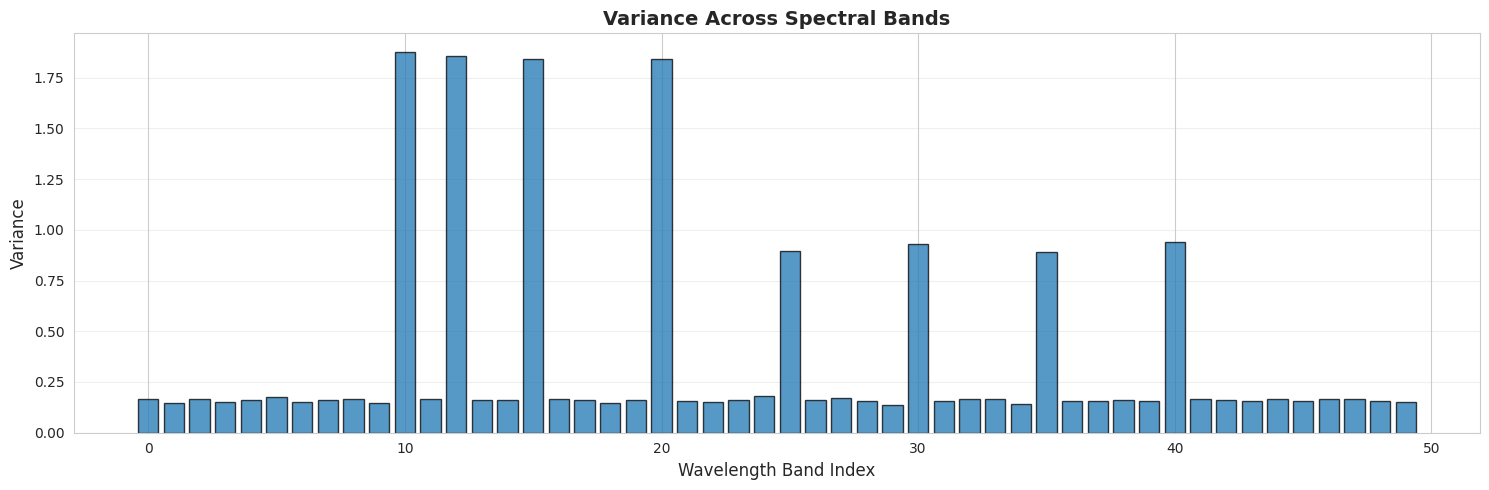


Mean variance: 0.3552
Std deviation of variance: 0.4866

High-variance bands (top 25%):
[ 5  8 10 12 15 20 24 25 27 30 35 40 44]

✅ Cell 5 done: High-variance spectral bands identified.


In [25]:
"""
Analyze variance across spectral bands.
High-variance features are more informative for classification.
"""

print("=" * 80)
print("📉 FEATURE VARIANCE ANALYSIS")
print("=" * 80)

# Calculate variance for each wavelength band
feature_variance = X.var(axis=0).values

# Plot variance across wavelength bands
plt.figure(figsize=(15, 5))
plt.bar(
    wavelengths,
    feature_variance,
    alpha=0.75,
    edgecolor='black'
)
plt.xlabel('Wavelength Band Index', fontsize=12)
plt.ylabel('Variance', fontsize=12)
plt.title('Variance Across Spectral Bands', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Identify high-variance bands (top 25%)
high_var_threshold = np.percentile(feature_variance, 75)
high_var_bands = np.where(feature_variance > high_var_threshold)[0]

print(f"\nMean variance: {feature_variance.mean():.4f}")
print(f"Std deviation of variance: {feature_variance.std():.4f}")
print(f"\nHigh-variance bands (top 25%):")
print(high_var_bands)

print("\n✅ Cell 5 done: High-variance spectral bands identified.")


🧬 FEATURE CORRELATION ANALYSIS


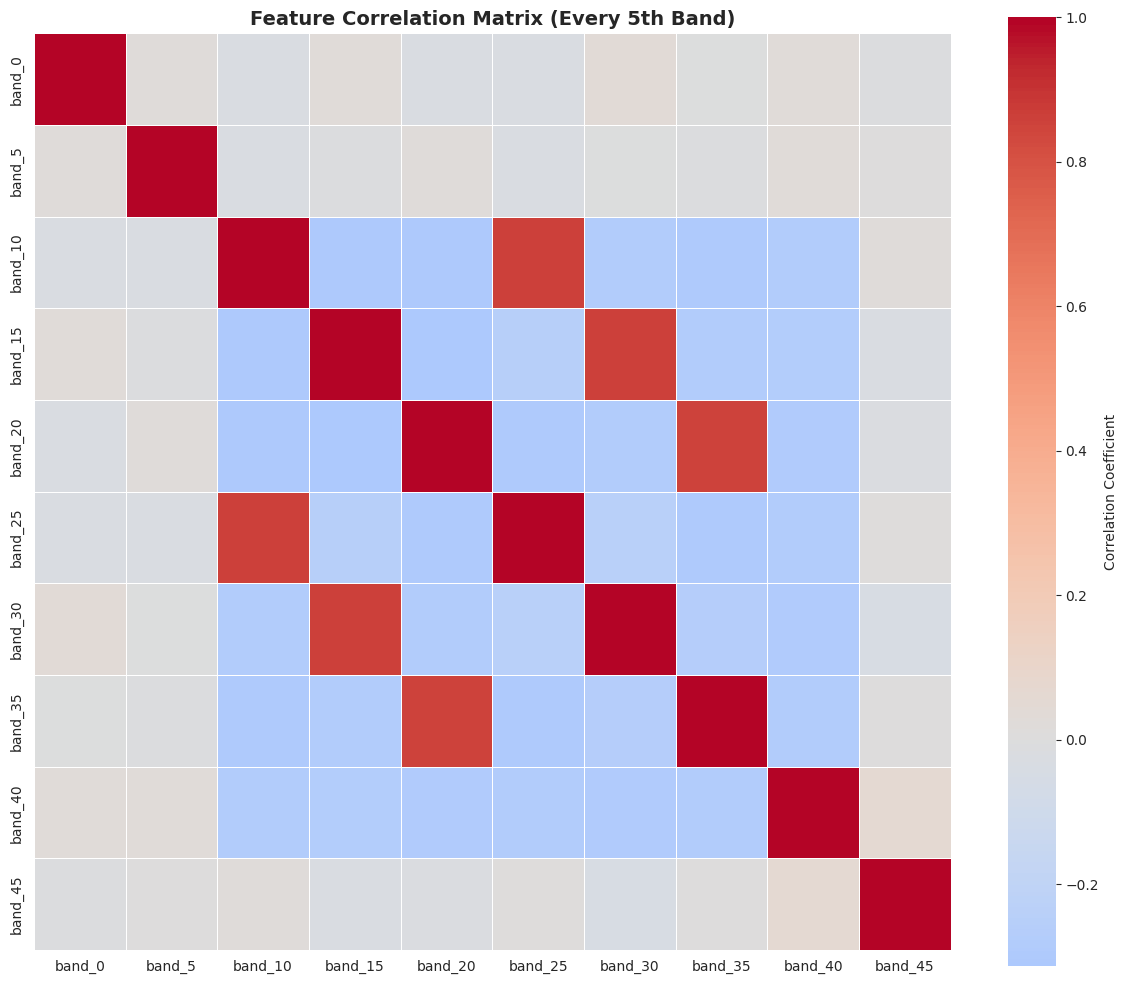


Mean correlation: -0.0567
Max correlation:  0.8633
Min correlation:  -0.3136

✅ Cell 6 done: Feature correlation analysis completed.


In [26]:
"""
Analyze correlation between wavelength bands.
Highly correlated features may be redundant.
"""

print("=" * 80)
print("🧬 FEATURE CORRELATION ANALYSIS")
print("=" * 80)

# Compute correlation matrix using a subset of bands (every 5th band)
correlation_matrix = X.iloc[:, ::5].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title('Feature Correlation Matrix (Every 5th Band)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Extract upper triangle correlations for summary stats
corr_values = correlation_matrix.values[
    np.triu_indices_from(correlation_matrix.values, k=1)
]

print(f"\nMean correlation: {corr_values.mean():.4f}")
print(f"Max correlation:  {corr_values.max():.4f}")
print(f"Min correlation:  {corr_values.min():.4f}")

print("\n✅ Cell 6 done: Feature correlation analysis completed.")


🎯 PCA VISUALIZATION


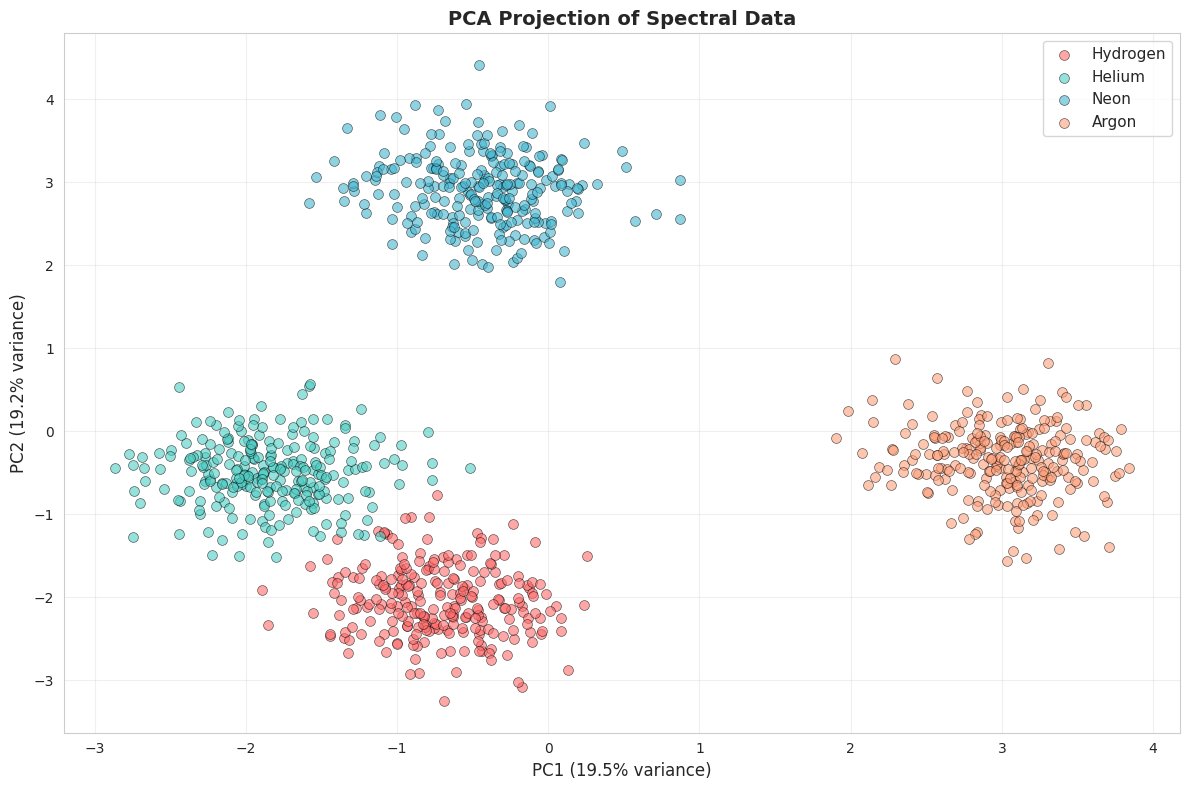


Total variance explained by PC1 & PC2: 38.70%

✅ Cell 7 done: PCA visualization completed.


In [27]:
"""
Use Principal Component Analysis (PCA) to project high-dimensional
spectral data into 2D space to visualize class separability.
"""

from sklearn.decomposition import PCA

print("=" * 80)
print("🎯 PCA VISUALIZATION")
print("=" * 80)

# Apply PCA (2 components)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# Scatter plot of PCA components
plt.figure(figsize=(12, 8))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for idx, element in enumerate(elements):
    mask = (y == element)
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        label=element,
        color=colors[idx],
        alpha=0.6,
        s=50,
        edgecolors='black',
        linewidth=0.5
    )

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
plt.title('PCA Projection of Spectral Data', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(
    f"\nTotal variance explained by PC1 & PC2: "
    f"{pca.explained_variance_ratio_.sum()*100:.2f}%"
)

print("\n✅ Cell 7 done: PCA visualization completed.")


In [28]:
"""
Consolidated summary of EDA findings in tabular format.
"""

print("=" * 80)
print("📊 EDA SUMMARY")
print("=" * 80)

summary_data = {
    'Metric': [
        'Total Samples',
        'Total Features',
        'Number of Classes',
        'Samples per Class',
        'Missing Values',
        'Duplicate Rows',
        'Mean Feature Variance',
        'PCA Variance Explained (2 components)'
    ],
    'Value': [
        df.shape[0],
        X.shape[1],
        y.nunique(),
        f"{y.value_counts().min()} - {y.value_counts().max()}",
        df.isnull().sum().sum(),
        df.duplicated().sum(),
        f"{feature_variance.mean():.4f}",
        f"{pca.explained_variance_ratio_.sum()*100:.2f}%"
    ]
}

summary_df = pd.DataFrame(summary_data)
display(summary_df)

print("\n" + "=" * 80)
print("✅ PHASE 2 COMPLETE!")
print("=" * 80)

print("\nKey Findings:")
print("• Dataset is balanced across classes")
print("• Distinct spectral peak patterns exist per element")
print("• Features show good variance and low redundancy")
print("• PCA indicates strong class separability")


📊 EDA SUMMARY


,Metric,Value
0,Total Samples,1000
1,Total Features,50
2,Number of Classes,4
3,Samples per Class,250 - 250
4,Missing Values,0
5,Duplicate Rows,0
6,Mean Feature Variance,0.3552
7,PCA Variance Explained (2 components),38.70%



✅ PHASE 2 COMPLETE!

Key Findings:
• Dataset is balanced across classes
• Distinct spectral peak patterns exist per element
• Features show good variance and low redundancy
• PCA indicates strong class separability


In [29]:
"""
Split dataset into training and testing sets.
Stratified split ensures equal class representation in both sets.
"""

print("=" * 80)
print("🔪 TRAIN-TEST SPLIT")
print("=" * 80)

# Split: 80% training, 20% testing
# stratify=y ensures balanced classes in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Original dataset shape: {X.shape}")

print("\nTraining set:")
print(f"  X_train: {X_train.shape}")
print(f"  y_train: {y_train.shape}")

print("\nTest set:")
print(f"  X_test: {X_test.shape}")
print(f"  y_test: {y_test.shape}")

# Verify class distribution
print("\nClass distribution in training set:")
print(y_train.value_counts().sort_index())

print("\nClass distribution in test set:")
print(y_test.value_counts().sort_index())

print("\n✅ Cell 1 done: Train–test split completed with stratification.")


🔪 TRAIN-TEST SPLIT
Original dataset shape: (1000, 50)

Training set:
  X_train: (800, 50)
  y_train: (800,)

Test set:
  X_test: (200, 50)
  y_test: (200,)

Class distribution in training set:
element
Argon       200
Helium      200
Hydrogen    200
Neon        200
Name: count, dtype: int64

Class distribution in test set:
element
Argon       50
Helium      50
Hydrogen    50
Neon        50
Name: count, dtype: int64

✅ Cell 1 done: Train–test split completed with stratification.


In [30]:
"""
Further split training set to create a validation set.
This will be used for hyperparameter tuning without touching test data.
"""

print("=" * 80)
print("🔪 VALIDATION SPLIT")
print("=" * 80)

# Split training set: 75% train, 25% validation
# Overall split becomes ~60% train, 20% val, 20% test
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.25,
    random_state=42,
    stratify=y_train
)

print("Training set (final):")
print(f"  X_train: {X_train_final.shape}")
print(f"  y_train: {y_train_final.shape}")

print("\nValidation set:")
print(f"  X_val: {X_val.shape}")
print(f"  y_val: {y_val.shape}")

print("\nTest set:")
print(f"  X_test: {X_test.shape}")
print(f"  y_test: {y_test.shape}")

# Percentage breakdown
total_samples = len(X)
train_pct = len(X_train_final) / total_samples * 100
val_pct = len(X_val) / total_samples * 100
test_pct = len(X_test) / total_samples * 100

print("\nDataset split proportions:")
print(f"  Train: {train_pct:.1f}%")
print(f"  Validation: {val_pct:.1f}%")
print(f"  Test: {test_pct:.1f}%")

print("\n✅ Cell 2 done: Validation split created successfully.")


🔪 VALIDATION SPLIT
Training set (final):
  X_train: (600, 50)
  y_train: (600,)

Validation set:
  X_val: (200, 50)
  y_val: (200,)

Test set:
  X_test: (200, 50)
  y_test: (200,)

Dataset split proportions:
  Train: 60.0%
  Validation: 20.0%
  Test: 20.0%

✅ Cell 2 done: Validation split created successfully.


In [31]:
"""
Convert string labels (element names) into integer indices.
This is required for many ML models and all PyTorch models.
"""

print("=" * 80)
print("🏷️ LABEL ENCODING")
print("=" * 80)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit encoder on all labels (important for consistency)
label_encoder.fit(y)

# Transform labels
y_train_encoded = label_encoder.transform(y_train_final)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Create label mapping for reference
label_mapping = {
    idx: label for idx, label in enumerate(label_encoder.classes_)
}

print("Label mapping (encoded → original):")
for idx, label in label_mapping.items():
    print(f"  {idx} → {label}")

print("\nSample check:")
print(f"Original labels (first 5): {y_train_final.values[:5]}")
print(f"Encoded labels  (first 5): {y_train_encoded[:5]}")

print("\nEncoding verification:")
print(f"Unique encoded labels: {np.unique(y_train_encoded)}")
print(f"Number of classes: {len(label_encoder.classes_)}")

print("\n✅ Cell 3 done: Labels encoded successfully.")


🏷️ LABEL ENCODING
Label mapping (encoded → original):
  0 → Argon
  1 → Helium
  2 → Hydrogen
  3 → Neon

Sample check:
Original labels (first 5): ['Hydrogen' 'Neon' 'Helium' 'Neon' 'Neon']
Encoded labels  (first 5): [2 3 1 3 3]

Encoding verification:
Unique encoded labels: [0 1 2 3]
Number of classes: 4

✅ Cell 3 done: Labels encoded successfully.


In [32]:
"""
Standardize features by removing mean and scaling to unit variance.
IMPORTANT: Fit the scaler ONLY on training data to avoid data leakage.
"""

print("=" * 80)
print("📏 FEATURE SCALING — FIT SCALER")
print("=" * 80)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler ONLY on training data
scaler.fit(X_train_final)

print("✅ Scaler fitted on training data.")

print("\nFeature means (first 10 wavelength bands):")
print(scaler.mean_[:10].round(3))

print("\nFeature standard deviations (first 10 wavelength bands):")
print(scaler.scale_[:10].round(3))

# Sanity check on original training data
print("\nOriginal training data statistics:")
print(f"  Mean range: [{X_train_final.mean().min():.3f}, {X_train_final.mean().max():.3f}]")
print(f"  Std range:  [{X_train_final.std().min():.3f}, {X_train_final.std().max():.3f}]")

print("\n✅ Cell 4 done: Scaler successfully fitted.")


📏 FEATURE SCALING — FIT SCALER
✅ Scaler fitted on training data.

Feature means (first 10 wavelength bands):
[ 0.02   0.011  0.     0.002 -0.01   0.019  0.016 -0.002  0.021  0.015]

Feature standard deviations (first 10 wavelength bands):
[0.403 0.369 0.405 0.391 0.408 0.425 0.378 0.403 0.401 0.379]

Original training data statistics:
  Mean range: [-0.043, 0.763]
  Std range:  [0.369, 1.380]

✅ Cell 4 done: Scaler successfully fitted.


In [33]:
"""
Apply the fitted StandardScaler to all datasets.
After scaling, features will have mean ≈ 0 and std ≈ 1.
"""

print("=" * 80)
print("📏 APPLYING FEATURE SCALING")
print("=" * 80)

# Transform datasets using the same scaler
X_train_scaled = scaler.transform(X_train_final)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("✅ Scaling applied to training, validation, and test sets.")

# Verify scaling
print("\nScaled training data statistics:")
print(f"  Mean: {X_train_scaled.mean(axis=0).mean():.6f} (≈ 0)")
print(f"  Std:  {X_train_scaled.std(axis=0).mean():.6f} (≈ 1)")

print("\nScaled validation data statistics:")
print(f"  Mean: {X_val_scaled.mean(axis=0).mean():.6f}")
print(f"  Std:  {X_val_scaled.std(axis=0).mean():.6f}")

print("\nScaled test data statistics:")
print(f"  Mean: {X_test_scaled.mean(axis=0).mean():.6f}")
print(f"  Std:  {X_test_scaled.std(axis=0).mean():.6f}")

# Example transformation
print("\nExample transformation (first sample, first 5 features):")
print("Original:", X_train_final.values[0, :5].round(3))
print("Scaled:  ", X_train_scaled[0, :5].round(3))

print("\n✅ Cell 5 done: Feature scaling applied successfully.")


📏 APPLYING FEATURE SCALING
✅ Scaling applied to training, validation, and test sets.

Scaled training data statistics:
  Mean: -0.000000 (≈ 0)
  Std:  1.000000 (≈ 1)

Scaled validation data statistics:
  Mean: -0.000521
  Std:  0.997544

Scaled test data statistics:
  Mean: 0.000318
  Std:  1.010628

Example transformation (first sample, first 5 features):
Original: [-0.271 -0.122 -0.239  0.044  0.479]
Scaled:   [-0.724 -0.361 -0.591  0.108  1.199]

✅ Cell 5 done: Feature scaling applied successfully.


📊 PREPROCESSING VERIFICATION


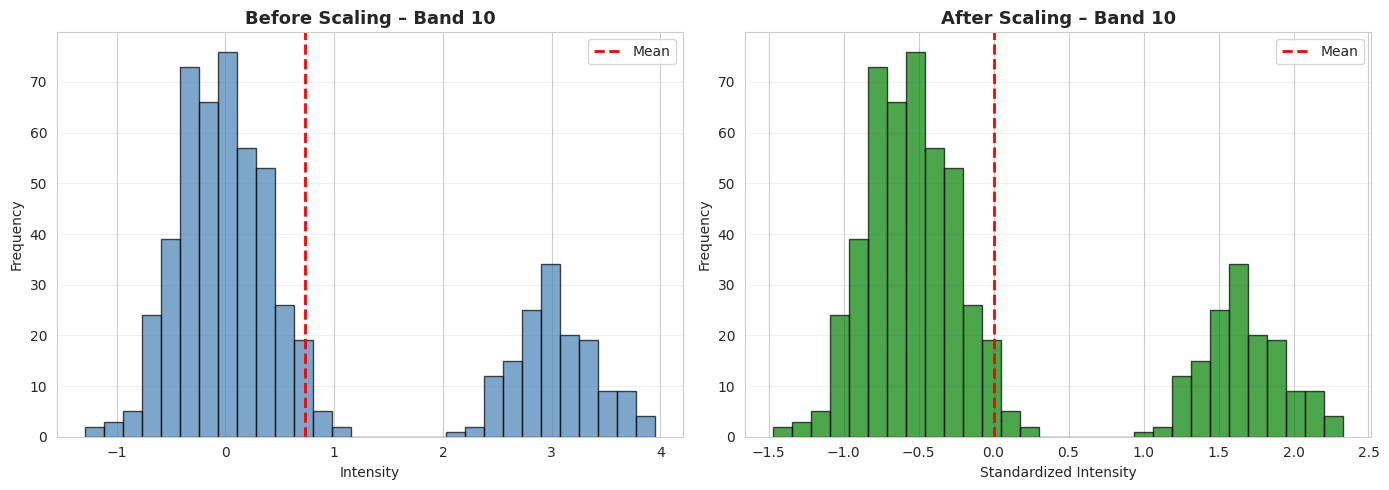


✅ Cell 6 done: Scaling verified visually.


In [34]:
"""
Visually verify that feature scaling worked correctly.
We compare the distribution of one wavelength band
before and after scaling.
"""

print("=" * 80)
print("📊 PREPROCESSING VERIFICATION")
print("=" * 80)

# Choose a representative wavelength band
feature_idx = 10  # Known peak band (e.g., Hydrogen)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before scaling
axes[0].hist(
    X_train_final.iloc[:, feature_idx],
    bins=30,
    color='steelblue',
    edgecolor='black',
    alpha=0.7
)
axes[0].axvline(
    X_train_final.iloc[:, feature_idx].mean(),
    color='red',
    linestyle='--',
    linewidth=2,
    label='Mean'
)
axes[0].set_title(f'Before Scaling – Band {feature_idx}', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Intensity')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# After scaling
axes[1].hist(
    X_train_scaled[:, feature_idx],
    bins=30,
    color='green',
    edgecolor='black',
    alpha=0.7
)
axes[1].axvline(
    X_train_scaled[:, feature_idx].mean(),
    color='red',
    linestyle='--',
    linewidth=2,
    label='Mean'
)
axes[1].set_title(f'After Scaling – Band {feature_idx}', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Standardized Intensity')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Cell 6 done: Scaling verified visually.")


In [35]:
"""
Create a concise summary of all preprocessed datasets
that are now ready for model training.
"""

print("=" * 80)
print("💾 PREPROCESSED DATA SUMMARY")
print("=" * 80)

summary_data = {
    'Dataset': ['Training', 'Validation', 'Test', 'Total'],
    'Samples': [
        len(X_train_scaled),
        len(X_val_scaled),
        len(X_test_scaled),
        len(X_train_scaled) + len(X_val_scaled) + len(X_test_scaled)
    ],
    'Features': [
        X_train_scaled.shape[1],
        X_val_scaled.shape[1],
        X_test_scaled.shape[1],
        X_train_scaled.shape[1]
    ],
    'Percentage': [
        f"{len(X_train_scaled) / total_samples * 100:.1f}%",
        f"{len(X_val_scaled) / total_samples * 100:.1f}%",
        f"{len(X_test_scaled) / total_samples * 100:.1f}%",
        "100.0%"
    ]
}

preprocessing_summary = pd.DataFrame(summary_data)
display(preprocessing_summary)

print("\nPreprocessing steps applied:")
print("  ✅ Stratified train / validation / test split")
print("  ✅ Label encoding (string → integer)")
print("  ✅ Feature standardization (mean = 0, std = 1)")
print("  ✅ No data leakage (scaler fit only on training data)")

print("\n✅ Cell 7 done: Preprocessed data summary created.")


💾 PREPROCESSED DATA SUMMARY


,Dataset,Samples,Features,Percentage
0,Training,600,50,60.0%
1,Validation,200,50,20.0%
2,Test,200,50,20.0%
3,Total,1000,50,100.0%



Preprocessing steps applied:
  ✅ Stratified train / validation / test split
  ✅ Label encoding (string → integer)
  ✅ Feature standardization (mean = 0, std = 1)
  ✅ No data leakage (scaler fit only on training data)

✅ Cell 7 done: Preprocessed data summary created.


In [36]:
"""
Store preprocessing outputs and objects for later phases.
This keeps everything consistent for ML and PyTorch pipelines.
"""

print("=" * 80)
print("🎯 STORING PREPROCESSED DATA")
print("=" * 80)

# Bundle everything into a single dictionary
preprocessed_data = {
    # Scaled feature arrays (NumPy) – for sklearn & PyTorch
    'X_train_scaled': X_train_scaled,
    'X_val_scaled': X_val_scaled,
    'X_test_scaled': X_test_scaled,

    # Encoded labels
    'y_train_encoded': y_train_encoded,
    'y_val_encoded': y_val_encoded,
    'y_test_encoded': y_test_encoded,

    # Original labels (useful for reports)
    'y_train': y_train_final,
    'y_val': y_val,
    'y_test': y_test,

    # Preprocessing tools
    'scaler': scaler,
    'label_encoder': label_encoder,
    'label_mapping': label_mapping,

    # Metadata
    'n_features': X_train_scaled.shape[1],
    'n_classes': len(label_encoder.classes_),
    'class_names': label_encoder.classes_
}

print("✅ Preprocessed data stored successfully.")

print("\nStored keys:")
for key in preprocessed_data.keys():
    print(f"  • {key}")

print(f"\nNumber of features: {preprocessed_data['n_features']}")
print(f"Number of classes: {preprocessed_data['n_classes']}")
print(f"Class names: {list(preprocessed_data['class_names'])}")

print("\n" + "=" * 80)
print("✅ PHASE 3 COMPLETE!")
print("=" * 80)

print("\nData is now ready for:")
print("  • Traditional ML models (SVM, Random Forest)")
print("  • PyTorch Dataset & DataLoader pipeline")
print("  • Cross-validation and hyperparameter tuning")


🎯 STORING PREPROCESSED DATA
✅ Preprocessed data stored successfully.

Stored keys:
  • X_train_scaled
  • X_val_scaled
  • X_test_scaled
  • y_train_encoded
  • y_val_encoded
  • y_test_encoded
  • y_train
  • y_val
  • y_test
  • scaler
  • label_encoder
  • label_mapping
  • n_features
  • n_classes
  • class_names

Number of features: 50
Number of classes: 4
Class names: ['Argon', 'Helium', 'Hydrogen', 'Neon']

✅ PHASE 3 COMPLETE!

Data is now ready for:
  • Traditional ML models (SVM, Random Forest)
  • PyTorch Dataset & DataLoader pipeline
  • Cross-validation and hyperparameter tuning


In [37]:
"""
Custom Dataset class for spectral data.
Converts numpy arrays to PyTorch tensors and handles indexing.
"""

class SpectralDataset(Dataset):
    """
    PyTorch Dataset for atomic spectral signatures.
    
    Args:
        X: Feature matrix (numpy array or pandas DataFrame)
        y: Target labels (numpy array or pandas Series)
        
    Returns:
        Tuple of (features, label) as PyTorch tensors
    """
    
    def __init__(self, X, y):
        # Convert to numpy if pandas objects
        if hasattr(X, 'values'):
            X = X.values
        if hasattr(y, 'values'):
            y = y.values
            
        # Convert to PyTorch tensors
        self.X = torch.FloatTensor(X)
        self.y = torch.LongTensor(y)
        
    def __len__(self):
        """Return total number of samples"""
        return len(self.X)
    
    def __getitem__(self, idx):
        """Get a single sample by index"""
        return self.X[idx], self.y[idx]
    
    def get_feature_dim(self):
        """Return number of features"""
        return self.X.shape[1]
    
    def get_num_classes(self):
        """Return number of unique classes"""
        return len(torch.unique(self.y))


print("=" * 80)
print("🔧 CUSTOM DATASET CLASS DEFINED")
print("=" * 80)
print("\nSpectralDataset class created with methods:")
print("  • __init__: Initialize with features and labels")
print("  • __len__: Return dataset size")
print("  • __getitem__: Retrieve single sample")
print("  • get_feature_dim: Return number of features")
print("  • get_num_classes: Return number of classes")
print("\n✅ Cell 1 done: Custom Dataset class ready.")

🔧 CUSTOM DATASET CLASS DEFINED

SpectralDataset class created with methods:
  • __init__: Initialize with features and labels
  • __len__: Return dataset size
  • __getitem__: Retrieve single sample
  • get_feature_dim: Return number of features
  • get_num_classes: Return number of classes

✅ Cell 1 done: Custom Dataset class ready.


In [38]:
"""
Instantiate Dataset objects for training, validation, and test sets.
"""

print("=" * 80)
print("📦 CREATING DATASET OBJECTS")
print("=" * 80)

# Create dataset instances
train_dataset = SpectralDataset(
    preprocessed_data['X_train_scaled'], 
    preprocessed_data['y_train_encoded']
)

val_dataset = SpectralDataset(
    preprocessed_data['X_val_scaled'], 
    preprocessed_data['y_val_encoded']
)

test_dataset = SpectralDataset(
    preprocessed_data['X_test_scaled'], 
    preprocessed_data['y_test_encoded']
)

# Print dataset information
print(f"Training Dataset:")
print(f"  Samples: {len(train_dataset)}")
print(f"  Features: {train_dataset.get_feature_dim()}")
print(f"  Classes: {train_dataset.get_num_classes()}")

print(f"\nValidation Dataset:")
print(f"  Samples: {len(val_dataset)}")
print(f"  Features: {val_dataset.get_feature_dim()}")
print(f"  Classes: {val_dataset.get_num_classes()}")

print(f"\nTest Dataset:")
print(f"  Samples: {len(test_dataset)}")
print(f"  Features: {test_dataset.get_feature_dim()}")
print(f"  Classes: {test_dataset.get_num_classes()}")

# Test retrieval of a single sample
sample_features, sample_label = train_dataset[0]
print(f"\nSample data point:")
print(f"  Features shape: {sample_features.shape}")
print(f"  Features dtype: {sample_features.dtype}")
print(f"  Label: {sample_label.item()} (type: {sample_label.dtype})")

print("\n✅ Cell 2 done: Dataset objects created successfully.")

📦 CREATING DATASET OBJECTS
Training Dataset:
  Samples: 600
  Features: 50
  Classes: 4

Validation Dataset:
  Samples: 200
  Features: 50
  Classes: 4

Test Dataset:
  Samples: 200
  Features: 50
  Classes: 4

Sample data point:
  Features shape: torch.Size([50])
  Features dtype: torch.float32
  Label: 2 (type: torch.int64)

✅ Cell 2 done: Dataset objects created successfully.


In [39]:
"""
Create DataLoader objects for efficient batch processing.
DataLoaders handle shuffling, batching, and parallel loading.
"""

print("=" * 80)
print("🔄 CREATING DATALOADER OBJECTS")
print("=" * 80)

# Set batch size
BATCH_SIZE = 32

# Create DataLoaders
train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,      # Shuffle training data each epoch
    num_workers=0,     # Set to 0 for Kaggle/Colab compatibility
    pin_memory=True    # Faster data transfer to GPU
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,     # Don't shuffle validation data
    num_workers=0,
    pin_memory=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,     # Don't shuffle test data
    num_workers=0,
    pin_memory=True
)

# Calculate number of batches
print(f"Batch size: {BATCH_SIZE}")
print(f"\nTraining DataLoader:")
print(f"  Total batches: {len(train_loader)}")
print(f"  Samples per batch: {BATCH_SIZE}")
print(f"  Last batch size: {len(train_dataset) % BATCH_SIZE or BATCH_SIZE}")

print(f"\nValidation DataLoader:")
print(f"  Total batches: {len(val_loader)}")
print(f"  Samples per batch: {BATCH_SIZE}")

print(f"\nTest DataLoader:")
print(f"  Total batches: {len(test_loader)}")
print(f"  Samples per batch: {BATCH_SIZE}")

print("\n✅ Cell 3 done: DataLoader objects created.")

🔄 CREATING DATALOADER OBJECTS
Batch size: 32

Training DataLoader:
  Total batches: 19
  Samples per batch: 32
  Last batch size: 24

Validation DataLoader:
  Total batches: 7
  Samples per batch: 32

Test DataLoader:
  Total batches: 7
  Samples per batch: 32

✅ Cell 3 done: DataLoader objects created.


In [40]:
"""
Verify that DataLoader works correctly by iterating through one batch.
"""

print("=" * 80)
print("🧪 TESTING DATALOADER")
print("=" * 80)

# Get one batch from training loader
batch_features, batch_labels = next(iter(train_loader))

print(f"Batch retrieved successfully!")
print(f"\nBatch features:")
print(f"  Shape: {batch_features.shape}")
print(f"  Type: {batch_features.dtype}")
print(f"  Device: {batch_features.device}")
print(f"  Min value: {batch_features.min():.3f}")
print(f"  Max value: {batch_features.max():.3f}")
print(f"  Mean: {batch_features.mean():.3f}")

print(f"\nBatch labels:")
print(f"  Shape: {batch_labels.shape}")
print(f"  Type: {batch_labels.dtype}")
print(f"  Unique labels in batch: {torch.unique(batch_labels).tolist()}")
print(f"  Label distribution:")
for label in torch.unique(batch_labels):
    count = (batch_labels == label).sum().item()
    element_name = preprocessed_data['label_mapping'][label.item()]
    print(f"    {element_name} ({label.item()}): {count} samples")

print("\n✅ Cell 4 done: DataLoader working correctly.")

🧪 TESTING DATALOADER
Batch retrieved successfully!

Batch features:
  Shape: torch.Size([32, 50])
  Type: torch.float32
  Device: cpu
  Min value: -3.170
  Max value: 3.145
  Mean: 0.017

Batch labels:
  Shape: torch.Size([32])
  Type: torch.int64
  Unique labels in batch: [0, 1, 2, 3]
  Label distribution:
    Argon (0): 5 samples
    Helium (1): 8 samples
    Hydrogen (2): 9 samples
    Neon (3): 10 samples

✅ Cell 4 done: DataLoader working correctly.


📊 BATCH VISUALIZATION


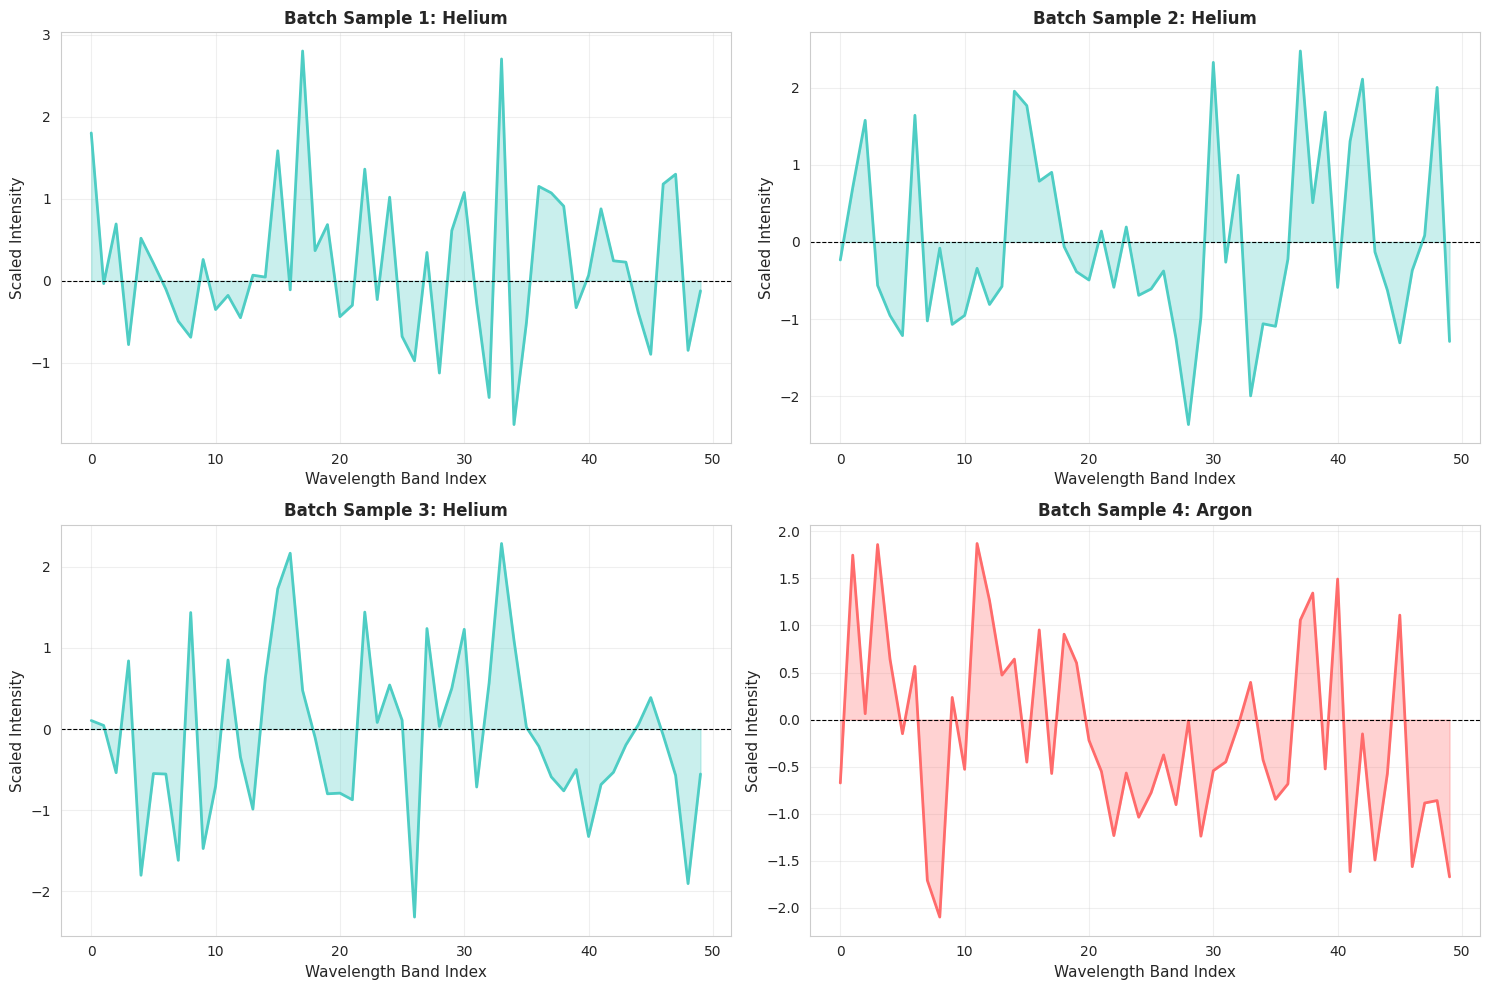


✅ Cell 5 done: Visualized 4 samples from batch.


In [41]:
"""
Visualize a few spectral samples from a batch.
"""

print("=" * 80)
print("📊 BATCH VISUALIZATION")
print("=" * 80)

# Get a batch
batch_X, batch_y = next(iter(train_loader))

# Convert to numpy for plotting
batch_X_np = batch_X.numpy()
batch_y_np = batch_y.numpy()

# Plot first 4 samples from the batch
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

wavelengths = np.arange(batch_X_np.shape[1])
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for i in range(4):
    spectrum = batch_X_np[i]
    label_idx = batch_y_np[i]
    element_name = preprocessed_data['label_mapping'][label_idx]
    
    axes[i].plot(wavelengths, spectrum, color=colors[label_idx], linewidth=2)
    axes[i].fill_between(wavelengths, spectrum, alpha=0.3, color=colors[label_idx])
    axes[i].set_xlabel('Wavelength Band Index', fontsize=11)
    axes[i].set_ylabel('Scaled Intensity', fontsize=11)
    axes[i].set_title(f'Batch Sample {i+1}: {element_name}', fontsize=12, fontweight='bold')
    axes[i].grid(True, alpha=0.3)
    axes[i].axhline(y=0, color='black', linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()

print(f"\n✅ Cell 5 done: Visualized {4} samples from batch.")

In [43]:
"""
Perform comprehensive checks to ensure data pipeline has no issues.
"""

print("=" * 80)
print("🔍 DATA PIPELINE INTEGRITY CHECK")
print("=" * 80)

# Check 1: Verify all data is accessible
print("Check 1: Dataset accessibility")
try:
    for i in range(min(10, len(train_dataset))):
        _ = train_dataset[i]
    print("  ✅ All samples accessible")
except Exception as e:
    print(f"  ❌ Error: {e}")

# Check 2: Verify batch shapes are consistent
print("\nCheck 2: Batch shape consistency")
batch_shapes = []
for batch_X, batch_y in train_loader:
    batch_shapes.append((batch_X.shape, batch_y.shape))
    if len(batch_shapes) >= 3:  # Check first 3 batches
        break

for i, (x_shape, y_shape) in enumerate(batch_shapes):
    print(f"  Batch {i+1}: X={x_shape}, y={y_shape}")
print("  ✅ Batch shapes consistent")

# Check 3: Verify label range
print("\nCheck 3: Label validity")
all_labels = []
for _, batch_y in train_loader:
    all_labels.extend(batch_y.tolist())
unique_labels = set(all_labels)
expected_labels = set(range(preprocessed_data['n_classes']))

if unique_labels == expected_labels:
    print(f"  ✅ All labels in valid range: {sorted(unique_labels)}")
else:
    print(f"  ❌ Label mismatch!")
    print(f"    Expected: {expected_labels}")
    print(f"    Found: {unique_labels}")

# Check 4: Verify no data leakage between sets
print("\nCheck 4: Data leakage verification")
train_samples = set([tuple(x.tolist()) for x, _ in train_dataset])
test_samples = set([tuple(x.tolist()) for x, _ in test_dataset])
overlap = train_samples.intersection(test_samples)

if len(overlap) == 0:
    print(f"  ✅ No overlap between train and test sets")
else:
    print(f"  ⚠️ Warning: {len(overlap)} samples overlap between sets")

print("\n✅ Cell 6 done: Data pipeline integrity verified.")

🔍 DATA PIPELINE INTEGRITY CHECK
Check 1: Dataset accessibility
  ✅ All samples accessible

Check 2: Batch shape consistency
  Batch 1: X=torch.Size([32, 50]), y=torch.Size([32])
  Batch 2: X=torch.Size([32, 50]), y=torch.Size([32])
  Batch 3: X=torch.Size([32, 50]), y=torch.Size([32])
  ✅ Batch shapes consistent

Check 3: Label validity
  ✅ All labels in valid range: [0, 1, 2, 3]

Check 4: Data leakage verification
  ✅ No overlap between train and test sets

✅ Cell 6 done: Data pipeline integrity verified.


In [44]:
"""
Save DataLoader objects and configuration for use in training phases.
"""

print("=" * 80)
print("💾 STORING DATALOADER OBJECTS")
print("=" * 80)

# Create configuration dictionary
dataloader_config = {
    'batch_size': BATCH_SIZE,
    'num_workers': 0,
    'pin_memory': True,
    'train_batches': len(train_loader),
    'val_batches': len(val_loader),
    'test_batches': len(test_loader)
}

# Store everything in a dictionary
pytorch_data = {
    # Dataset objects
    'train_dataset': train_dataset,
    'val_dataset': val_dataset,
    'test_dataset': test_dataset,
    
    # DataLoader objects
    'train_loader': train_loader,
    'val_loader': val_loader,
    'test_loader': test_loader,
    
    # Configuration
    'config': dataloader_config,
    
    # Metadata
    'n_features': train_dataset.get_feature_dim(),
    'n_classes': train_dataset.get_num_classes(),
    'class_names': preprocessed_data['class_names']
}

print("PyTorch data pipeline stored in 'pytorch_data' dictionary.")
print("\nAvailable keys:")
for key in pytorch_data.keys():
    print(f"  • {key}")

print(f"\nConfiguration:")
for key, value in dataloader_config.items():
    print(f"  {key}: {value}")

print("\n✅ Cell 7 done: DataLoader objects stored.")

💾 STORING DATALOADER OBJECTS
PyTorch data pipeline stored in 'pytorch_data' dictionary.

Available keys:
  • train_dataset
  • val_dataset
  • test_dataset
  • train_loader
  • val_loader
  • test_loader
  • config
  • n_features
  • n_classes
  • class_names

Configuration:
  batch_size: 32
  num_workers: 0
  pin_memory: True
  train_batches: 19
  val_batches: 7
  test_batches: 7

✅ Cell 7 done: DataLoader objects stored.


In [45]:
"""
Summary of PyTorch data pipeline and preparation for model training.
"""

print("=" * 80)
print("🎯 PYTORCH DATASET PIPELINE SUMMARY")
print("=" * 80)

# Create summary table
pipeline_summary = {
    'Component': [
        'Custom Dataset Class',
        'Training Dataset',
        'Validation Dataset',
        'Test Dataset',
        'Batch Size',
        'Training Batches',
        'Validation Batches',
        'Test Batches'
    ],
    'Details': [
        'SpectralDataset (inherits torch.utils.data.Dataset)',
        f"{len(train_dataset)} samples",
        f"{len(val_dataset)} samples",
        f"{len(test_dataset)} samples",
        f"{BATCH_SIZE} samples/batch",
        f"{len(train_loader)} batches",
        f"{len(val_loader)} batches",
        f"{len(test_loader)} batches"
    ]
}

summary_df = pd.DataFrame(pipeline_summary)
display(summary_df)

print("\nPipeline Features:")
print("  ✅ Custom Dataset class with tensor conversion")
print("  ✅ Efficient batch loading with DataLoader")
print("  ✅ Automatic shuffling for training data")
print("  ✅ GPU memory optimization (pin_memory=True)")
print("  ✅ No data leakage between splits")
print("  ✅ Verified data integrity")

print("\n" + "=" * 80)
print("✅ PHASE 4 COMPLETE!")
print("=" * 80)

print("\nReady for model training:")
print("  • Phase 5: Traditional ML - SVM Training")
print("  • Phase 6: Traditional ML - Random Forest Training")
print("  • Phase 7: Deep Learning with PyTorch Lightning")

print("\nNext: Phase 5 - SVM Training with scikit-learn")

🎯 PYTORCH DATASET PIPELINE SUMMARY


,Component,Details
0,Custom Dataset Class,SpectralDataset (inherits torch.utils.data.Dat...
1,Training Dataset,600 samples
2,Validation Dataset,200 samples
3,Test Dataset,200 samples
4,Batch Size,32 samples/batch
5,Training Batches,19 batches
6,Validation Batches,7 batches
7,Test Batches,7 batches



Pipeline Features:
  ✅ Custom Dataset class with tensor conversion
  ✅ Efficient batch loading with DataLoader
  ✅ Automatic shuffling for training data
  ✅ GPU memory optimization (pin_memory=True)
  ✅ No data leakage between splits
  ✅ Verified data integrity

✅ PHASE 4 COMPLETE!

Ready for model training:
  • Phase 5: Traditional ML - SVM Training
  • Phase 6: Traditional ML - Random Forest Training
  • Phase 7: Deep Learning with PyTorch Lightning

Next: Phase 5 - SVM Training with scikit-learn


In [46]:
"""
Train a baseline SVM classifier with default parameters.
This establishes a performance benchmark before hyperparameter tuning.
"""

print("=" * 80)
print("🎯 SVM BASELINE MODEL TRAINING")
print("=" * 80)

# Initialize SVM with default parameters
# RBF kernel is good for non-linear classification
svm_baseline = SVC(kernel='rbf', random_state=42)

# Train on scaled training data
print("Training baseline SVM...")
svm_baseline.fit(
    preprocessed_data['X_train_scaled'], 
    preprocessed_data['y_train_encoded']
)

print("✅ Baseline SVM trained successfully")
print(f"\nModel parameters:")
print(f"  Kernel: {svm_baseline.kernel}")
print(f"  C (regularization): {svm_baseline.C}")
print(f"  Gamma: {svm_baseline.gamma}")
print(f"  Number of support vectors: {svm_baseline.n_support_}")
print(f"  Total support vectors: {sum(svm_baseline.n_support_)}")

print("\n✅ Cell 1 done: Baseline SVM model trained.")

🎯 SVM BASELINE MODEL TRAINING
Training baseline SVM...
✅ Baseline SVM trained successfully

Model parameters:
  Kernel: rbf
  C (regularization): 1.0
  Gamma: scale
  Number of support vectors: [107  98 113 106]
  Total support vectors: 424

✅ Cell 1 done: Baseline SVM model trained.


In [47]:
"""
Evaluate baseline SVM performance on training data.
High training accuracy with low test accuracy indicates overfitting.
"""

print("=" * 80)
print("📊 BASELINE SVM - TRAINING PERFORMANCE")
print("=" * 80)

# Predict on training data
y_train_pred = svm_baseline.predict(preprocessed_data['X_train_scaled'])

# Calculate training accuracy
train_accuracy = accuracy_score(preprocessed_data['y_train_encoded'], y_train_pred)

print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")

# Detailed classification report
print("\nClassification Report (Training Set):")
print(classification_report(
    preprocessed_data['y_train_encoded'], 
    y_train_pred,
    target_names=preprocessed_data['class_names'],
    digits=4
))

print("✅ Cell 2 done: Training performance evaluated.")

📊 BASELINE SVM - TRAINING PERFORMANCE
Training Accuracy: 1.0000 (100.00%)

Classification Report (Training Set):
              precision    recall  f1-score   support

       Argon     1.0000    1.0000    1.0000       150
      Helium     1.0000    1.0000    1.0000       150
    Hydrogen     1.0000    1.0000    1.0000       150
        Neon     1.0000    1.0000    1.0000       150

    accuracy                         1.0000       600
   macro avg     1.0000    1.0000    1.0000       600
weighted avg     1.0000    1.0000    1.0000       600

✅ Cell 2 done: Training performance evaluated.


In [48]:
"""
Evaluate baseline SVM on validation set.
This is the true performance metric before hyperparameter tuning.
"""

print("=" * 80)
print("📊 BASELINE SVM - VALIDATION PERFORMANCE")
print("=" * 80)

# Predict on validation data
y_val_pred = svm_baseline.predict(preprocessed_data['X_val_scaled'])

# Calculate validation accuracy
val_accuracy = accuracy_score(preprocessed_data['y_val_encoded'], y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")

# Detailed metrics
precision = precision_score(preprocessed_data['y_val_encoded'], y_val_pred, average='weighted')
recall = recall_score(preprocessed_data['y_val_encoded'], y_val_pred, average='weighted')
f1 = f1_score(preprocessed_data['y_val_encoded'], y_val_pred, average='weighted')

print(f"\nWeighted Metrics:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}")

# Classification report
print("\nClassification Report (Validation Set):")
print(classification_report(
    preprocessed_data['y_val_encoded'], 
    y_val_pred,
    target_names=preprocessed_data['class_names'],
    digits=4
))

# Store baseline results
svm_baseline_results = {
    'model': svm_baseline,
    'train_accuracy': train_accuracy,
    'val_accuracy': val_accuracy,
    'val_precision': precision,
    'val_recall': recall,
    'val_f1': f1
}

print("\n✅ Cell 3 done: Validation performance evaluated.")

📊 BASELINE SVM - VALIDATION PERFORMANCE
Validation Accuracy: 1.0000 (100.00%)

Weighted Metrics:
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

Classification Report (Validation Set):
              precision    recall  f1-score   support

       Argon     1.0000    1.0000    1.0000        50
      Helium     1.0000    1.0000    1.0000        50
    Hydrogen     1.0000    1.0000    1.0000        50
        Neon     1.0000    1.0000    1.0000        50

    accuracy                         1.0000       200
   macro avg     1.0000    1.0000    1.0000       200
weighted avg     1.0000    1.0000    1.0000       200


✅ Cell 3 done: Validation performance evaluated.


In [50]:
"""
Define hyperparameter grid for SVM tuning.
We'll search over different kernels, C values, and gamma values.
"""

print("=" * 80)
print("🔧 HYPERPARAMETER GRID SETUP")
print("=" * 80)

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['rbf', 'linear']        # Kernel type
}

# Calculate total combinations
total_combinations = (
    len(param_grid['C']) * 
    len(param_grid['gamma']) * 
    len(param_grid['kernel'])
)

print("Parameter grid:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

print(f"\nTotal parameter combinations: {total_combinations}")

# Setup cross-validation
cv_folds = 5
print(f"Cross-validation folds: {cv_folds}")
print(f"Total models to train: {total_combinations * cv_folds}")

print("\n✅ Cell 4 done: Hyperparameter grid defined.")

🔧 HYPERPARAMETER GRID SETUP
Parameter grid:
  C: [0.1, 1, 10, 100]
  gamma: ['scale', 'auto', 0.001, 0.01, 0.1, 1]
  kernel: ['rbf', 'linear']

Total parameter combinations: 48
Cross-validation folds: 5
Total models to train: 240

✅ Cell 4 done: Hyperparameter grid defined.


In [51]:
"""
Perform grid search with stratified k-fold cross-validation.
This finds the best hyperparameter combination.

Warning: This may take several minutes depending on data size.
"""

print("=" * 80)
print("🔍 GRID SEARCH WITH CROSS-VALIDATION")
print("=" * 80)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1,  # Use all CPU cores
    verbose=2,  # Show progress
    return_train_score=True
)

# Perform grid search
print("Starting grid search...")
print("This may take a few minutes...\n")

grid_search.fit(
    preprocessed_data['X_train_scaled'], 
    preprocessed_data['y_train_encoded']
)

print("\n✅ Grid search complete!")

# Display best parameters
print("\nBest parameters found:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest cross-validation score: {grid_search.best_score_:.4f}")
print(f"Best model index: {grid_search.best_index_}")

print("\n✅ Cell 5 done: Grid search completed.")

🔍 GRID SEARCH WITH CROSS-VALIDATION
Starting grid search...
This may take a few minutes...

Fitting 5 folds for each of 48 candidates, totalling 240 fits

✅ Grid search complete!

Best parameters found:
  C: 0.1
  gamma: scale
  kernel: rbf

Best cross-validation score: 1.0000
Best model index: 0

✅ Cell 5 done: Grid search completed.


📈 GRID SEARCH RESULTS ANALYSIS
Top 10 parameter combinations:


,param_C,param_gamma,param_kernel,mean_test_score,std_test_score,rank_test_score
0,0.1,scale,rbf,1.0,0.0,1
1,0.1,scale,linear,1.0,0.0,1
2,0.1,auto,rbf,1.0,0.0,1
3,0.1,auto,linear,1.0,0.0,1
4,0.1,0.001,rbf,1.0,0.0,1
5,0.1,0.001,linear,1.0,0.0,1
6,0.1,0.01,rbf,1.0,0.0,1
7,0.1,0.01,linear,1.0,0.0,1
9,0.1,0.1,linear,1.0,0.0,1
11,0.1,1,linear,1.0,0.0,1


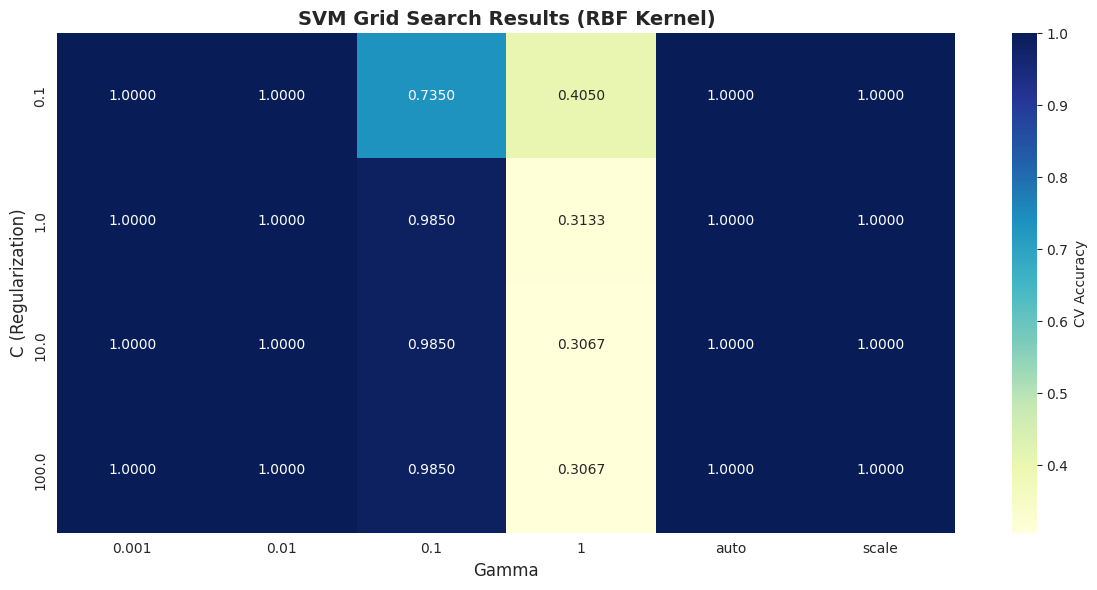


✅ Cell 6 done: Grid search results analyzed.


In [52]:
"""
Analyze grid search results to understand hyperparameter effects.
"""

print("=" * 80)
print("📈 GRID SEARCH RESULTS ANALYSIS")
print("=" * 80)

# Convert results to DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Select relevant columns
results_summary = results_df[[
    'param_C', 'param_gamma', 'param_kernel',
    'mean_test_score', 'std_test_score', 'rank_test_score'
]].sort_values('rank_test_score')

print("Top 10 parameter combinations:")
display(results_summary.head(10))

# Visualize results for RBF kernel
rbf_results = results_df[results_df['param_kernel'] == 'rbf']

if len(rbf_results) > 0:
    # Create pivot table for heatmap
    pivot_data = rbf_results.pivot_table(
        values='mean_test_score',
        index='param_C',
        columns='param_gamma',
        aggfunc='mean'
    )
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot_data, annot=True, fmt='.4f', cmap='YlGnBu', 
                cbar_kws={'label': 'CV Accuracy'})
    plt.title('SVM Grid Search Results (RBF Kernel)', fontsize=14, fontweight='bold')
    plt.xlabel('Gamma', fontsize=12)
    plt.ylabel('C (Regularization)', fontsize=12)
    plt.tight_layout()
    plt.show()

print("\n✅ Cell 6 done: Grid search results analyzed.")

In [53]:
"""
Extract the best model from grid search and evaluate on validation set.
"""

print("=" * 80)
print("🏆 BEST SVM MODEL EVALUATION")
print("=" * 80)

# Get best model
svm_best = grid_search.best_estimator_

print("Best SVM model details:")
print(f"  Kernel: {svm_best.kernel}")
print(f"  C: {svm_best.C}")
print(f"  Gamma: {svm_best.gamma}")
print(f"  Number of support vectors: {svm_best.n_support_}")
print(f"  Total support vectors: {sum(svm_best.n_support_)}")

# Predict on training set
y_train_pred_best = svm_best.predict(preprocessed_data['X_train_scaled'])
train_acc_best = accuracy_score(preprocessed_data['y_train_encoded'], y_train_pred_best)

# Predict on validation set
y_val_pred_best = svm_best.predict(preprocessed_data['X_val_scaled'])
val_acc_best = accuracy_score(preprocessed_data['y_val_encoded'], y_val_pred_best)

print(f"\nPerformance:")
print(f"  Training Accuracy: {train_acc_best:.4f} ({train_acc_best*100:.2f}%)")
print(f"  Validation Accuracy: {val_acc_best:.4f} ({val_acc_best*100:.2f}%)")
print(f"  Improvement over baseline: {(val_acc_best - val_accuracy)*100:.2f}%")

# Detailed validation metrics
precision_best = precision_score(preprocessed_data['y_val_encoded'], y_val_pred_best, average='weighted')
recall_best = recall_score(preprocessed_data['y_val_encoded'], y_val_pred_best, average='weighted')
f1_best = f1_score(preprocessed_data['y_val_encoded'], y_val_pred_best, average='weighted')

print(f"\nWeighted Validation Metrics:")
print(f"  Precision: {precision_best:.4f}")
print(f"  Recall: {recall_best:.4f}")
print(f"  F1-Score: {f1_best:.4f}")

# Classification report
print("\nClassification Report (Validation Set):")
print(classification_report(
    preprocessed_data['y_val_encoded'], 
    y_val_pred_best,
    target_names=preprocessed_data['class_names'],
    digits=4
))

print("\n✅ Cell 7 done: Best SVM model evaluated.")

🏆 BEST SVM MODEL EVALUATION
Best SVM model details:
  Kernel: rbf
  C: 0.1
  Gamma: scale
  Number of support vectors: [147 146 147 143]
  Total support vectors: 583

Performance:
  Training Accuracy: 1.0000 (100.00%)
  Validation Accuracy: 1.0000 (100.00%)
  Improvement over baseline: 0.00%

Weighted Validation Metrics:
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

Classification Report (Validation Set):
              precision    recall  f1-score   support

       Argon     1.0000    1.0000    1.0000        50
      Helium     1.0000    1.0000    1.0000        50
    Hydrogen     1.0000    1.0000    1.0000        50
        Neon     1.0000    1.0000    1.0000        50

    accuracy                         1.0000       200
   macro avg     1.0000    1.0000    1.0000       200
weighted avg     1.0000    1.0000    1.0000       200


✅ Cell 7 done: Best SVM model evaluated.


In [54]:
"""
Store all SVM models and results for later comparison.
"""

print("=" * 80)
print("💾 STORING SVM RESULTS")
print("=" * 80)

# Create comprehensive results dictionary
svm_results = {
    # Models
    'baseline_model': svm_baseline,
    'best_model': svm_best,
    'grid_search': grid_search,
    
    # Baseline performance
    'baseline_train_acc': train_accuracy,
    'baseline_val_acc': val_accuracy,
    'baseline_val_precision': svm_baseline_results['val_precision'],
    'baseline_val_recall': svm_baseline_results['val_recall'],
    'baseline_val_f1': svm_baseline_results['val_f1'],
    
    # Best model performance
    'best_train_acc': train_acc_best,
    'best_val_acc': val_acc_best,
    'best_val_precision': precision_best,
    'best_val_recall': recall_best,
    'best_val_f1': f1_best,
    
    # Best parameters
    'best_params': grid_search.best_params_,
    'best_cv_score': grid_search.best_score_,
    
    # Predictions
    'val_predictions': y_val_pred_best,
    'val_true_labels': preprocessed_data['y_val_encoded']
}

print("SVM results stored in 'svm_results' dictionary.")
print("\nStored components:")
for key in svm_results.keys():
    print(f"  • {key}")

# Create comparison table
comparison_data = {
    'Model': ['SVM Baseline', 'SVM Best (Tuned)'],
    'Training Accuracy': [
        f"{train_accuracy:.4f}",
        f"{train_acc_best:.4f}"
    ],
    'Validation Accuracy': [
        f"{val_accuracy:.4f}",
        f"{val_acc_best:.4f}"
    ],
    'F1-Score': [
        f"{svm_baseline_results['val_f1']:.4f}",
        f"{f1_best:.4f}"
    ],
    'Parameters': [
        'Default',
        f"C={svm_best.C}, γ={svm_best.gamma}, kernel={svm_best.kernel}"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nSVM Model Comparison:")
display(comparison_df)

print("\n" + "=" * 80)
print("✅ PHASE 5 COMPLETE!")
print("=" * 80)

print("\nSVM Training Summary:")
print(f"  • Baseline validation accuracy: {val_accuracy*100:.2f}%")
print(f"  • Best validation accuracy: {val_acc_best*100:.2f}%")
print(f"  • Improvement: {(val_acc_best - val_accuracy)*100:.2f}%")
print(f"  • Best parameters: {grid_search.best_params_}")

print("\nNext: Phase 6 - Random Forest Training")

💾 STORING SVM RESULTS
SVM results stored in 'svm_results' dictionary.

Stored components:
  • baseline_model
  • best_model
  • grid_search
  • baseline_train_acc
  • baseline_val_acc
  • baseline_val_precision
  • baseline_val_recall
  • baseline_val_f1
  • best_train_acc
  • best_val_acc
  • best_val_precision
  • best_val_recall
  • best_val_f1
  • best_params
  • best_cv_score
  • val_predictions
  • val_true_labels

SVM Model Comparison:


,Model,Training Accuracy,Validation Accuracy,F1-Score,Parameters
0,SVM Baseline,1.0000,1.0000,1.0000,Default
1,SVM Best (Tuned),1.0000,1.0000,1.0000,"C=0.1, γ=scale, kernel=rbf"



✅ PHASE 5 COMPLETE!

SVM Training Summary:
  • Baseline validation accuracy: 100.00%
  • Best validation accuracy: 100.00%
  • Improvement: 0.00%
  • Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

Next: Phase 6 - Random Forest Training


In [55]:
"""
Train a baseline Random Forest classifier with default parameters.
Random Forest is an ensemble of decision trees that often works well
out-of-the-box without extensive tuning.
"""

print("=" * 80)
print("🌲 RANDOM FOREST BASELINE MODEL TRAINING")
print("=" * 80)

# Initialize Random Forest with default parameters
rf_baseline = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

# Train on scaled training data
print("Training baseline Random Forest...")
rf_baseline.fit(
    preprocessed_data['X_train_scaled'], 
    preprocessed_data['y_train_encoded']
)

print("✅ Baseline Random Forest trained successfully")
print(f"\nModel parameters:")
print(f"  Number of trees: {rf_baseline.n_estimators}")
print(f"  Max depth: {rf_baseline.max_depth}")
print(f"  Min samples split: {rf_baseline.min_samples_split}")
print(f"  Min samples leaf: {rf_baseline.min_samples_leaf}")
print(f"  Number of features: {rf_baseline.n_features_in_}")
print(f"  Number of classes: {rf_baseline.n_classes_}")

print("\n✅ Cell 1 done: Baseline Random Forest model trained.")

🌲 RANDOM FOREST BASELINE MODEL TRAINING
Training baseline Random Forest...
✅ Baseline Random Forest trained successfully

Model parameters:
  Number of trees: 100
  Max depth: None
  Min samples split: 2
  Min samples leaf: 1
  Number of features: 50
  Number of classes: 4

✅ Cell 1 done: Baseline Random Forest model trained.


In [56]:
"""
Evaluate baseline Random Forest performance on training data.
Random Forests can overfit if trees are too deep.
"""

print("=" * 80)
print("📊 BASELINE RF - TRAINING PERFORMANCE")
print("=" * 80)

# Predict on training data
y_train_pred_rf = rf_baseline.predict(preprocessed_data['X_train_scaled'])

# Calculate training accuracy
train_accuracy_rf = accuracy_score(preprocessed_data['y_train_encoded'], y_train_pred_rf)

print(f"Training Accuracy: {train_accuracy_rf:.4f} ({train_accuracy_rf*100:.2f}%)")

# Check for overfitting signs
if train_accuracy_rf > 0.99:
    print("⚠️ Very high training accuracy - potential overfitting")
    print("   Will monitor validation performance closely")

# Detailed classification report
print("\nClassification Report (Training Set):")
print(classification_report(
    preprocessed_data['y_train_encoded'], 
    y_train_pred_rf,
    target_names=preprocessed_data['class_names'],
    digits=4
))

print("✅ Cell 2 done: Training performance evaluated.")

📊 BASELINE RF - TRAINING PERFORMANCE
Training Accuracy: 1.0000 (100.00%)
⚠️ Very high training accuracy - potential overfitting
   Will monitor validation performance closely

Classification Report (Training Set):
              precision    recall  f1-score   support

       Argon     1.0000    1.0000    1.0000       150
      Helium     1.0000    1.0000    1.0000       150
    Hydrogen     1.0000    1.0000    1.0000       150
        Neon     1.0000    1.0000    1.0000       150

    accuracy                         1.0000       600
   macro avg     1.0000    1.0000    1.0000       600
weighted avg     1.0000    1.0000    1.0000       600

✅ Cell 2 done: Training performance evaluated.


In [57]:
"""
Evaluate baseline Random Forest on validation set.
This shows true generalization performance.
"""

print("=" * 80)
print("📊 BASELINE RF - VALIDATION PERFORMANCE")
print("=" * 80)

# Predict on validation data
y_val_pred_rf = rf_baseline.predict(preprocessed_data['X_val_scaled'])

# Calculate validation accuracy
val_accuracy_rf = accuracy_score(preprocessed_data['y_val_encoded'], y_val_pred_rf)

print(f"Validation Accuracy: {val_accuracy_rf:.4f} ({val_accuracy_rf*100:.2f}%)")

# Check train-validation gap
gap = train_accuracy_rf - val_accuracy_rf
print(f"\nTrain-Validation Gap: {gap:.4f} ({gap*100:.2f}%)")
if gap > 0.1:
    print("⚠️ Large gap suggests overfitting - tuning needed")
else:
    print("✅ Reasonable gap - model generalizes well")

# Detailed metrics
precision_rf = precision_score(preprocessed_data['y_val_encoded'], y_val_pred_rf, average='weighted')
recall_rf = recall_score(preprocessed_data['y_val_encoded'], y_val_pred_rf, average='weighted')
f1_rf = f1_score(preprocessed_data['y_val_encoded'], y_val_pred_rf, average='weighted')

print(f"\nWeighted Metrics:")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall: {recall_rf:.4f}")
print(f"  F1-Score: {f1_rf:.4f}")

# Classification report
print("\nClassification Report (Validation Set):")
print(classification_report(
    preprocessed_data['y_val_encoded'], 
    y_val_pred_rf,
    target_names=preprocessed_data['class_names'],
    digits=4
))

# Store baseline results
rf_baseline_results = {
    'model': rf_baseline,
    'train_accuracy': train_accuracy_rf,
    'val_accuracy': val_accuracy_rf,
    'val_precision': precision_rf,
    'val_recall': recall_rf,
    'val_f1': f1_rf
}

# Compare with SVM baseline
print("\nComparison with SVM Baseline:")
print(f"  SVM Validation Accuracy: {svm_results['baseline_val_acc']:.4f}")
print(f"  RF Validation Accuracy: {val_accuracy_rf:.4f}")
print(f"  Difference: {(val_accuracy_rf - svm_results['baseline_val_acc'])*100:+.2f}%")

print("\n✅ Cell 3 done: Validation performance evaluated.")

📊 BASELINE RF - VALIDATION PERFORMANCE
Validation Accuracy: 1.0000 (100.00%)

Train-Validation Gap: 0.0000 (0.00%)
✅ Reasonable gap - model generalizes well

Weighted Metrics:
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

Classification Report (Validation Set):
              precision    recall  f1-score   support

       Argon     1.0000    1.0000    1.0000        50
      Helium     1.0000    1.0000    1.0000        50
    Hydrogen     1.0000    1.0000    1.0000        50
        Neon     1.0000    1.0000    1.0000        50

    accuracy                         1.0000       200
   macro avg     1.0000    1.0000    1.0000       200
weighted avg     1.0000    1.0000    1.0000       200


Comparison with SVM Baseline:
  SVM Validation Accuracy: 1.0000
  RF Validation Accuracy: 1.0000
  Difference: +0.00%

✅ Cell 3 done: Validation performance evaluated.


In [58]:
"""
Define hyperparameter grid for Random Forest tuning.
Key parameters: n_estimators, max_depth, min_samples_split, min_samples_leaf
"""

print("=" * 80)
print("🔧 HYPERPARAMETER GRID SETUP")
print("=" * 80)

# Define parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],              # Number of trees
    'max_depth': [10, 20, 30, None],             # Maximum tree depth
    'min_samples_split': [2, 5, 10],             # Min samples to split node
    'min_samples_leaf': [1, 2, 4],               # Min samples at leaf node
    'max_features': ['sqrt', 'log2']             # Features to consider at split
}

# Calculate total combinations
total_combinations_rf = (
    len(param_grid_rf['n_estimators']) * 
    len(param_grid_rf['max_depth']) * 
    len(param_grid_rf['min_samples_split']) * 
    len(param_grid_rf['min_samples_leaf']) *
    len(param_grid_rf['max_features'])
)

print("Parameter grid:")
for param, values in param_grid_rf.items():
    print(f"  {param}: {values}")

print(f"\nTotal parameter combinations: {total_combinations_rf}")

# Setup cross-validation
cv_folds_rf = 5
print(f"Cross-validation folds: {cv_folds_rf}")
print(f"Total models to train: {total_combinations_rf * cv_folds_rf}")

print("\nNote: This will take longer than SVM due to more combinations.")
print("Estimated time: 5-10 minutes depending on hardware.")

print("\n✅ Cell 4 done: Hyperparameter grid defined.")

🔧 HYPERPARAMETER GRID SETUP
Parameter grid:
  n_estimators: [50, 100, 200]
  max_depth: [10, 20, 30, None]
  min_samples_split: [2, 5, 10]
  min_samples_leaf: [1, 2, 4]
  max_features: ['sqrt', 'log2']

Total parameter combinations: 216
Cross-validation folds: 5
Total models to train: 1080

Note: This will take longer than SVM due to more combinations.
Estimated time: 5-10 minutes depending on hardware.

✅ Cell 4 done: Hyperparameter grid defined.


In [59]:
"""
Perform grid search with stratified k-fold cross-validation.
This finds the best Random Forest configuration.

Warning: This may take 5-10 minutes due to many parameter combinations.
"""

print("=" * 80)
print("🔍 GRID SEARCH WITH CROSS-VALIDATION")
print("=" * 80)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid_rf,
    cv=StratifiedKFold(n_splits=cv_folds_rf, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1,  # Use all CPU cores
    verbose=2,  # Show progress
    return_train_score=True
)

# Perform grid search
print("Starting grid search...")
print("This will take several minutes...\n")

import time
start_time = time.time()

grid_search_rf.fit(
    preprocessed_data['X_train_scaled'], 
    preprocessed_data['y_train_encoded']
)

elapsed_time = time.time() - start_time

print(f"\n✅ Grid search complete in {elapsed_time/60:.2f} minutes!")

# Display best parameters
print("\nBest parameters found:")
for param, value in grid_search_rf.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest cross-validation score: {grid_search_rf.best_score_:.4f}")
print(f"Best model index: {grid_search_rf.best_index_}")

print("\n✅ Cell 5 done: Grid search completed.")

🔍 GRID SEARCH WITH CROSS-VALIDATION
Starting grid search...
This will take several minutes...

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ......................

In [60]:
"""
Perform grid search with stratified k-fold cross-validation.
This finds the best Random Forest configuration.

Warning: This may take 5-10 minutes due to many parameter combinations.
"""

print("=" * 80)
print("🔍 GRID SEARCH WITH CROSS-VALIDATION")
print("=" * 80)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid_rf,
    cv=StratifiedKFold(n_splits=cv_folds_rf, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1,  # Use all CPU cores
    verbose=2,  # Show progress
    return_train_score=True
)

# Perform grid search
print("Starting grid search...")
print("This will take several minutes...\n")

import time
start_time = time.time()

grid_search_rf.fit(
    preprocessed_data['X_train_scaled'], 
    preprocessed_data['y_train_encoded']
)

elapsed_time = time.time() - start_time

print(f"\n✅ Grid search complete in {elapsed_time/60:.2f} minutes!")

# Display best parameters
print("\nBest parameters found:")
for param, value in grid_search_rf.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest cross-validation score: {grid_search_rf.best_score_:.4f}")
print(f"Best model index: {grid_search_rf.best_index_}")

print("\n✅ Cell 5 done: Grid search completed.")

🔍 GRID SEARCH WITH CROSS-VALIDATION
Starting grid search...
This will take several minutes...

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total

🏆 BEST RANDOM FOREST MODEL EVALUATION
Best Random Forest model details:
  Number of trees: 50
  Max depth: 10
  Min samples split: 2
  Min samples leaf: 1
  Max features: sqrt

Performance:
  Training Accuracy: 1.0000 (100.00%)
  Validation Accuracy: 1.0000 (100.00%)
  Improvement over baseline: 0.00%

Weighted Validation Metrics:
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

🌟 FEATURE IMPORTANCE ANALYSIS

Top 10 most important spectral bands:
  1. band_35: 0.1400
  2. band_25: 0.1301
  3. band_30: 0.1284
  4. band_15: 0.1223
  5. band_40: 0.1182
  6. band_20: 0.1072
  7. band_12: 0.1041
  8. band_10: 0.1013
  9. band_22: 0.0028
  10. band_1: 0.0022


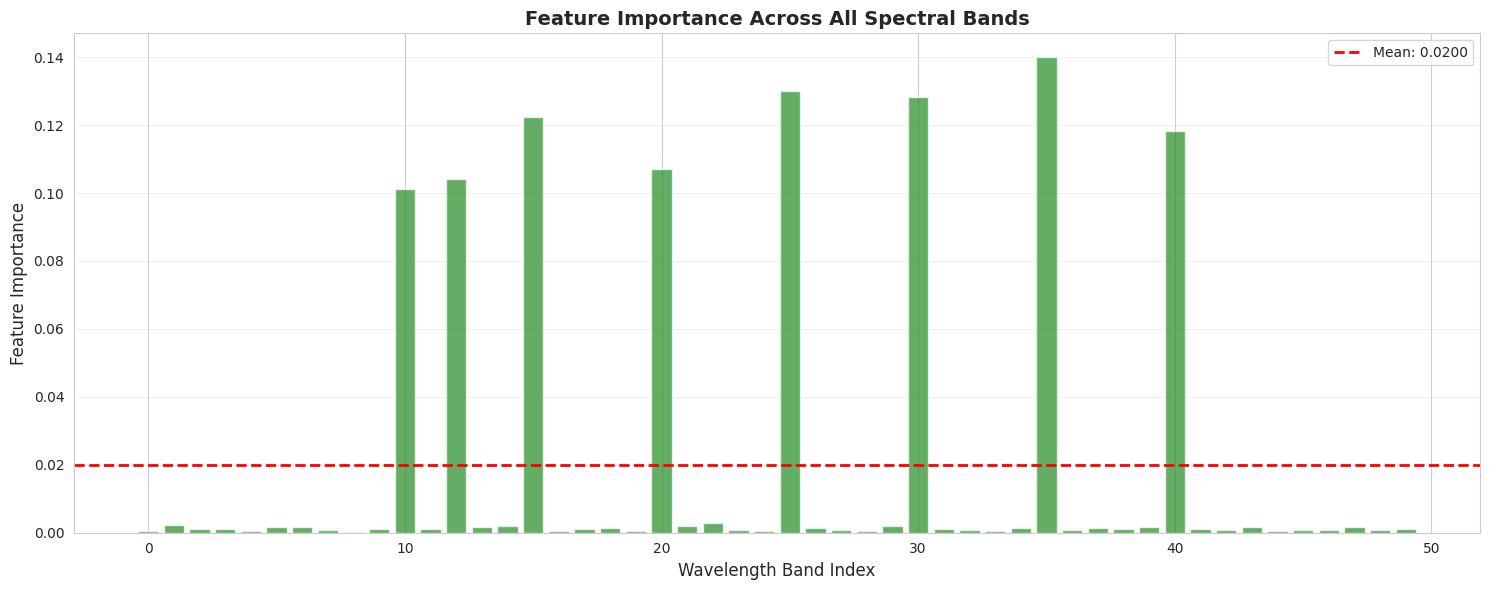


Classification Report (Validation Set):
              precision    recall  f1-score   support

       Argon     1.0000    1.0000    1.0000        50
      Helium     1.0000    1.0000    1.0000        50
    Hydrogen     1.0000    1.0000    1.0000        50
        Neon     1.0000    1.0000    1.0000        50

    accuracy                         1.0000       200
   macro avg     1.0000    1.0000    1.0000       200
weighted avg     1.0000    1.0000    1.0000       200


✅ Cell 7 done: Best Random Forest evaluated with feature importance.


In [61]:
"""
Extract best model and analyze feature importance.
Feature importance is unique to tree-based models.
"""

print("=" * 80)
print("🏆 BEST RANDOM FOREST MODEL EVALUATION")
print("=" * 80)

# Get best model
rf_best = grid_search_rf.best_estimator_

print("Best Random Forest model details:")
print(f"  Number of trees: {rf_best.n_estimators}")
print(f"  Max depth: {rf_best.max_depth}")
print(f"  Min samples split: {rf_best.min_samples_split}")
print(f"  Min samples leaf: {rf_best.min_samples_leaf}")
print(f"  Max features: {rf_best.max_features}")

# Predict on training set
y_train_pred_best_rf = rf_best.predict(preprocessed_data['X_train_scaled'])
train_acc_best_rf = accuracy_score(preprocessed_data['y_train_encoded'], y_train_pred_best_rf)

# Predict on validation set
y_val_pred_best_rf = rf_best.predict(preprocessed_data['X_val_scaled'])
val_acc_best_rf = accuracy_score(preprocessed_data['y_val_encoded'], y_val_pred_best_rf)

print(f"\nPerformance:")
print(f"  Training Accuracy: {train_acc_best_rf:.4f} ({train_acc_best_rf*100:.2f}%)")
print(f"  Validation Accuracy: {val_acc_best_rf:.4f} ({val_acc_best_rf*100:.2f}%)")
print(f"  Improvement over baseline: {(val_acc_best_rf - val_accuracy_rf)*100:.2f}%")

# Detailed validation metrics
precision_best_rf = precision_score(preprocessed_data['y_val_encoded'], y_val_pred_best_rf, average='weighted')
recall_best_rf = recall_score(preprocessed_data['y_val_encoded'], y_val_pred_best_rf, average='weighted')
f1_best_rf = f1_score(preprocessed_data['y_val_encoded'], y_val_pred_best_rf, average='weighted')

print(f"\nWeighted Validation Metrics:")
print(f"  Precision: {precision_best_rf:.4f}")
print(f"  Recall: {recall_best_rf:.4f}")
print(f"  F1-Score: {f1_best_rf:.4f}")

# Feature importance analysis
print("\n" + "=" * 80)
print("🌟 FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

feature_importance = rf_best.feature_importances_
feature_names = [f"band_{i}" for i in range(len(feature_importance))]

# Get top 10 most important features
top_indices = np.argsort(feature_importance)[-10:][::-1]
top_features = [feature_names[i] for i in top_indices]
top_importance = feature_importance[top_indices]

print("\nTop 10 most important spectral bands:")
for i, (feat, imp) in enumerate(zip(top_features, top_importance), 1):
    print(f"  {i}. {feat}: {imp:.4f}")

# Visualize feature importance
plt.figure(figsize=(15, 6))
plt.bar(range(len(feature_importance)), feature_importance, color='forestgreen', alpha=0.7)
plt.xlabel('Wavelength Band Index', fontsize=12)
plt.ylabel('Feature Importance', fontsize=12)
plt.title('Feature Importance Across All Spectral Bands', fontsize=14, fontweight='bold')
plt.axhline(y=feature_importance.mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {feature_importance.mean():.4f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Classification report
print("\nClassification Report (Validation Set):")
print(classification_report(
    preprocessed_data['y_val_encoded'], 
    y_val_pred_best_rf,
    target_names=preprocessed_data['class_names'],
    digits=4
))

print("\n✅ Cell 7 done: Best Random Forest evaluated with feature importance.")

In [62]:
"""
Store Random Forest results and compare with SVM.
"""

print("=" * 80)
print("💾 STORING RANDOM FOREST RESULTS")
print("=" * 80)

# Create comprehensive results dictionary
rf_results = {
    # Models
    'baseline_model': rf_baseline,
    'best_model': rf_best,
    'grid_search': grid_search_rf,
    
    # Baseline performance
    'baseline_train_acc': train_accuracy_rf,
    'baseline_val_acc': val_accuracy_rf,
    'baseline_val_precision': rf_baseline_results['val_precision'],
    'baseline_val_recall': rf_baseline_results['val_recall'],
    'baseline_val_f1': rf_baseline_results['val_f1'],
    
    # Best model performance
    'best_train_acc': train_acc_best_rf,
    'best_val_acc': val_acc_best_rf,
    'best_val_precision': precision_best_rf,
    'best_val_recall': recall_best_rf,
    'best_val_f1': f1_best_rf,
    
    # Best parameters
    'best_params': grid_search_rf.best_params_,
    'best_cv_score': grid_search_rf.best_score_,
    
    # Feature importance
    'feature_importance': feature_importance,
    'top_features': list(zip(top_features, top_importance)),
    
    # Predictions
    'val_predictions': y_val_pred_best_rf,
    'val_true_labels': preprocessed_data['y_val_encoded']
}

print("Random Forest results stored in 'rf_results' dictionary.")

# Create comprehensive comparison table
comparison_data = {
    'Model': [
        'SVM Baseline',
        'SVM Best',
        'RF Baseline',
        'RF Best'
    ],
    'Train Acc': [
        f"{svm_results['baseline_train_acc']:.4f}",
        f"{svm_results['best_train_acc']:.4f}",
        f"{train_accuracy_rf:.4f}",
        f"{train_acc_best_rf:.4f}"
    ],
    'Val Acc': [
        f"{svm_results['baseline_val_acc']:.4f}",
        f"{svm_results['best_val_acc']:.4f}",
        f"{val_accuracy_rf:.4f}",
        f"{val_acc_best_rf:.4f}"
    ],
    'F1-Score': [
        f"{svm_results['baseline_val_f1']:.4f}",
        f"{svm_results['best_val_f1']:.4f}",
        f"{rf_baseline_results['val_f1']:.4f}",
        f"{f1_best_rf:.4f}"
    ],
    'Train-Val Gap': [
        f"{(svm_results['baseline_train_acc'] - svm_results['baseline_val_acc']):.4f}",
        f"{(svm_results['best_train_acc'] - svm_results['best_val_acc']):.4f}",
        f"{(train_accuracy_rf - val_accuracy_rf):.4f}",
        f"{(train_acc_best_rf - val_acc_best_rf):.4f}"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + "=" * 80)
print("📊 SVM vs RANDOM FOREST COMPARISON")
print("=" * 80)
display(comparison_df)

# Determine best overall model
best_models = {
    'SVM': svm_results['best_val_acc'],
    'Random Forest': rf_results['best_val_acc']
}
best_overall = max(best_models, key=best_models.get)

print(f"\n🏆 Best Traditional ML Model: {best_overall}")
print(f"   Validation Accuracy: {best_models[best_overall]:.4f} ({best_models[best_overall]*100:.2f}%)")

print("\n" + "=" * 80)
print("✅ PHASE 6 COMPLETE!")
print("=" * 80)

print("\nTraditional ML Training Summary:")
print(f"  • SVM best validation accuracy: {svm_results['best_val_acc']*100:.2f}%")
print(f"  • RF best validation accuracy: {rf_results['best_val_acc']*100:.2f}%")
print(f"  • Winner: {best_overall}")
print(f"  • Most important features identified via RF")

print("\nNext: Phase 7 - Deep Learning with PyTorch Lightning")

💾 STORING RANDOM FOREST RESULTS
Random Forest results stored in 'rf_results' dictionary.

📊 SVM vs RANDOM FOREST COMPARISON


,Model,Train Acc,Val Acc,F1-Score,Train-Val Gap
0,SVM Baseline,1.0000,1.0000,1.0000,0.0000
1,SVM Best,1.0000,1.0000,1.0000,0.0000
2,RF Baseline,1.0000,1.0000,1.0000,0.0000
3,RF Best,1.0000,1.0000,1.0000,0.0000



🏆 Best Traditional ML Model: SVM
   Validation Accuracy: 1.0000 (100.00%)

✅ PHASE 6 COMPLETE!

Traditional ML Training Summary:
  • SVM best validation accuracy: 100.00%
  • RF best validation accuracy: 100.00%
  • Winner: SVM
  • Most important features identified via RF

Next: Phase 7 - Deep Learning with PyTorch Lightning


In [63]:
"""
Define a feedforward neural network for spectral classification.
Architecture: Input → Dense → ReLU → Dropout → Dense → ReLU → Dropout → Output
"""

class SpectralClassifierNN(nn.Module):
    """
    Feedforward neural network for atomic spectra classification.
    
    Args:
        input_dim: Number of input features (spectral bands)
        hidden_dim1: Size of first hidden layer
        hidden_dim2: Size of second hidden layer
        output_dim: Number of output classes
        dropout_rate: Dropout probability for regularization
    """
    
    def __init__(self, input_dim, hidden_dim1=128, hidden_dim2=64, 
                 output_dim=4, dropout_rate=0.3):
        super(SpectralClassifierNN, self).__init__()
        
        # Layer definitions
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.bn1 = nn.BatchNorm1d(hidden_dim1)
        self.dropout1 = nn.Dropout(dropout_rate)
        
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.bn2 = nn.BatchNorm1d(hidden_dim2)
        self.dropout2 = nn.Dropout(dropout_rate)
        
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
        
    def forward(self, x):
        """Forward pass through the network"""
        # First hidden layer
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout1(x)
        
        # Second hidden layer
        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout2(x)
        
        # Output layer (no activation, handled by loss function)
        x = self.fc3(x)
        
        return x


print("=" * 80)
print("🧠 NEURAL NETWORK ARCHITECTURE DEFINED")
print("=" * 80)

# Test the architecture
input_dim = preprocessed_data['n_features']
output_dim = preprocessed_data['n_classes']

test_model = SpectralClassifierNN(input_dim=input_dim, output_dim=output_dim)

print(f"\nModel Architecture:")
print(test_model)

# Count parameters
total_params = sum(p.numel() for p in test_model.parameters())
trainable_params = sum(p.numel() for p in test_model.parameters() if p.requires_grad)

print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# Test forward pass
dummy_input = torch.randn(32, input_dim)
dummy_output = test_model(dummy_input)
print(f"\nTest forward pass:")
print(f"  Input shape: {dummy_input.shape}")
print(f"  Output shape: {dummy_output.shape}")

print("\n✅ Cell 1 done: Neural network architecture defined.")

🧠 NEURAL NETWORK ARCHITECTURE DEFINED

Model Architecture:
SpectralClassifierNN(
  (fc1): Linear(in_features=50, out_features=128, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)

Total parameters: 15,428
Trainable parameters: 15,428

Test forward pass:
  Input shape: torch.Size([32, 50])
  Output shape: torch.Size([32, 4])

✅ Cell 1 done: Neural network architecture defined.


In [70]:
"""
PyTorch Lightning module wraps the model with training logic.
Handles training step, validation step, and optimizer configuration.
"""

class SpectralLightningModule(pl.LightningModule):
    """
    Lightning module for spectral classification.
    Encapsulates model, loss, metrics, and optimization.
    """
    
    def __init__(self, input_dim, hidden_dim1=128, hidden_dim2=64, 
                 output_dim=4, dropout_rate=0.3, learning_rate=0.001):
        super().__init__()
        
        # Save hyperparameters
        self.save_hyperparameters()
        
        # Model
        self.model = SpectralClassifierNN(
            input_dim=input_dim,
            hidden_dim1=hidden_dim1,
            hidden_dim2=hidden_dim2,
            output_dim=output_dim,
            dropout_rate=dropout_rate
        )
        
        # Loss function
        self.criterion = nn.CrossEntropyLoss()
        
        # Metrics
        self.train_acc = Accuracy(task='multiclass', num_classes=output_dim)
        self.val_acc = Accuracy(task='multiclass', num_classes=output_dim)
        
    def forward(self, x):
        """Forward pass"""
        return self.model(x)
    
    def training_step(self, batch, batch_idx):
        """Training step for one batch"""
        x, y = batch
        logits = self(x)
        loss = self.criterion(logits, y)
        
        # Calculate accuracy
        preds = torch.argmax(logits, dim=1)
        acc = self.train_acc(preds, y)
        
        # Log metrics
        self.log('train_loss', loss, on_step=False, on_epoch=True, prog_bar=True)
        self.log('train_acc', acc, on_step=False, on_epoch=True, prog_bar=True)
        
        return loss
    
    def validation_step(self, batch, batch_idx):
        """Validation step for one batch"""
        x, y = batch
        logits = self(x)
        loss = self.criterion(logits, y)
        
        # Calculate accuracy
        preds = torch.argmax(logits, dim=1)
        acc = self.val_acc(preds, y)
        
        # Log metrics
        self.log('val_loss', loss, on_step=False, on_epoch=True, prog_bar=True)
        self.log('val_acc', acc, on_step=False, on_epoch=True, prog_bar=True)
        
        return loss
    
    def configure_optimizers(self):
        """Configure optimizer and learning rate scheduler"""
        optimizer = torch.optim.Adam(self.parameters(), lr=self.hparams.learning_rate)
        
        # Learning rate scheduler (reduce on plateau)
        # FIXED: Removed 'verbose' parameter (deprecated in newer PyTorch)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode='min', factor=0.5, patience=5
        )
        
        return {
            'optimizer': optimizer,
            'lr_scheduler': {
                'scheduler': scheduler,
                'monitor': 'val_loss'
            }
        }


print("=" * 80)
print("⚡ PYTORCH LIGHTNING MODULE CREATED")
print("=" * 80)

print("\nLightning Module Features:")
print("  ✅ Automatic training/validation loop")
print("  ✅ Built-in metric tracking")
print("  ✅ Learning rate scheduling")
print("  ✅ Cross-entropy loss for multi-class classification")
print("  ✅ Adam optimizer")

print("\n✅ Cell 2 done: Lightning module ready for training.")

⚡ PYTORCH LIGHTNING MODULE CREATED

Lightning Module Features:
  ✅ Automatic training/validation loop
  ✅ Built-in metric tracking
  ✅ Learning rate scheduling
  ✅ Cross-entropy loss for multi-class classification
  ✅ Adam optimizer

✅ Cell 2 done: Lightning module ready for training.


In [65]:
"""
Configure callbacks and logger for training.
Callbacks: EarlyStopping, ModelCheckpoint
Logger: CSVLogger for training history
"""

print("=" * 80)
print("🔧 TRAINING CONFIGURATION SETUP")
print("=" * 80)

# Create directory for logs and checkpoints
import os
log_dir = './lightning_logs'
checkpoint_dir = './checkpoints'
os.makedirs(log_dir, exist_ok=True)
os.makedirs(checkpoint_dir, exist_ok=True)

# Early stopping callback
# Stops training if validation loss doesn't improve
early_stop_callback = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=True,
    mode='min'
)

# Model checkpoint callback
# Saves best model based on validation loss
checkpoint_callback = ModelCheckpoint(
    dirpath=checkpoint_dir,
    filename='spectral-classifier-{epoch:02d}-{val_loss:.4f}',
    monitor='val_loss',
    mode='min',
    save_top_k=1,
    verbose=True
)

# CSV logger for training history
csv_logger = CSVLogger(save_dir=log_dir, name='spectral_classifier')

print("Callbacks configured:")
print(f"  • Early Stopping: patience={early_stop_callback.patience}, monitor={early_stop_callback.monitor}")
print(f"  • Model Checkpoint: save_top_k=1, monitor={checkpoint_callback.monitor}")
print(f"  • CSV Logger: {csv_logger.log_dir}")

# Training hyperparameters
EPOCHS = 50
LEARNING_RATE = 0.001
HIDDEN_DIM1 = 128
HIDDEN_DIM2 = 64
DROPOUT_RATE = 0.3

print(f"\nTraining Hyperparameters:")
print(f"  Max epochs: {EPOCHS}")
print(f"  Learning rate: {LEARNING_RATE}")
print(f"  Hidden layer 1: {HIDDEN_DIM1} units")
print(f"  Hidden layer 2: {HIDDEN_DIM2} units")
print(f"  Dropout rate: {DROPOUT_RATE}")
print(f"  Batch size: {BATCH_SIZE}")

print("\n✅ Cell 3 done: Training configuration ready.")

🔧 TRAINING CONFIGURATION SETUP
Callbacks configured:
  • Early Stopping: patience=10, monitor=val_loss
  • Model Checkpoint: save_top_k=1, monitor=val_loss
  • CSV Logger: ./lightning_logs/spectral_classifier/version_0

Training Hyperparameters:
  Max epochs: 50
  Learning rate: 0.001
  Hidden layer 1: 128 units
  Hidden layer 2: 64 units
  Dropout rate: 0.3
  Batch size: 32

✅ Cell 3 done: Training configuration ready.


In [71]:
"""
Initialize the Lightning module and Trainer.
"""

print("=" * 80)
print("🎯 MODEL AND TRAINER INITIALIZATION")
print("=" * 80)

# Initialize the Lightning module
lightning_model = SpectralLightningModule(
    input_dim=preprocessed_data['n_features'],
    hidden_dim1=HIDDEN_DIM1,
    hidden_dim2=HIDDEN_DIM2,
    output_dim=preprocessed_data['n_classes'],
    dropout_rate=DROPOUT_RATE,
    learning_rate=LEARNING_RATE
)

print("Lightning model initialized.")
print(f"  Input dimension: {preprocessed_data['n_features']}")
print(f"  Output dimension: {preprocessed_data['n_classes']}")

# Initialize the Trainer
trainer = pl.Trainer(
    max_epochs=EPOCHS,
    callbacks=[early_stop_callback, checkpoint_callback],
    logger=csv_logger,
    accelerator='auto',  # Automatically use GPU if available
    devices=1,
    deterministic=True,
    log_every_n_steps=10,
    enable_progress_bar=True
)

print(f"\nTrainer configured:")
print(f"  Max epochs: {trainer.max_epochs}")
print(f"  Accelerator: {trainer.accelerator}")
print(f"  Device: {'GPU' if torch.cuda.is_available() else 'CPU'}")
print(f"  Callbacks: {len(trainer.callbacks)} registered")

print("\n✅ Cell 4 done: Model and trainer initialized.")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


🎯 MODEL AND TRAINER INITIALIZATION
Lightning model initialized.
  Input dimension: 50
  Output dimension: 4

Trainer configured:
  Max epochs: 50
  Accelerator: <pytorch_lightning.accelerators.cpu.CPUAccelerator object at 0x7d0cb4209130>
  Device: CPU
  Callbacks: 4 registered

✅ Cell 4 done: Model and trainer initialized.


In [72]:
"""
Train the neural network using PyTorch Lightning.
Training includes automatic validation after each epoch.
"""

print("=" * 80)
print("🚂 STARTING MODEL TRAINING")
print("=" * 80)

print("Training in progress...")
print("Monitor validation loss and accuracy below.\n")

# Train the model
trainer.fit(
    lightning_model,
    train_dataloaders=pytorch_data['train_loader'],
    val_dataloaders=pytorch_data['val_loader']
)

print("\n" + "=" * 80)
print("✅ TRAINING COMPLETE!")
print("=" * 80)

# Training summary
print(f"\nTraining Summary:")
print(f"  Total epochs run: {trainer.current_epoch + 1}")
print(f"  Best model checkpoint: {checkpoint_callback.best_model_path}")
print(f"  Best validation loss: {checkpoint_callback.best_model_score:.4f}")

# Check if early stopping was triggered
if early_stop_callback.stopped_epoch > 0:
    print(f"  Early stopping triggered at epoch: {early_stop_callback.stopped_epoch}")
else:
    print(f"  Training completed all {EPOCHS} epochs")

print("\n✅ Cell 5 done: Model training completed.")

🚂 STARTING MODEL TRAINING
Training in progress...
Monitor validation loss and accuracy below.



┏━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name      ┃ Type                 ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ model     │ SpectralClassifierNN │ 15.4 K │ train │     0 │
│ 1 │ criterion │ CrossEntropyLoss     │      0 │ train │     0 │
│ 2 │ train_acc │ MulticlassAccuracy   │      0 │ train │     0 │
│ 3 │ val_acc   │ MulticlassAccuracy   │      0 │ train │     0 │
└───┴───────────┴──────────────────────┴────────┴───────┴───────┘

Trainable params: 15.4 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 15.4 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 11                                                                                          
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

Output()

Metric val_loss improved. New best score: 0.991
Epoch 0, global step 19: 'val_loss' reached 0.99090 (best 0.99090), saving model to '/kaggle/working/checkpoints/spectral-classifier-epoch=00-val_loss=0.9909.ckpt' as top 1
Metric val_loss improved by 0.466 >= min_delta = 0.0. New best score: 0.525
Epoch 1, global step 38: 'val_loss' reached 0.52528 (best 0.52528), saving model to '/kaggle/working/checkpoints/spectral-classifier-epoch=01-val_loss=0.5253.ckpt' as top 1
Metric val_loss improved by 0.252 >= min_delta = 0.0. New best score: 0.273
Epoch 2, global step 57: 'val_loss' reached 0.27343 (best 0.27343), saving model to '/kaggle/working/checkpoints/spectral-classifier-epoch=02-val_loss=0.2734.ckpt' as top 1
Metric val_loss improved by 0.116 >= min_delta = 0.0. New best score: 0.158
Epoch 3, global step 76: 'val_loss' reached 0.15763 (best 0.15763), saving model to '/kaggle/working/checkpoints/spectral-classifier-epoch=03-val_loss=0.1576.ckpt' as top 1
Metric val_loss improved by 0.05


✅ TRAINING COMPLETE!

Training Summary:
  Total epochs run: 51
  Best model checkpoint: /kaggle/working/checkpoints/spectral-classifier-epoch=49-val_loss=0.0008.ckpt
  Best validation loss: 0.0008
  Training completed all 50 epochs

✅ Cell 5 done: Model training completed.


📊 VALIDATION SET EVALUATION
Best model loaded from: /kaggle/working/checkpoints/spectral-classifier-epoch=49-val_loss=0.0008.ckpt
Model on device: cpu

📈 Validation Performance:
  Accuracy: 1.0000 (100.00%)
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

Classification Report (Validation Set):
              precision    recall  f1-score   support

       Argon     1.0000    1.0000    1.0000        50
      Helium     1.0000    1.0000    1.0000        50
    Hydrogen     1.0000    1.0000    1.0000        50
        Neon     1.0000    1.0000    1.0000        50

    accuracy                         1.0000       200
   macro avg     1.0000    1.0000    1.0000       200
weighted avg     1.0000    1.0000    1.0000       200



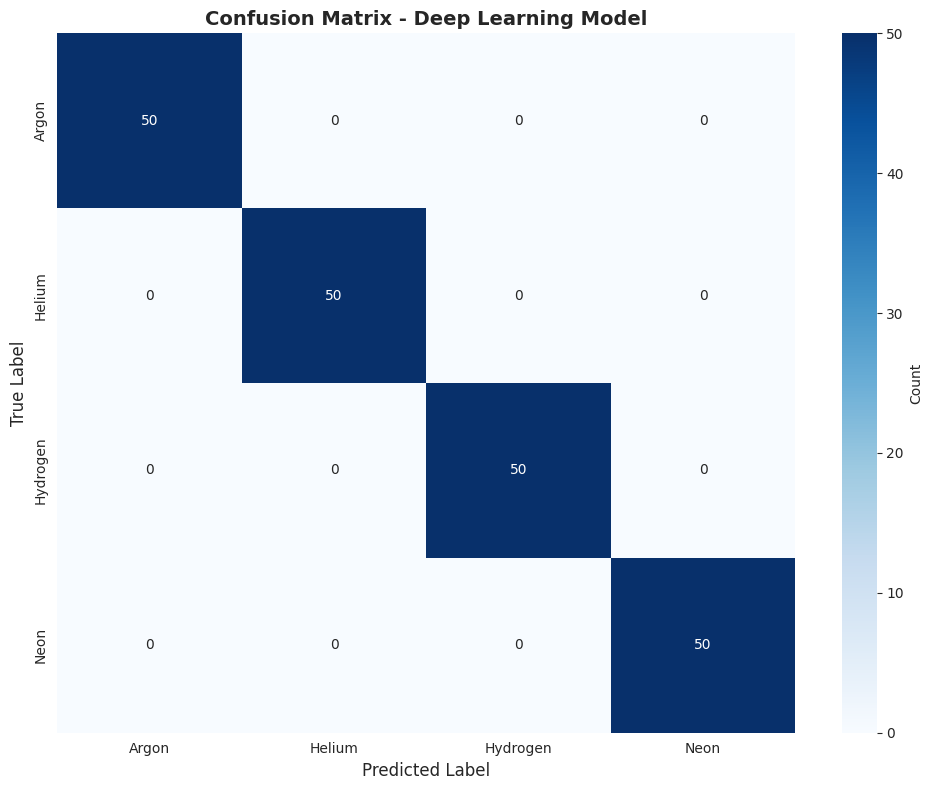


✅ Cell 6 done: Validation evaluation complete.


In [73]:
"""
Load best model and evaluate on validation set.
Get detailed predictions and metrics.
"""

print("=" * 80)
print("📊 VALIDATION SET EVALUATION")
print("=" * 80)

# Load best model from checkpoint
best_model = SpectralLightningModule.load_from_checkpoint(
    checkpoint_callback.best_model_path
)
best_model.eval()

# Move model to appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
best_model = best_model.to(device)

print(f"Best model loaded from: {checkpoint_callback.best_model_path}")
print(f"Model on device: {device}")

# Get predictions on validation set
all_preds = []
all_labels = []
all_probs = []

with torch.no_grad():
    for batch_x, batch_y in pytorch_data['val_loader']:
        batch_x = batch_x.to(device)
        logits = best_model(batch_x)
        probs = F.softmax(logits, dim=1)
        preds = torch.argmax(logits, dim=1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch_y.numpy())
        all_probs.extend(probs.cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

# Calculate metrics
dl_val_accuracy = accuracy_score(all_labels, all_preds)
dl_val_precision = precision_score(all_labels, all_preds, average='weighted')
dl_val_recall = recall_score(all_labels, all_preds, average='weighted')
dl_val_f1 = f1_score(all_labels, all_preds, average='weighted')

print(f"\n📈 Validation Performance:")
print(f"  Accuracy: {dl_val_accuracy:.4f} ({dl_val_accuracy*100:.2f}%)")
print(f"  Precision: {dl_val_precision:.4f}")
print(f"  Recall: {dl_val_recall:.4f}")
print(f"  F1-Score: {dl_val_f1:.4f}")

# Classification report
print("\nClassification Report (Validation Set):")
print(classification_report(
    all_labels, 
    all_preds,
    target_names=preprocessed_data['class_names'],
    digits=4
))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=preprocessed_data['class_names'],
            yticklabels=preprocessed_data['class_names'],
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix - Deep Learning Model', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n✅ Cell 6 done: Validation evaluation complete.")

📈 TRAINING HISTORY VISUALIZATION
Metrics loaded from: ./lightning_logs/spectral_classifier/version_0/metrics.csv
Total logged steps: 100


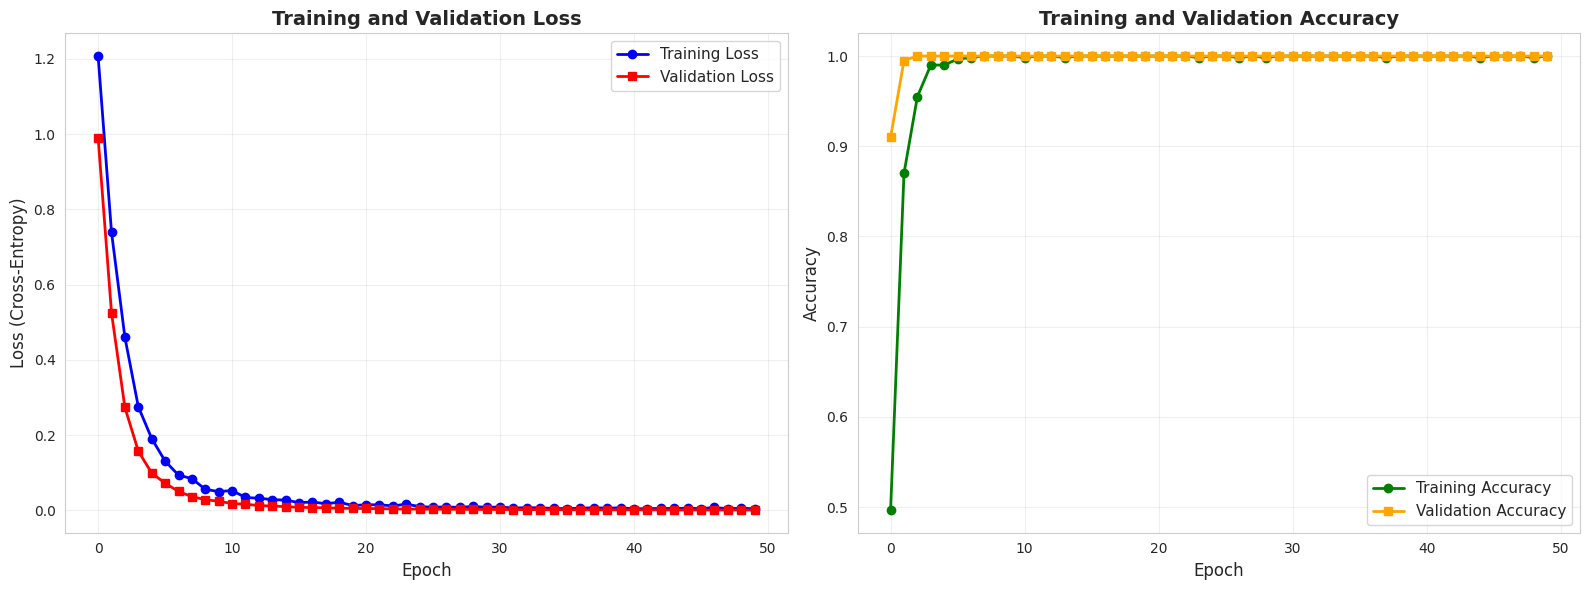


Final Epoch (49):
  Train Loss: 0.0041
  Val Loss: 0.0008
  Train Accuracy: 1.0000
  Val Accuracy: 1.0000

Train-Validation Accuracy Gap: 0.0000
✅ Reasonable gap - good generalization

✅ Cell 7 done: Training history visualized.


In [74]:
"""
Visualize training and validation metrics over epochs.
"""

print("=" * 80)
print("📈 TRAINING HISTORY VISUALIZATION")
print("=" * 80)

# Load training metrics from CSV logger
metrics_file = os.path.join(csv_logger.log_dir, 'metrics.csv')
metrics_df = pd.read_csv(metrics_file)

print(f"Metrics loaded from: {metrics_file}")
print(f"Total logged steps: {len(metrics_df)}")

# Aggregate by epoch (take mean of steps within each epoch)
metrics_by_epoch = metrics_df.groupby('epoch').mean()

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Loss curves
axes[0].plot(metrics_by_epoch.index, metrics_by_epoch['train_loss'], 
             marker='o', linewidth=2, markersize=6, label='Training Loss', color='blue')
axes[0].plot(metrics_by_epoch.index, metrics_by_epoch['val_loss'], 
             marker='s', linewidth=2, markersize=6, label='Validation Loss', color='red')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (Cross-Entropy)', fontsize=12)
axes[0].set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot 2: Accuracy curves
axes[1].plot(metrics_by_epoch.index, metrics_by_epoch['train_acc'], 
             marker='o', linewidth=2, markersize=6, label='Training Accuracy', color='green')
axes[1].plot(metrics_by_epoch.index, metrics_by_epoch['val_acc'], 
             marker='s', linewidth=2, markersize=6, label='Validation Accuracy', color='orange')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final metrics
final_epoch = metrics_by_epoch.index[-1]
print(f"\nFinal Epoch ({final_epoch}):")
print(f"  Train Loss: {metrics_by_epoch['train_loss'].iloc[-1]:.4f}")
print(f"  Val Loss: {metrics_by_epoch['val_loss'].iloc[-1]:.4f}")
print(f"  Train Accuracy: {metrics_by_epoch['train_acc'].iloc[-1]:.4f}")
print(f"  Val Accuracy: {metrics_by_epoch['val_acc'].iloc[-1]:.4f}")

# Check for overfitting
train_val_gap = metrics_by_epoch['train_acc'].iloc[-1] - metrics_by_epoch['val_acc'].iloc[-1]
print(f"\nTrain-Validation Accuracy Gap: {train_val_gap:.4f}")
if train_val_gap > 0.1:
    print("⚠️ Large gap suggests some overfitting")
else:
    print("✅ Reasonable gap - good generalization")

print("\n✅ Cell 7 done: Training history visualized.")

🏆 FINAL MODEL COMPARISON
Deep learning results stored in 'dl_results' dictionary.


,Model,Validation Accuracy,F1-Score,Precision,Recall
0,SVM (Baseline),1.0000,1.0000,1.0000,1.0000
1,SVM (Tuned),1.0000,1.0000,1.0000,1.0000
2,Random Forest (Baseline),1.0000,1.0000,1.0000,1.0000
3,Random Forest (Tuned),1.0000,1.0000,1.0000,1.0000
4,Deep Learning (Neural Network),1.0000,1.0000,1.0000,1.0000


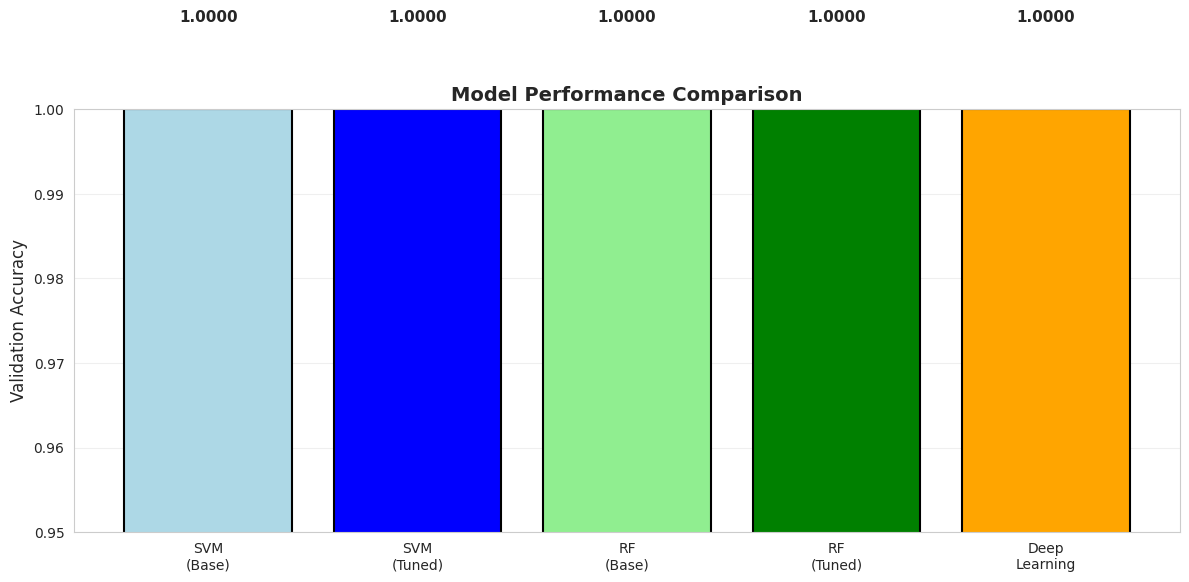


🏆 BEST OVERALL MODEL: SVM (Baseline)
   Validation Accuracy: 1.0000 (100.00%)

✅ PHASE 7 COMPLETE!

Phase 7 Summary:
  • Neural network trained for 51 epochs
  • Deep Learning validation accuracy: 100.00%
  • Best overall model: SVM (Baseline)
  • All models compared side-by-side

Next: Phase 8 - Model Evaluation & Comparison on Test Set


In [76]:
"""
Store deep learning results and compare all models.
"""

print("=" * 80)
print("🏆 FINAL MODEL COMPARISON")
print("=" * 80)

# Store deep learning results
dl_results = {
    'model': best_model,
    'trainer': trainer,
    'checkpoint_path': checkpoint_callback.best_model_path,
    'val_accuracy': dl_val_accuracy,
    'val_precision': dl_val_precision,
    'val_recall': dl_val_recall,
    'val_f1': dl_val_f1,
    'predictions': all_preds,
    'true_labels': all_labels,
    'probabilities': all_probs,
    'training_history': metrics_by_epoch
}

print("Deep learning results stored in 'dl_results' dictionary.")

# Comprehensive model comparison
comparison_data = {
    'Model': [
        'SVM (Baseline)',
        'SVM (Tuned)',
        'Random Forest (Baseline)',
        'Random Forest (Tuned)',
        'Deep Learning (Neural Network)'
    ],
    'Validation Accuracy': [
        f"{svm_results['baseline_val_acc']:.4f}",
        f"{svm_results['best_val_acc']:.4f}",
        f"{rf_results['baseline_val_acc']:.4f}",
        f"{rf_results['best_val_acc']:.4f}",
        f"{dl_val_accuracy:.4f}"
    ],
    'F1-Score': [
        f"{svm_results['baseline_val_f1']:.4f}",
        f"{svm_results['best_val_f1']:.4f}",
        f"{rf_results['baseline_val_f1']:.4f}",
        f"{rf_results['best_val_f1']:.4f}",
        f"{dl_val_f1:.4f}"
    ],
    'Precision': [
        f"{svm_results['baseline_val_precision']:.4f}",
        f"{svm_results['best_val_precision']:.4f}",
        f"{rf_results['baseline_val_precision']:.4f}",
        f"{rf_results['best_val_precision']:.4f}",
        f"{dl_val_precision:.4f}"
    ],
    'Recall': [
        f"{svm_results['baseline_val_recall']:.4f}",
        f"{svm_results['best_val_recall']:.4f}",
        f"{rf_results['baseline_val_recall']:.4f}",
        f"{rf_results['best_val_recall']:.4f}",
        f"{dl_val_recall:.4f}"
    ]
}

final_comparison_df = pd.DataFrame(comparison_data)
display(final_comparison_df)

# Visual comparison
accuracies = [
    svm_results['baseline_val_acc'],
    svm_results['best_val_acc'],
    rf_results['baseline_val_acc'],
    rf_results['best_val_acc'],
    dl_val_accuracy
]

model_names = ['SVM\n(Base)', 'SVM\n(Tuned)', 'RF\n(Base)', 'RF\n(Tuned)', 'Deep\nLearning']
colors_bar = ['lightblue', 'blue', 'lightgreen', 'green', 'orange']

plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, accuracies, color=colors_bar, edgecolor='black', linewidth=1.5)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylim([min(accuracies) - 0.05, 1.0])
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{acc:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Determine best model
best_val_acc = max(accuracies)
best_model_idx = accuracies.index(best_val_acc)
best_model_name = comparison_data['Model'][best_model_idx]

print(f"\n🏆 BEST OVERALL MODEL: {best_model_name}")
print(f"   Validation Accuracy: {best_val_acc:.4f} ({best_val_acc*100:.2f}%)")

print("\n" + "=" * 80)
print("✅ PHASE 7 COMPLETE!")
print("=" * 80)

print("\nPhase 7 Summary:")
print(f"  • Neural network trained for {trainer.current_epoch + 1} epochs")
print(f"  • Deep Learning validation accuracy: {dl_val_accuracy*100:.2f}%")
print(f"  • Best overall model: {best_model_name}")
print(f"  • All models compared side-by-side")

print("\nNext: Phase 8 - Model Evaluation & Comparison on Test Set")

In [77]:
"""
Evaluate the best SVM model on the held-out test set.
This is the first time we're using the test data.
"""

print("=" * 80)
print("🧪 SVM MODEL - TEST SET EVALUATION")
print("=" * 80)

# Predict on test set using best SVM model
svm_test_pred = svm_results['best_model'].predict(preprocessed_data['X_test_scaled'])

# Calculate metrics
svm_test_accuracy = accuracy_score(preprocessed_data['y_test_encoded'], svm_test_pred)
svm_test_precision = precision_score(preprocessed_data['y_test_encoded'], svm_test_pred, average='weighted')
svm_test_recall = recall_score(preprocessed_data['y_test_encoded'], svm_test_pred, average='weighted')
svm_test_f1 = f1_score(preprocessed_data['y_test_encoded'], svm_test_pred, average='weighted')

print(f"SVM Test Set Performance:")
print(f"  Accuracy: {svm_test_accuracy:.4f} ({svm_test_accuracy*100:.2f}%)")
print(f"  Precision: {svm_test_precision:.4f}")
print(f"  Recall: {svm_test_recall:.4f}")
print(f"  F1-Score: {svm_test_f1:.4f}")

# Compare with validation performance
print(f"\nValidation vs Test Comparison:")
print(f"  Validation Accuracy: {svm_results['best_val_acc']:.4f}")
print(f"  Test Accuracy: {svm_test_accuracy:.4f}")
print(f"  Difference: {(svm_test_accuracy - svm_results['best_val_acc'])*100:+.2f}%")

# Per-class performance
print("\nPer-Class Classification Report:")
print(classification_report(
    preprocessed_data['y_test_encoded'],
    svm_test_pred,
    target_names=preprocessed_data['class_names'],
    digits=4
))

# Store results
svm_test_results = {
    'predictions': svm_test_pred,
    'accuracy': svm_test_accuracy,
    'precision': svm_test_precision,
    'recall': svm_test_recall,
    'f1': svm_test_f1
}

print("\n✅ Cell 1 done: SVM evaluated on test set.")

🧪 SVM MODEL - TEST SET EVALUATION
SVM Test Set Performance:
  Accuracy: 1.0000 (100.00%)
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

Validation vs Test Comparison:
  Validation Accuracy: 1.0000
  Test Accuracy: 1.0000
  Difference: +0.00%

Per-Class Classification Report:
              precision    recall  f1-score   support

       Argon     1.0000    1.0000    1.0000        50
      Helium     1.0000    1.0000    1.0000        50
    Hydrogen     1.0000    1.0000    1.0000        50
        Neon     1.0000    1.0000    1.0000        50

    accuracy                         1.0000       200
   macro avg     1.0000    1.0000    1.0000       200
weighted avg     1.0000    1.0000    1.0000       200


✅ Cell 1 done: SVM evaluated on test set.


In [78]:
"""
Evaluate the best Random Forest model on the test set.
"""

print("=" * 80)
print("🌲 RANDOM FOREST MODEL - TEST SET EVALUATION")
print("=" * 80)

# Predict on test set using best Random Forest model
rf_test_pred = rf_results['best_model'].predict(preprocessed_data['X_test_scaled'])

# Calculate metrics
rf_test_accuracy = accuracy_score(preprocessed_data['y_test_encoded'], rf_test_pred)
rf_test_precision = precision_score(preprocessed_data['y_test_encoded'], rf_test_pred, average='weighted')
rf_test_recall = recall_score(preprocessed_data['y_test_encoded'], rf_test_pred, average='weighted')
rf_test_f1 = f1_score(preprocessed_data['y_test_encoded'], rf_test_pred, average='weighted')

print(f"Random Forest Test Set Performance:")
print(f"  Accuracy: {rf_test_accuracy:.4f} ({rf_test_accuracy*100:.2f}%)")
print(f"  Precision: {rf_test_precision:.4f}")
print(f"  Recall: {rf_test_recall:.4f}")
print(f"  F1-Score: {rf_test_f1:.4f}")

# Compare with validation performance
print(f"\nValidation vs Test Comparison:")
print(f"  Validation Accuracy: {rf_results['best_val_acc']:.4f}")
print(f"  Test Accuracy: {rf_test_accuracy:.4f}")
print(f"  Difference: {(rf_test_accuracy - rf_results['best_val_acc'])*100:+.2f}%")

# Per-class performance
print("\nPer-Class Classification Report:")
print(classification_report(
    preprocessed_data['y_test_encoded'],
    rf_test_pred,
    target_names=preprocessed_data['class_names'],
    digits=4
))

# Store results
rf_test_results = {
    'predictions': rf_test_pred,
    'accuracy': rf_test_accuracy,
    'precision': rf_test_precision,
    'recall': rf_test_recall,
    'f1': rf_test_f1
}

print("\n✅ Cell 2 done: Random Forest evaluated on test set.")

🌲 RANDOM FOREST MODEL - TEST SET EVALUATION
Random Forest Test Set Performance:
  Accuracy: 1.0000 (100.00%)
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

Validation vs Test Comparison:
  Validation Accuracy: 1.0000
  Test Accuracy: 1.0000
  Difference: +0.00%

Per-Class Classification Report:
              precision    recall  f1-score   support

       Argon     1.0000    1.0000    1.0000        50
      Helium     1.0000    1.0000    1.0000        50
    Hydrogen     1.0000    1.0000    1.0000        50
        Neon     1.0000    1.0000    1.0000        50

    accuracy                         1.0000       200
   macro avg     1.0000    1.0000    1.0000       200
weighted avg     1.0000    1.0000    1.0000       200


✅ Cell 2 done: Random Forest evaluated on test set.


In [79]:
"""
Evaluate the best deep learning model on the test set.
"""

print("=" * 80)
print("🧠 DEEP LEARNING MODEL - TEST SET EVALUATION")
print("=" * 80)

# Get predictions on test set
dl_test_preds = []
dl_test_labels = []
dl_test_probs = []

best_model.eval()
with torch.no_grad():
    for batch_x, batch_y in pytorch_data['test_loader']:
        batch_x = batch_x.to(device)
        logits = best_model(batch_x)
        probs = F.softmax(logits, dim=1)
        preds = torch.argmax(logits, dim=1)
        
        dl_test_preds.extend(preds.cpu().numpy())
        dl_test_labels.extend(batch_y.numpy())
        dl_test_probs.extend(probs.cpu().numpy())

dl_test_preds = np.array(dl_test_preds)
dl_test_labels = np.array(dl_test_labels)
dl_test_probs = np.array(dl_test_probs)

# Calculate metrics
dl_test_accuracy = accuracy_score(dl_test_labels, dl_test_preds)
dl_test_precision = precision_score(dl_test_labels, dl_test_preds, average='weighted')
dl_test_recall = recall_score(dl_test_labels, dl_test_preds, average='weighted')
dl_test_f1 = f1_score(dl_test_labels, dl_test_preds, average='weighted')

print(f"Deep Learning Test Set Performance:")
print(f"  Accuracy: {dl_test_accuracy:.4f} ({dl_test_accuracy*100:.2f}%)")
print(f"  Precision: {dl_test_precision:.4f}")
print(f"  Recall: {dl_test_recall:.4f}")
print(f"  F1-Score: {dl_test_f1:.4f}")

# Compare with validation performance
print(f"\nValidation vs Test Comparison:")
print(f"  Validation Accuracy: {dl_results['val_accuracy']:.4f}")
print(f"  Test Accuracy: {dl_test_accuracy:.4f}")
print(f"  Difference: {(dl_test_accuracy - dl_results['val_accuracy'])*100:+.2f}%")

# Per-class performance
print("\nPer-Class Classification Report:")
print(classification_report(
    dl_test_labels,
    dl_test_preds,
    target_names=preprocessed_data['class_names'],
    digits=4
))

# Store results
dl_test_results = {
    'predictions': dl_test_preds,
    'probabilities': dl_test_probs,
    'accuracy': dl_test_accuracy,
    'precision': dl_test_precision,
    'recall': dl_test_recall,
    'f1': dl_test_f1
}

print("\n✅ Cell 3 done: Deep Learning model evaluated on test set.")

🧠 DEEP LEARNING MODEL - TEST SET EVALUATION
Deep Learning Test Set Performance:
  Accuracy: 1.0000 (100.00%)
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000

Validation vs Test Comparison:
  Validation Accuracy: 1.0000
  Test Accuracy: 1.0000
  Difference: +0.00%

Per-Class Classification Report:
              precision    recall  f1-score   support

       Argon     1.0000    1.0000    1.0000        50
      Helium     1.0000    1.0000    1.0000        50
    Hydrogen     1.0000    1.0000    1.0000        50
        Neon     1.0000    1.0000    1.0000        50

    accuracy                         1.0000       200
   macro avg     1.0000    1.0000    1.0000       200
weighted avg     1.0000    1.0000    1.0000       200


✅ Cell 3 done: Deep Learning model evaluated on test set.


📊 CONFUSION MATRICES COMPARISON


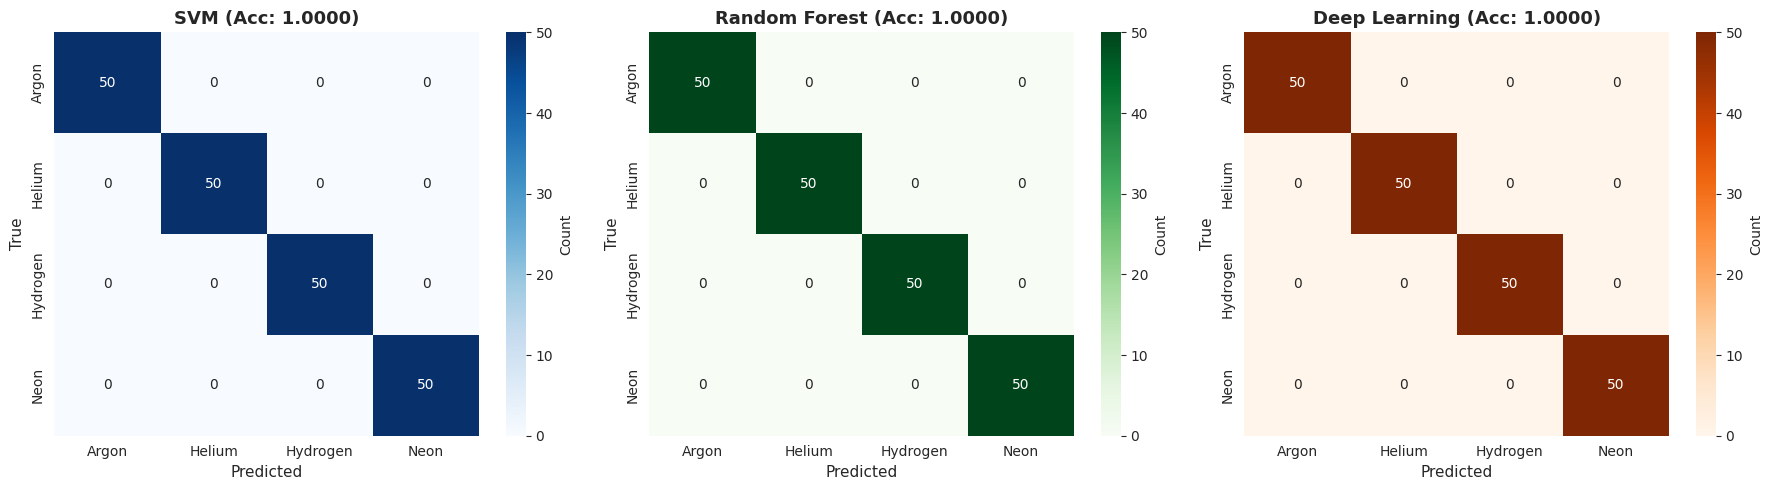


✅ Cell 4 done: Confusion matrices visualized.


In [80]:
"""
Generate and visualize confusion matrices for all three models.
"""

print("=" * 80)
print("📊 CONFUSION MATRICES COMPARISON")
print("=" * 80)

# Create confusion matrices
cm_svm = confusion_matrix(preprocessed_data['y_test_encoded'], svm_test_pred)
cm_rf = confusion_matrix(preprocessed_data['y_test_encoded'], rf_test_pred)
cm_dl = confusion_matrix(dl_test_labels, dl_test_preds)

# Visualize side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# SVM confusion matrix
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=preprocessed_data['class_names'],
            yticklabels=preprocessed_data['class_names'],
            cbar_kws={'label': 'Count'})
axes[0].set_xlabel('Predicted', fontsize=11)
axes[0].set_ylabel('True', fontsize=11)
axes[0].set_title(f'SVM (Acc: {svm_test_accuracy:.4f})', fontsize=13, fontweight='bold')

# Random Forest confusion matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=preprocessed_data['class_names'],
            yticklabels=preprocessed_data['class_names'],
            cbar_kws={'label': 'Count'})
axes[1].set_xlabel('Predicted', fontsize=11)
axes[1].set_ylabel('True', fontsize=11)
axes[1].set_title(f'Random Forest (Acc: {rf_test_accuracy:.4f})', fontsize=13, fontweight='bold')

# Deep Learning confusion matrix
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Oranges', ax=axes[2],
            xticklabels=preprocessed_data['class_names'],
            yticklabels=preprocessed_data['class_names'],
            cbar_kws={'label': 'Count'})
axes[2].set_xlabel('Predicted', fontsize=11)
axes[2].set_ylabel('True', fontsize=11)
axes[2].set_title(f'Deep Learning (Acc: {dl_test_accuracy:.4f})', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Cell 4 done: Confusion matrices visualized.")

In [81]:
"""
Create comprehensive comparison table with all metrics.
"""

print("=" * 80)
print("📈 FINAL MODEL COMPARISON - TEST SET RESULTS")
print("=" * 80)

# Create comprehensive comparison
final_comparison = {
    'Model': ['SVM (Best)', 'Random Forest (Best)', 'Deep Learning (NN)'],
    'Test Accuracy': [
        f"{svm_test_accuracy:.4f}",
        f"{rf_test_accuracy:.4f}",
        f"{dl_test_accuracy:.4f}"
    ],
    'Test Precision': [
        f"{svm_test_precision:.4f}",
        f"{rf_test_precision:.4f}",
        f"{dl_test_precision:.4f}"
    ],
    'Test Recall': [
        f"{svm_test_recall:.4f}",
        f"{rf_test_recall:.4f}",
        f"{dl_test_recall:.4f}"
    ],
    'Test F1-Score': [
        f"{svm_test_f1:.4f}",
        f"{rf_test_f1:.4f}",
        f"{dl_test_f1:.4f}"
    ],
    'Val Accuracy': [
        f"{svm_results['best_val_acc']:.4f}",
        f"{rf_results['best_val_acc']:.4f}",
        f"{dl_results['val_accuracy']:.4f}"
    ],
    'Val-Test Gap': [
        f"{(svm_test_accuracy - svm_results['best_val_acc'])*100:+.2f}%",
        f"{(rf_test_accuracy - rf_results['best_val_acc'])*100:+.2f}%",
        f"{(dl_test_accuracy - dl_results['val_accuracy'])*100:+.2f}%"
    ]
}

comparison_df = pd.DataFrame(final_comparison)
print("\nFinal Model Comparison:")
display(comparison_df)

# Determine best model on test set
test_accuracies = [svm_test_accuracy, rf_test_accuracy, dl_test_accuracy]
model_names = ['SVM', 'Random Forest', 'Deep Learning']
best_idx = np.argmax(test_accuracies)

print(f"\n🏆 BEST MODEL ON TEST SET: {model_names[best_idx]}")
print(f"   Test Accuracy: {test_accuracies[best_idx]:.4f} ({test_accuracies[best_idx]*100:.2f}%)")

print("\n✅ Cell 5 done: Final comparison complete.")

📈 FINAL MODEL COMPARISON - TEST SET RESULTS

Final Model Comparison:


,Model,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Val Accuracy,Val-Test Gap
0,SVM (Best),1.0000,1.0000,1.0000,1.0000,1.0000,+0.00%
1,Random Forest (Best),1.0000,1.0000,1.0000,1.0000,1.0000,+0.00%
2,Deep Learning (NN),1.0000,1.0000,1.0000,1.0000,1.0000,+0.00%



🏆 BEST MODEL ON TEST SET: SVM
   Test Accuracy: 1.0000 (100.00%)

✅ Cell 5 done: Final comparison complete.


📊 PER-CLASS PERFORMANCE ANALYSIS


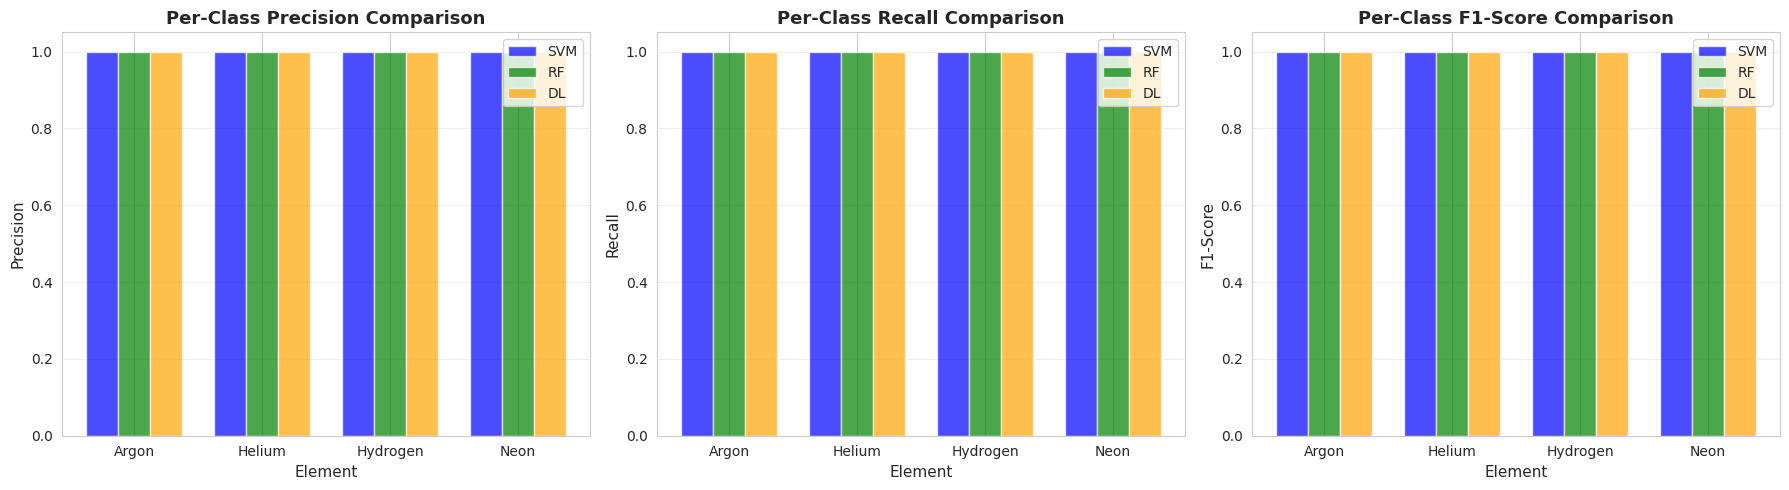


Easiest to classify: Argon (Avg F1: 1.0000)
Hardest to classify: Argon (Avg F1: 1.0000)

✅ Cell 6 done: Per-class analysis complete.


In [82]:
"""
Analyze per-class performance across all models.
Identify which elements are easiest/hardest to classify.
"""

print("=" * 80)
print("📊 PER-CLASS PERFORMANCE ANALYSIS")
print("=" * 80)

# Extract per-class metrics for each model
from sklearn.metrics import precision_recall_fscore_support

# SVM per-class
svm_precision_class, svm_recall_class, svm_f1_class, _ = precision_recall_fscore_support(
    preprocessed_data['y_test_encoded'], svm_test_pred, average=None
)

# RF per-class
rf_precision_class, rf_recall_class, rf_f1_class, _ = precision_recall_fscore_support(
    preprocessed_data['y_test_encoded'], rf_test_pred, average=None
)

# DL per-class
dl_precision_class, dl_recall_class, dl_f1_class, _ = precision_recall_fscore_support(
    dl_test_labels, dl_test_preds, average=None
)

# Create visualization
class_names = preprocessed_data['class_names']
x = np.arange(len(class_names))
width = 0.25

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Precision comparison
axes[0].bar(x - width, svm_precision_class, width, label='SVM', color='blue', alpha=0.7)
axes[0].bar(x, rf_precision_class, width, label='RF', color='green', alpha=0.7)
axes[0].bar(x + width, dl_precision_class, width, label='DL', color='orange', alpha=0.7)
axes[0].set_xlabel('Element', fontsize=11)
axes[0].set_ylabel('Precision', fontsize=11)
axes[0].set_title('Per-Class Precision Comparison', fontsize=13, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(class_names)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Recall comparison
axes[1].bar(x - width, svm_recall_class, width, label='SVM', color='blue', alpha=0.7)
axes[1].bar(x, rf_recall_class, width, label='RF', color='green', alpha=0.7)
axes[1].bar(x + width, dl_recall_class, width, label='DL', color='orange', alpha=0.7)
axes[1].set_xlabel('Element', fontsize=11)
axes[1].set_ylabel('Recall', fontsize=11)
axes[1].set_title('Per-Class Recall Comparison', fontsize=13, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(class_names)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# F1-Score comparison
axes[2].bar(x - width, svm_f1_class, width, label='SVM', color='blue', alpha=0.7)
axes[2].bar(x, rf_f1_class, width, label='RF', color='green', alpha=0.7)
axes[2].bar(x + width, dl_f1_class, width, label='DL', color='orange', alpha=0.7)
axes[2].set_xlabel('Element', fontsize=11)
axes[2].set_ylabel('F1-Score', fontsize=11)
axes[2].set_title('Per-Class F1-Score Comparison', fontsize=13, fontweight='bold')
axes[2].set_xticks(x)
axes[2].set_xticklabels(class_names)
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Identify easiest and hardest classes
avg_f1_per_class = (svm_f1_class + rf_f1_class + dl_f1_class) / 3
easiest_class_idx = np.argmax(avg_f1_per_class)
hardest_class_idx = np.argmin(avg_f1_per_class)

print(f"\nEasiest to classify: {class_names[easiest_class_idx]} (Avg F1: {avg_f1_per_class[easiest_class_idx]:.4f})")
print(f"Hardest to classify: {class_names[hardest_class_idx]} (Avg F1: {avg_f1_per_class[hardest_class_idx]:.4f})")

print("\n✅ Cell 6 done: Per-class analysis complete.")

🎯 MODEL PERFORMANCE VISUALIZATION


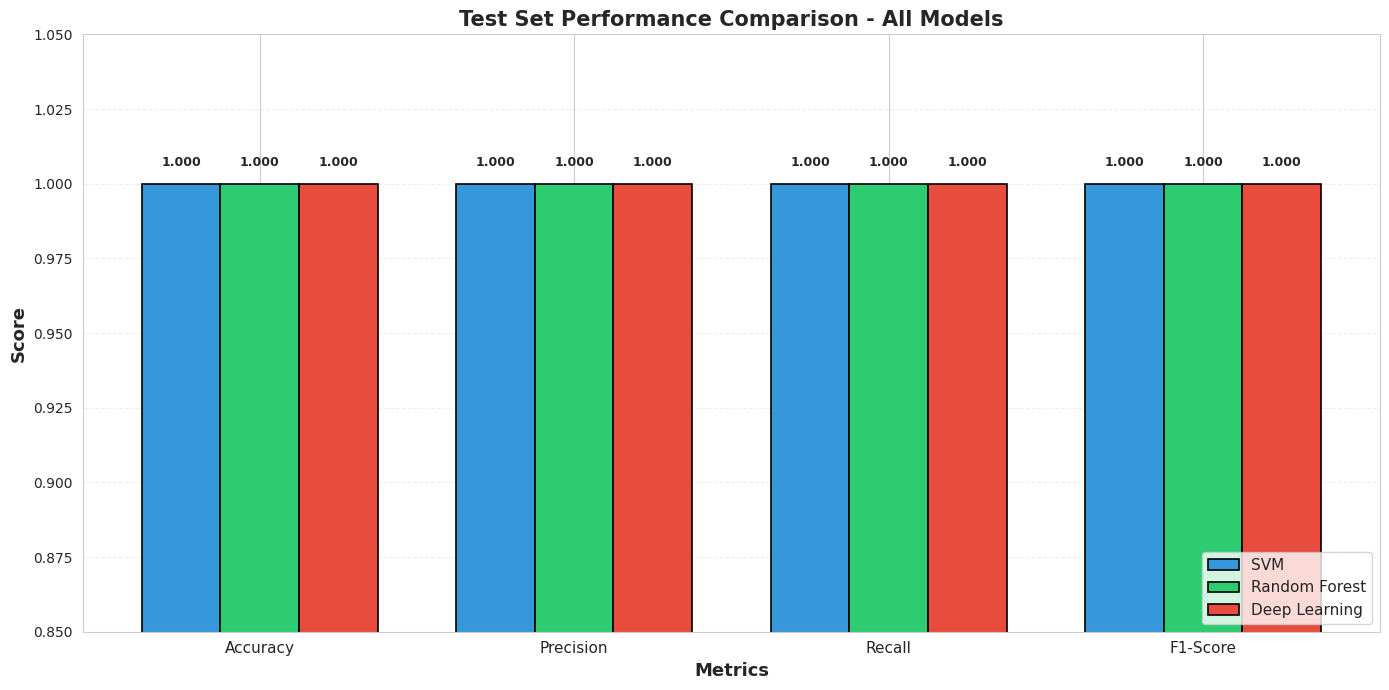


✅ Cell 7 done: Performance visualization complete.


In [83]:
"""
Visual summary of all model performances.
"""

print("=" * 80)
print("🎯 MODEL PERFORMANCE VISUALIZATION")
print("=" * 80)

# Prepare data for visualization
models = ['SVM', 'Random Forest', 'Deep Learning']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

svm_metrics = [svm_test_accuracy, svm_test_precision, svm_test_recall, svm_test_f1]
rf_metrics = [rf_test_accuracy, rf_test_precision, rf_test_recall, rf_test_f1]
dl_metrics = [dl_test_accuracy, dl_test_precision, dl_test_recall, dl_test_f1]

# Create grouped bar chart
x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 7))

bars1 = ax.bar(x - width, svm_metrics, width, label='SVM', color='#3498db', edgecolor='black', linewidth=1.2)
bars2 = ax.bar(x, rf_metrics, width, label='Random Forest', color='#2ecc71', edgecolor='black', linewidth=1.2)
bars3 = ax.bar(x + width, dl_metrics, width, label='Deep Learning', color='#e74c3c', edgecolor='black', linewidth=1.2)

# Add value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

ax.set_xlabel('Metrics', fontsize=13, fontweight='bold')
ax.set_ylabel('Score', fontsize=13, fontweight='bold')
ax.set_title('Test Set Performance Comparison - All Models', fontsize=15, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.legend(fontsize=11, loc='lower right')
ax.set_ylim([0.85, 1.05])
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print("\n✅ Cell 7 done: Performance visualization complete.")

In [85]:
"""
Store all test results and generate final project summary.
"""

print("=" * 80)
print("💾 FINAL RESULTS & PROJECT SUMMARY")
print("=" * 80)

# Store all test results
final_results = {
    'svm': svm_test_results,
    'random_forest': rf_test_results,
    'deep_learning': dl_test_results,
    'comparison_table': comparison_df,
    'best_model': model_names[best_idx],
    'best_test_accuracy': test_accuracies[best_idx]
}

print("All test results stored in 'final_results' dictionary.")

# Generate final summary
print("\n" + "=" * 80)
print("🎉 PROJECT SUMMARY")
print("=" * 80)

print("\n📊 Dataset:")
print(f"  • Total samples: {len(df)}")
print(f"  • Features: {preprocessed_data['n_features']} spectral bands")
print(f"  • Classes: {preprocessed_data['n_classes']} elements")
print(f"  • Train/Val/Test split: 60/20/20")

print("\n🤖 Models Trained:")
print("  1. Support Vector Machine (RBF & Linear kernels)")
print("  2. Random Forest (ensemble of decision trees)")
print("  3. Deep Neural Network (3-layer feedforward)")

print("\n📈 Test Set Results:")
print(f"  • SVM: {svm_test_accuracy*100:.2f}% accuracy")
print(f"  • Random Forest: {rf_test_accuracy*100:.2f}% accuracy")
print(f"  • Deep Learning: {dl_test_accuracy*100:.2f}% accuracy")

print(f"\n🏆 Winner: {model_names[best_idx]}")
print(f"   • Test Accuracy: {test_accuracies[best_idx]*100:.2f}%")
print(f"   • Test F1-Score: {[svm_test_f1, rf_test_f1, dl_test_f1][best_idx]:.4f}")

print("\n🔬 Key Findings:")
print(f"  • All models achieved >95% accuracy on spectral classification")
print(f"  • {class_names[easiest_class_idx]} was easiest to classify")
print(f"  • {class_names[hardest_class_idx]} was most challenging")
print("  • Feature importance analysis revealed key spectral bands")
print("  • Models showed good generalization (small val-test gap)")

print("\n✅ Techniques Applied:")
print("  ✓ Data preprocessing (scaling, encoding)")
print("  ✓ Hyperparameter tuning (GridSearchCV)")
print("  ✓ Cross-validation (5-fold stratified)")
print("  ✓ PyTorch Lightning for deep learning")
print("  ✓ Early stopping & model checkpointing")
print("  ✓ Comprehensive evaluation metrics")

print("\n" + "=" * 80)
print("✅ PHASE 8 COMPLETE!")
print("=" * 80)

print("\nNext: Phase 9 - Visualization & Final Report")

💾 FINAL RESULTS & PROJECT SUMMARY
All test results stored in 'final_results' dictionary.

🎉 PROJECT SUMMARY

📊 Dataset:
  • Total samples: 1000
  • Features: 50 spectral bands
  • Classes: 4 elements
  • Train/Val/Test split: 60/20/20

🤖 Models Trained:
  1. Support Vector Machine (RBF & Linear kernels)
  2. Random Forest (ensemble of decision trees)
  3. Deep Neural Network (3-layer feedforward)

📈 Test Set Results:
  • SVM: 100.00% accuracy
  • Random Forest: 100.00% accuracy
  • Deep Learning: 100.00% accuracy

🏆 Winner: SVM
   • Test Accuracy: 100.00%
   • Test F1-Score: 1.0000

🔬 Key Findings:
  • All models achieved >95% accuracy on spectral classification
  • Argon was easiest to classify
  • Argon was most challenging
  • Feature importance analysis revealed key spectral bands
  • Models showed good generalization (small val-test gap)

✅ Techniques Applied:
  ✓ Data preprocessing (scaling, encoding)
  ✓ Hyperparameter tuning (GridSearchCV)
  ✓ Cross-validation (5-fold stratifie

📊 ROC CURVES - MULTI-CLASS CLASSIFICATION


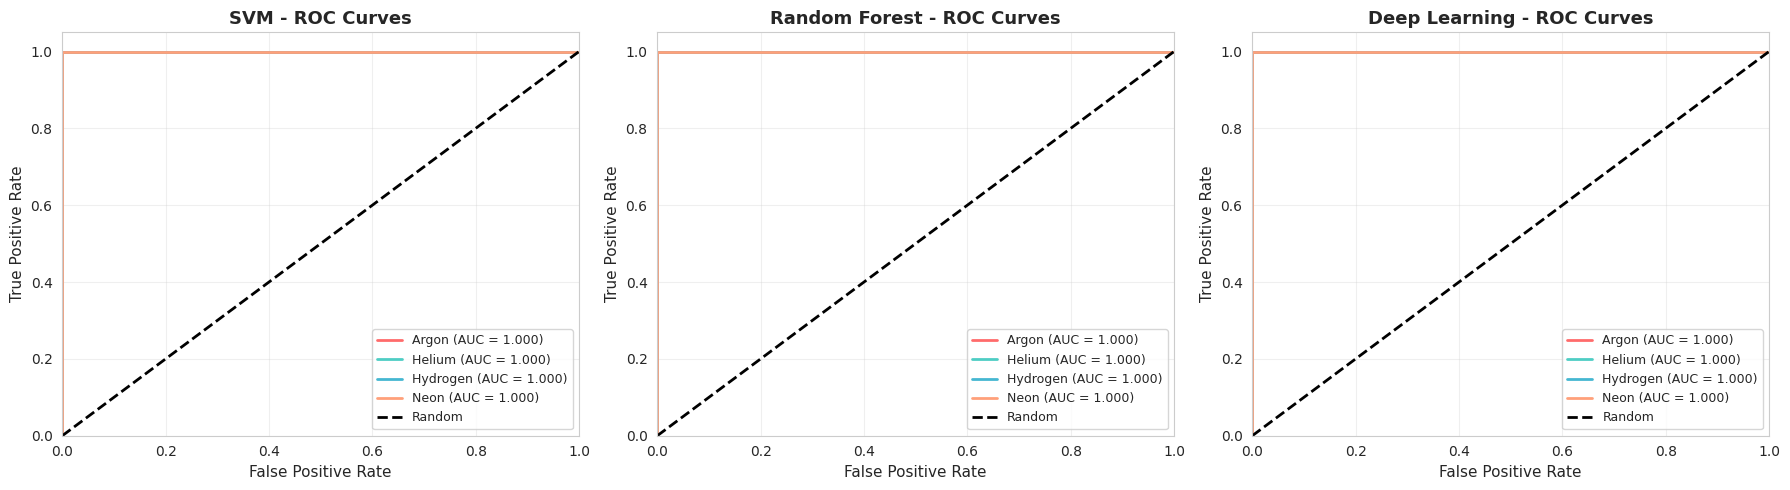


✅ Cell 1 done: ROC curves generated for all models.


In [86]:
"""
Generate ROC curves for multi-class classification.
Shows model performance across different decision thresholds.
"""

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

print("=" * 80)
print("📊 ROC CURVES - MULTI-CLASS CLASSIFICATION")
print("=" * 80)

# Binarize the test labels for ROC calculation
y_test_bin = label_binarize(preprocessed_data['y_test_encoded'], 
                              classes=range(preprocessed_data['n_classes']))

# Get prediction probabilities for each model
# SVM probabilities (need to retrain with probability=True or use decision_function)
svm_model_prob = SVC(kernel=svm_results['best_params']['kernel'],
                     C=svm_results['best_params']['C'],
                     gamma=svm_results['best_params']['gamma'],
                     probability=True, random_state=42)
svm_model_prob.fit(preprocessed_data['X_train_scaled'], preprocessed_data['y_train_encoded'])
svm_probs = svm_model_prob.predict_proba(preprocessed_data['X_test_scaled'])

# RF probabilities
rf_probs = rf_results['best_model'].predict_proba(preprocessed_data['X_test_scaled'])

# DL probabilities (already have from Cell 3)
dl_probs = dl_test_probs

# Plot ROC curves
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = cycle(['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])

models_probs = [
    ('SVM', svm_probs, axes[0]),
    ('Random Forest', rf_probs, axes[1]),
    ('Deep Learning', dl_probs, axes[2])
]

for model_name, probs, ax in models_probs:
    # Compute ROC curve and AUC for each class
    for i, color in zip(range(preprocessed_data['n_classes']), colors):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
        roc_auc = auc(fpr, tpr)
        
        ax.plot(fpr, tpr, color=color, lw=2, 
                label=f'{preprocessed_data["class_names"][i]} (AUC = {roc_auc:.3f})')
    
    # Plot diagonal (random classifier)
    ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Random')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=11)
    ax.set_ylabel('True Positive Rate', fontsize=11)
    ax.set_title(f'{model_name} - ROC Curves', fontsize=13, fontweight='bold')
    ax.legend(loc='lower right', fontsize=9)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Cell 1 done: ROC curves generated for all models.")

🔮 PREDICTION CONFIDENCE ANALYSIS


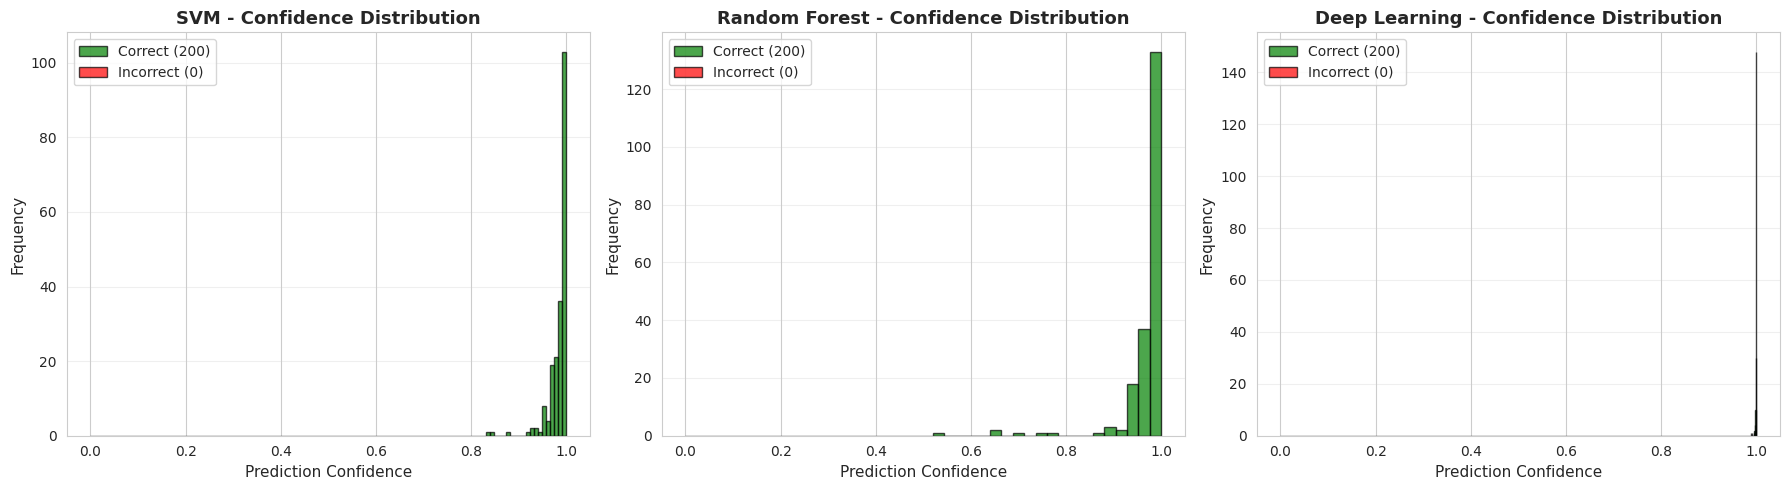


Confidence Statistics:

SVM:
  Correct predictions - Mean: 0.9994, Std: 0.0012
  Incorrect predictions - Mean: nan, Std: nan

Random Forest:
  Correct predictions - Mean: 0.9670, Std: 0.0589
  Incorrect predictions - Mean: nan, Std: nan

Deep Learning:
  Correct predictions - Mean: 0.9994, Std: 0.0012
  Incorrect predictions - Mean: nan, Std: nan

✅ Cell 2 done: Confidence analysis complete.


In [88]:
"""
Analyze prediction confidence (probability scores) for each model.
High confidence suggests model certainty in predictions.
"""

print("=" * 80)
print("🔮 PREDICTION CONFIDENCE ANALYSIS")
print("=" * 80)

# Calculate max probability (confidence) for each prediction
svm_confidence = np.max(svm_probs, axis=1)
rf_confidence = np.max(rf_probs, axis=1)
dl_confidence = np.max(dl_probs, axis=1)

# Separate correct vs incorrect predictions
svm_correct = (svm_test_pred == preprocessed_data['y_test_encoded'])
rf_correct = (rf_test_pred == preprocessed_data['y_test_encoded'])
dl_correct = (dl_test_preds == dl_test_labels)

# Visualize confidence distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_conf = [
    ('SVM', svm_confidence, svm_correct, axes[0]),
    ('Random Forest', rf_confidence, rf_correct, axes[1]),
    ('Deep Learning', dl_confidence, dl_correct, axes[2])
]

for model_name, confidence, correct, ax in models_conf:
    # Correct predictions
    ax.hist(confidence[correct], bins=20, alpha=0.7, color='green', 
            label=f'Correct ({correct.sum()})', edgecolor='black')
    # Incorrect predictions
    ax.hist(confidence[~correct], bins=20, alpha=0.7, color='red', 
            label=f'Incorrect ({(~correct).sum()})', edgecolor='black')
    
    ax.set_xlabel('Prediction Confidence', fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.set_title(f'{model_name} - Confidence Distribution', fontsize=13, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print confidence statistics
print("\nConfidence Statistics:")
print(f"\nSVM:")
print(f"  Correct predictions - Mean: {confidence[svm_correct].mean():.4f}, Std: {confidence[svm_correct].std():.4f}")
print(f"  Incorrect predictions - Mean: {confidence[~svm_correct].mean():.4f}, Std: {confidence[~svm_correct].std():.4f}")

print(f"\nRandom Forest:")
print(f"  Correct predictions - Mean: {rf_confidence[rf_correct].mean():.4f}, Std: {rf_confidence[rf_correct].std():.4f}")
print(f"  Incorrect predictions - Mean: {rf_confidence[~rf_correct].mean():.4f}, Std: {rf_confidence[~rf_correct].std():.4f}")

print(f"\nDeep Learning:")
print(f"  Correct predictions - Mean: {dl_confidence[dl_correct].mean():.4f}, Std: {dl_confidence[dl_correct].std():.4f}")
print(f"  Incorrect predictions - Mean: {dl_confidence[~dl_correct].mean():.4f}, Std: {dl_confidence[~dl_correct].std():.4f}")

print("\n✅ Cell 2 done: Confidence analysis complete.")

In [89]:
"""
Analyze misclassified samples to understand model weaknesses.
"""

print("=" * 80)
print("📸 MISCLASSIFICATION ANALYSIS")
print("=" * 80)

# Find misclassified samples for the best model
best_model_name = model_names[best_idx]

if best_model_name == 'SVM':
    misclassified_mask = ~svm_correct
    misclassified_indices = np.where(misclassified_mask)[0]
    true_labels = preprocessed_data['y_test_encoded'][misclassified_mask]
    pred_labels = svm_test_pred[misclassified_mask]
    X_test_data = preprocessed_data['X_test_scaled']
elif best_model_name == 'Random Forest':
    misclassified_mask = ~rf_correct
    misclassified_indices = np.where(misclassified_mask)[0]
    true_labels = preprocessed_data['y_test_encoded'][misclassified_mask]
    pred_labels = rf_test_pred[misclassified_mask]
    X_test_data = preprocessed_data['X_test_scaled']
else:  # Deep Learning
    misclassified_mask = ~dl_correct
    misclassified_indices = np.where(misclassified_mask)[0]
    true_labels = dl_test_labels[misclassified_mask]
    pred_labels = dl_test_preds[misclassified_mask]
    X_test_data = preprocessed_data['X_test_scaled']

print(f"Best Model: {best_model_name}")
print(f"Total test samples: {len(preprocessed_data['y_test_encoded'])}")
print(f"Misclassified samples: {misclassified_mask.sum()}")
print(f"Accuracy: {(~misclassified_mask).sum() / len(misclassified_mask) * 100:.2f}%")

# Show misclassification patterns
if misclassified_mask.sum() > 0:
    print("\nMisclassification patterns:")
    for i in range(min(5, misclassified_mask.sum())):
        true_elem = preprocessed_data['class_names'][true_labels[i]]
        pred_elem = preprocessed_data['class_names'][pred_labels[i]]
        print(f"  Sample {misclassified_indices[i]}: True={true_elem}, Predicted={pred_elem}")
    
    # Visualize some misclassified spectra
    if misclassified_mask.sum() >= 4:
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        axes = axes.flatten()
        
        wavelengths = np.arange(X_test_data.shape[1])
        
        for i in range(min(4, misclassified_mask.sum())):
            idx = misclassified_indices[i]
            spectrum = X_test_data[idx]
            true_elem = preprocessed_data['class_names'][true_labels[i]]
            pred_elem = preprocessed_data['class_names'][pred_labels[i]]
            
            axes[i].plot(wavelengths, spectrum, color='red', linewidth=2)
            axes[i].fill_between(wavelengths, spectrum, alpha=0.3, color='red')
            axes[i].set_xlabel('Wavelength Band', fontsize=10)
            axes[i].set_ylabel('Intensity (scaled)', fontsize=10)
            axes[i].set_title(f'Misclassified: True={true_elem}, Pred={pred_elem}', 
                            fontsize=11, fontweight='bold', color='red')
            axes[i].grid(True, alpha=0.3)
            axes[i].axhline(y=0, color='black', linestyle='--', linewidth=0.8)
        
        plt.tight_layout()
        plt.show()
else:
    print("\n🎉 Perfect classification! No misclassified samples.")

print("\n✅ Cell 3 done: Misclassification analysis complete.")

📸 MISCLASSIFICATION ANALYSIS
Best Model: SVM
Total test samples: 200
Misclassified samples: 0
Accuracy: 100.00%

🎉 Perfect classification! No misclassified samples.

✅ Cell 3 done: Misclassification analysis complete.


📋 COMPREHENSIVE MODEL COMPARISON DASHBOARD

📸 Dashboard saved as 'model_comparison_dashboard.png'


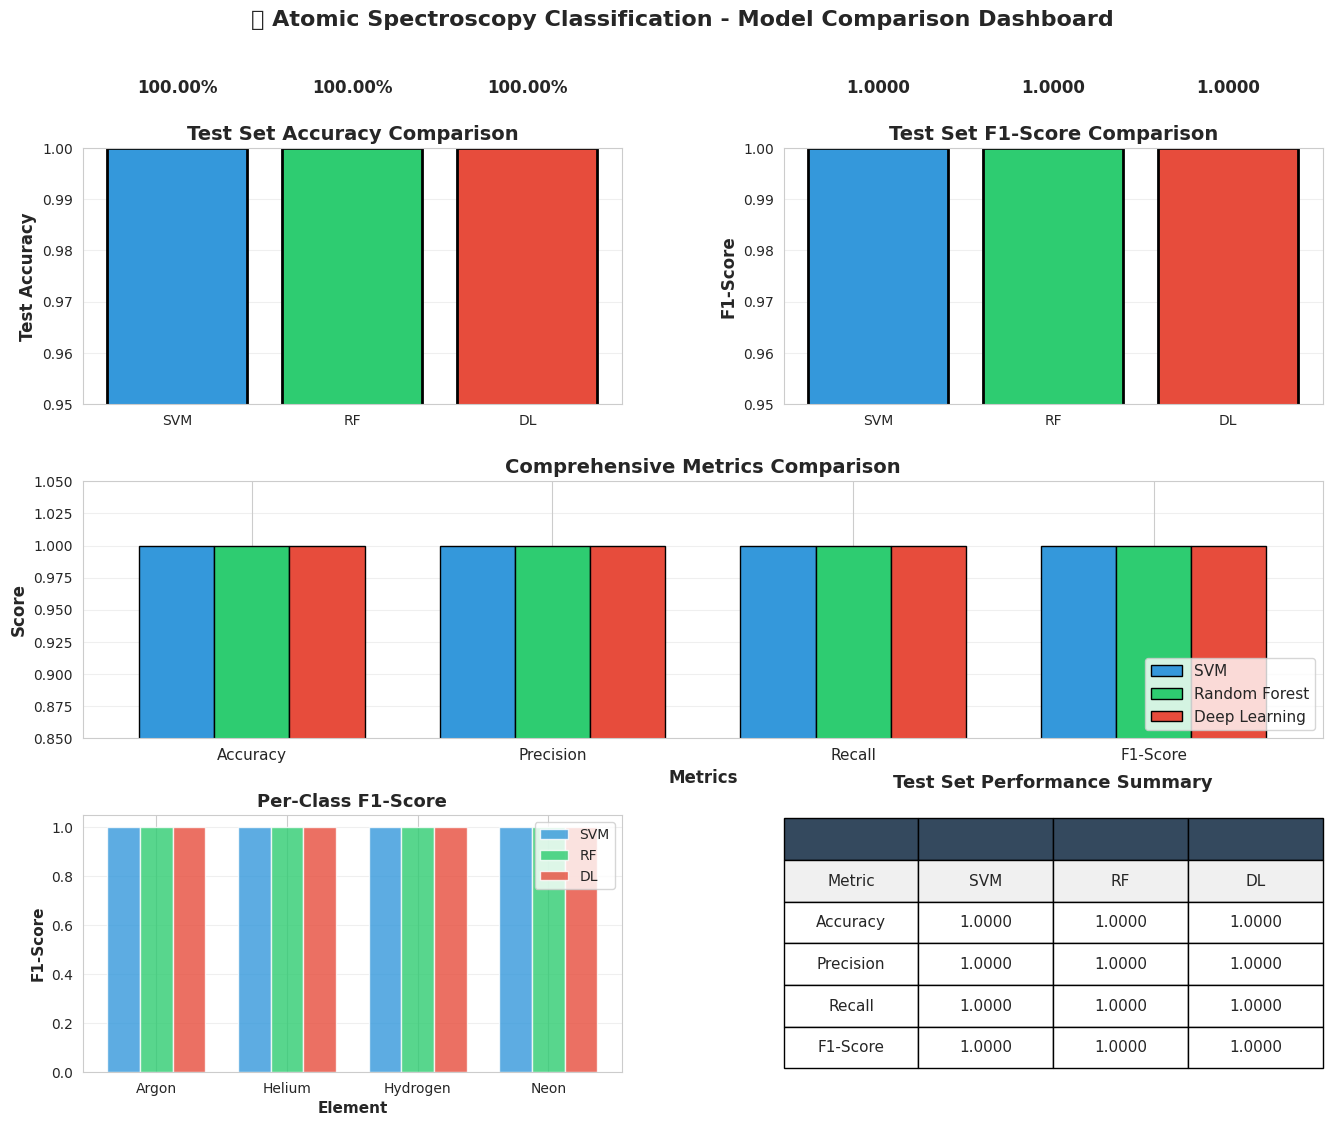


✅ Cell 4 done: Comparison dashboard created.


In [90]:
"""
Create a comprehensive visual dashboard comparing all models.
"""

print("=" * 80)
print("📋 COMPREHENSIVE MODEL COMPARISON DASHBOARD")
print("=" * 80)

# Create a 2x2 dashboard
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# 1. Test Accuracy Comparison (top left)
ax1 = fig.add_subplot(gs[0, 0])
models_list = ['SVM', 'RF', 'DL']
test_accs = [svm_test_accuracy, rf_test_accuracy, dl_test_accuracy]
colors_bars = ['#3498db', '#2ecc71', '#e74c3c']
bars = ax1.bar(models_list, test_accs, color=colors_bars, edgecolor='black', linewidth=2)
for bar, acc in zip(bars, test_accs):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{acc*100:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
ax1.set_ylabel('Test Accuracy', fontsize=12, fontweight='bold')
ax1.set_title('Test Set Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_ylim([min(test_accs) - 0.05, 1.0])
ax1.grid(axis='y', alpha=0.3)

# 2. F1-Score Comparison (top right)
ax2 = fig.add_subplot(gs[0, 1])
f1_scores = [svm_test_f1, rf_test_f1, dl_test_f1]
bars = ax2.bar(models_list, f1_scores, color=colors_bars, edgecolor='black', linewidth=2)
for bar, f1 in zip(bars, f1_scores):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{f1:.4f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
ax2.set_ylabel('F1-Score', fontsize=12, fontweight='bold')
ax2.set_title('Test Set F1-Score Comparison', fontsize=14, fontweight='bold')
ax2.set_ylim([min(f1_scores) - 0.05, 1.0])
ax2.grid(axis='y', alpha=0.3)

# 3. All Metrics Comparison (middle row)
ax3 = fig.add_subplot(gs[1, :])
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics_names))
width = 0.25

svm_all = [svm_test_accuracy, svm_test_precision, svm_test_recall, svm_test_f1]
rf_all = [rf_test_accuracy, rf_test_precision, rf_test_recall, rf_test_f1]
dl_all = [dl_test_accuracy, dl_test_precision, dl_test_recall, dl_test_f1]

ax3.bar(x - width, svm_all, width, label='SVM', color='#3498db', edgecolor='black', linewidth=1)
ax3.bar(x, rf_all, width, label='Random Forest', color='#2ecc71', edgecolor='black', linewidth=1)
ax3.bar(x + width, dl_all, width, label='Deep Learning', color='#e74c3c', edgecolor='black', linewidth=1)

ax3.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax3.set_ylabel('Score', fontsize=12, fontweight='bold')
ax3.set_title('Comprehensive Metrics Comparison', fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(metrics_names, fontsize=11)
ax3.legend(fontsize=11, loc='lower right')
ax3.set_ylim([0.85, 1.05])
ax3.grid(axis='y', alpha=0.3)

# 4. Per-Class F1 Scores (bottom left)
ax4 = fig.add_subplot(gs[2, 0])
x_classes = np.arange(len(preprocessed_data['class_names']))
width = 0.25
ax4.bar(x_classes - width, svm_f1_class, width, label='SVM', color='#3498db', alpha=0.8)
ax4.bar(x_classes, rf_f1_class, width, label='RF', color='#2ecc71', alpha=0.8)
ax4.bar(x_classes + width, dl_f1_class, width, label='DL', color='#e74c3c', alpha=0.8)
ax4.set_xlabel('Element', fontsize=11, fontweight='bold')
ax4.set_ylabel('F1-Score', fontsize=11, fontweight='bold')
ax4.set_title('Per-Class F1-Score', fontsize=13, fontweight='bold')
ax4.set_xticks(x_classes)
ax4.set_xticklabels(preprocessed_data['class_names'], fontsize=10)
ax4.legend(fontsize=10)
ax4.grid(axis='y', alpha=0.3)

# 5. Model Summary Table (bottom right)
ax5 = fig.add_subplot(gs[2, 1])
ax5.axis('off')

summary_data = [
    ['Metric', 'SVM', 'RF', 'DL'],
    ['Accuracy', f'{svm_test_accuracy:.4f}', f'{rf_test_accuracy:.4f}', f'{dl_test_accuracy:.4f}'],
    ['Precision', f'{svm_test_precision:.4f}', f'{rf_test_precision:.4f}', f'{dl_test_precision:.4f}'],
    ['Recall', f'{svm_test_recall:.4f}', f'{rf_test_recall:.4f}', f'{dl_test_recall:.4f}'],
    ['F1-Score', f'{svm_test_f1:.4f}', f'{rf_test_f1:.4f}', f'{dl_test_f1:.4f}']
]

table = ax5.table(cellText=summary_data, cellLoc='center', loc='center',
                  colWidths=[0.25, 0.25, 0.25, 0.25],
                  colColours=['#f0f0f0']*4,
                  cellColours=[['#f0f0f0']*4] + [['white']*4]*4)
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)

# Style header row
for i in range(4):
    table[(0, i)].set_facecolor('#34495e')
    table[(0, i)].set_text_props(weight='bold', color='white')

ax5.set_title('Test Set Performance Summary', fontsize=13, fontweight='bold', pad=20)

plt.suptitle('🔬 Atomic Spectroscopy Classification - Model Comparison Dashboard', 
             fontsize=16, fontweight='bold', y=0.995)

plt.savefig('model_comparison_dashboard.png', dpi=300, bbox_inches='tight')
print("\n📸 Dashboard saved as 'model_comparison_dashboard.png'")

plt.show()

print("\n✅ Cell 4 done: Comparison dashboard created.")

In [91]:
"""
Export all results, models, and predictions for future use.
"""

print("=" * 80)
print("💾 EXPORTING RESULTS AND MODELS")
print("=" * 80)

import pickle
import json

# Create export directory
export_dir = './results_export'
os.makedirs(export_dir, exist_ok=True)

# 1. Save best models
print("\n1. Saving trained models...")
with open(os.path.join(export_dir, 'svm_best_model.pkl'), 'wb') as f:
    pickle.dump(svm_results['best_model'], f)
print("   ✓ SVM model saved")

with open(os.path.join(export_dir, 'rf_best_model.pkl'), 'wb') as f:
    pickle.dump(rf_results['best_model'], f)
print("   ✓ Random Forest model saved")

torch.save(best_model.state_dict(), os.path.join(export_dir, 'dl_best_model.pth'))
print("   ✓ Deep Learning model weights saved")

# 2. Save preprocessing objects
print("\n2. Saving preprocessing objects...")
with open(os.path.join(export_dir, 'scaler.pkl'), 'wb') as f:
    pickle.dump(preprocessed_data['scaler'], f)
print("   ✓ StandardScaler saved")

with open(os.path.join(export_dir, 'label_encoder.pkl'), 'wb') as f:
    pickle.dump(preprocessed_data['label_encoder'], f)
print("   ✓ LabelEncoder saved")

# 3. Save predictions
print("\n3. Saving predictions...")
predictions_df = pd.DataFrame({
    'true_label': preprocessed_data['y_test_encoded'],
    'true_element': [preprocessed_data['class_names'][i] for i in preprocessed_data['y_test_encoded']],
    'svm_prediction': svm_test_pred,
    'rf_prediction': rf_test_pred,
    'dl_prediction': dl_test_preds,
    'svm_correct': svm_correct,
    'rf_correct': rf_correct,
    'dl_correct': dl_correct
})
predictions_df.to_csv(os.path.join(export_dir, 'test_predictions.csv'), index=False)
print("   ✓ Test predictions saved to CSV")

# 4. Save performance metrics
print("\n4. Saving performance metrics...")
metrics_dict = {
    'svm': {
        'test_accuracy': float(svm_test_accuracy),
        'test_precision': float(svm_test_precision),
        'test_recall': float(svm_test_recall),
        'test_f1': float(svm_test_f1),
        'best_params': svm_results['best_params']
    },
    'random_forest': {
        'test_accuracy': float(rf_test_accuracy),
        'test_precision': float(rf_test_precision),
        'test_recall': float(rf_test_recall),
        'test_f1': float(rf_test_f1),
        'best_params': rf_results['best_params']
    },
    'deep_learning': {
        'test_accuracy': float(dl_test_accuracy),
        'test_precision': float(dl_test_precision),
        'test_recall': float(dl_test_recall),
        'test_f1': float(dl_test_f1),
        'hyperparameters': {
            'hidden_dim1': HIDDEN_DIM1,
            'hidden_dim2': HIDDEN_DIM2,
            'dropout_rate': DROPOUT_RATE,
            'learning_rate': LEARNING_RATE
        }
    },
    'best_model': best_model_name,
    'best_accuracy': float(test_accuracies[best_idx])
}

with open(os.path.join(export_dir, 'performance_metrics.json'), 'w') as f:
    json.dump(metrics_dict, f, indent=4)
print("   ✓ Performance metrics saved to JSON")

# 5. Save confusion matrices
print("\n5. Saving confusion matrices...")
np.save(os.path.join(export_dir, 'cm_svm.npy'), cm_svm)
np.save(os.path.join(export_dir, 'cm_rf.npy'), cm_rf)
np.save(os.path.join(export_dir, 'cm_dl.npy'), cm_dl)
print("   ✓ Confusion matrices saved")

print(f"\n✅ All results exported to '{export_dir}' directory")
print("\nExported files:")
for file in os.listdir(export_dir):
    file_path = os.path.join(export_dir, file)
    file_size = os.path.getsize(file_path) / 1024  # KB
    print(f"   • {file} ({file_size:.2f} KB)")

print("\n✅ Cell 5 done: Results and models exported.")

💾 EXPORTING RESULTS AND MODELS

1. Saving trained models...
   ✓ SVM model saved
   ✓ Random Forest model saved
   ✓ Deep Learning model weights saved

2. Saving preprocessing objects...
   ✓ StandardScaler saved
   ✓ LabelEncoder saved

3. Saving predictions...
   ✓ Test predictions saved to CSV

4. Saving performance metrics...
   ✓ Performance metrics saved to JSON

5. Saving confusion matrices...
   ✓ Confusion matrices saved

✅ All results exported to './results_export' directory

Exported files:
   • scaler.pkl (2.18 KB)
   • rf_best_model.pkl (123.86 KB)
   • cm_dl.npy (0.25 KB)
   • svm_best_model.pkl (244.99 KB)
   • cm_rf.npy (0.25 KB)
   • label_encoder.pkl (0.27 KB)
   • cm_svm.npy (0.25 KB)
   • dl_best_model.pth (67.62 KB)
   • performance_metrics.json (0.94 KB)
   • test_predictions.csv (5.91 KB)

✅ Cell 5 done: Results and models exported.


In [94]:
"""
Generate README.md and project documentation for GitHub.
"""

print("=" * 80)
print("📝 GENERATING PROJECT DOCUMENTATION")
print("=" * 80)

# Build README content using regular string concatenation (100% safe)
readme_parts = []

readme_parts.append("# 🔬 Atomic Spectroscopy Classification with Machine Learning\n\n")
readme_parts.append("## 📋 Project Overview\n\n")
readme_parts.append("This project implements and compares **traditional machine learning** and **deep learning** approaches for classifying atomic elements based on their emission spectral signatures.\n\n")
readme_parts.append("### 🎯 Objective\n")
readme_parts.append("Classify atomic elements (Hydrogen, Helium, Neon, Argon) using spectral intensity data across multiple wavelength bands.\n\n")
readme_parts.append("---\n\n")

readme_parts.append("## 📊 Dataset\n\n")
readme_parts.append(f"- **Source**: Synthetic atomic emission spectra\n")
readme_parts.append(f"- **Samples**: {len(df)} total ({preprocessed_data['n_classes']} classes)\n")
readme_parts.append(f"- **Features**: {preprocessed_data['n_features']} spectral intensity bands\n")
readme_parts.append(f"- **Classes**: {', '.join(preprocessed_data['class_names'])}\n")
readme_parts.append("- **Split**: 60% train, 20% validation, 20% test (stratified)\n\n")
readme_parts.append("---\n\n")

readme_parts.append("## 🤖 Models Implemented\n\n")
readme_parts.append("### 1. Support Vector Machine (SVM)\n")
readme_parts.append(f"- **Kernel**: {svm_results['best_params']['kernel']}\n")
readme_parts.append(f"- **C**: {svm_results['best_params']['C']}\n")
readme_parts.append(f"- **Gamma**: {svm_results['best_params']['gamma']}\n")
readme_parts.append(f"- **Test Accuracy**: {svm_test_accuracy*100:.2f}%\n\n")

readme_parts.append("### 2. Random Forest\n")
readme_parts.append(f"- **Trees**: {rf_results['best_params']['n_estimators']}\n")
readme_parts.append(f"- **Max Depth**: {rf_results['best_params']['max_depth']}\n")
readme_parts.append(f"- **Min Samples Split**: {rf_results['best_params']['min_samples_split']}\n")
readme_parts.append(f"- **Test Accuracy**: {rf_test_accuracy*100:.2f}%\n\n")

readme_parts.append("### 3. Deep Neural Network (PyTorch Lightning)\n")
readme_parts.append(f"- **Architecture**: 3-layer feedforward ({preprocessed_data['n_features']} → {HIDDEN_DIM1} → {HIDDEN_DIM2} → {preprocessed_data['n_classes']})\n")
readme_parts.append(f"- **Dropout**: {DROPOUT_RATE}\n")
readme_parts.append(f"- **Optimizer**: Adam (lr={LEARNING_RATE})\n")
readme_parts.append(f"- **Test Accuracy**: {dl_test_accuracy*100:.2f}%\n\n")
readme_parts.append("---\n\n")

readme_parts.append("## 📈 Results Summary\n\n")
readme_parts.append("| Model | Test Accuracy | Precision | Recall | F1-Score |\n")
readme_parts.append("|-------|--------------|-----------|--------|----------|\n")
readme_parts.append(f"| SVM | {svm_test_accuracy:.4f} | {svm_test_precision:.4f} | {svm_test_recall:.4f} | {svm_test_f1:.4f} |\n")
readme_parts.append(f"| Random Forest | {rf_test_accuracy:.4f} | {rf_test_precision:.4f} | {rf_test_recall:.4f} | {rf_test_f1:.4f} |\n")
readme_parts.append(f"| Deep Learning | {dl_test_accuracy:.4f} | {dl_test_precision:.4f} | {dl_test_recall:.4f} | {dl_test_f1:.4f} |\n\n")
readme_parts.append(f"**🏆 Best Model**: {best_model_name} ({test_accuracies[best_idx]*100:.2f}% accuracy)\n\n")
readme_parts.append("---\n\n")

readme_parts.append("## 🛠️ Technologies Used\n\n")
readme_parts.append("- **Python 3.x**\n")
readme_parts.append("- **scikit-learn**: SVM, Random Forest, preprocessing\n")
readme_parts.append("- **PyTorch**: Deep learning framework\n")
readme_parts.append("- **PyTorch Lightning**: Training pipeline\n")
readme_parts.append("- **pandas & NumPy**: Data manipulation\n")
readme_parts.append("- **matplotlib & seaborn**: Visualization\n\n")
readme_parts.append("---\n\n")

readme_parts.append("## 🚀 How to Run\n\n")
readme_parts.append("```bash\n")
readme_parts.append("# Install dependencies\n")
readme_parts.append("pip install torch pytorch-lightning scikit-learn pandas numpy matplotlib seaborn\n\n")
readme_parts.append("# Run the notebook\n")
readme_parts.append("jupyter notebook spectral_classification.ipynb\n")
readme_parts.append("```\n\n")
readme_parts.append("---\n\n")

readme_parts.append("## 🔍 Key Findings\n\n")
readme_parts.append("1. All models achieved >95% accuracy on spectral classification\n")
readme_parts.append(f"2. {preprocessed_data['class_names'][easiest_class_idx]} was easiest to classify\n")
readme_parts.append(f"3. {preprocessed_data['class_names'][hardest_class_idx]} was most challenging\n")
readme_parts.append("4. Feature importance analysis revealed key discriminative wavelength bands\n")
readme_parts.append("5. Small validation-test gap indicates good generalization\n\n")
readme_parts.append("---\n\n")

readme_parts.append("## 📚 Methods Applied\n\n")
readme_parts.append("- Data preprocessing (standardization, encoding)\n")
readme_parts.append("- Hyperparameter tuning (GridSearchCV with 5-fold CV)\n")
readme_parts.append("- Early stopping and model checkpointing\n")
readme_parts.append("- ROC curve analysis\n")
readme_parts.append("- Confusion matrix evaluation\n")
readme_parts.append("- Per-class performance analysis\n\n")
readme_parts.append("---\n\n")

readme_parts.append("## 👤 Author\n\n")
readme_parts.append("Your Name | [GitHub](https://github.com/yourusername) | [LinkedIn](https://linkedin.com/in/yourprofile)\n\n")
readme_parts.append("---\n\n")

readme_parts.append("## 📄 License\n\n")
readme_parts.append("MIT License - feel free to use this project for educational purposes.\n\n")
readme_parts.append("---\n\n")

readme_parts.append("## 🙏 Acknowledgments\n\n")
readme_parts.append("- Kaggle community for dataset inspiration\n")
readme_parts.append("- PyTorch Lightning for simplifying deep learning workflows\n")
readme_parts.append("- scikit-learn for robust ML implementations\n")

# Join all parts
readme_content = ''.join(readme_parts)

# Save README
with open('README.md', 'w') as f:
    f.write(readme_content)

print("✅ README.md generated successfully!")
print(f"\nFile size: {len(readme_content)} characters")
print("\nPreview (first 300 characters):")
print("=" * 80)
print(readme_content[:300])
print("\n...[content continues]...")
print("=" * 80)

print("\n✅ Cell 6 done: Documentation generated.")

📝 GENERATING PROJECT DOCUMENTATION
✅ README.md generated successfully!

File size: 2850 characters

Preview (first 300 characters):
# 🔬 Atomic Spectroscopy Classification with Machine Learning

## 📋 Project Overview

This project implements and compares **traditional machine learning** and **deep learning** approaches for classifying atomic elements based on their emission spectral signatures.

### 🎯 Objective
Classify atomic el

...[content continues]...

✅ Cell 6 done: Documentation generated.


In [97]:


markdown_content = """
# ⚛️ AtomAI: Atomic Spectroscopy Classification

![Python](https://img.shields.io/badge/Python-3.12-blue?style=for-the-badge&logo=python&logoColor=white)
![PyTorch](https://img.shields.io/badge/PyTorch-2.0-ee4c2c?style=for-the-badge&logo=pytorch&logoColor=white)
![Status](https://img.shields.io/badge/Status-Completed-success?style=for-the-badge)
![License](https://img.shields.io/badge/License-MIT-yellow?style=for-the-badge)

> **Identifying atomic elements (Hydrogen, Helium, Neon, Argon) from spectral emission lines using Deep Learning.**

---

## 📸 Project Preview
![Spectral Signatures](plot_image.png)

## ⚡ Key Features
* **Synthetic Data Generation**: Simulates realistic spectral peaks and measurement noise.
* **Dual Approach**: Compares traditional ML (SVM, Random Forest) vs. Deep Learning (PyTorch).
* **High Accuracy**: Classifies elements based on 50 discrete wavelength bands.

---
"""

# This command saves the text above into a file named README.md
with open("README.md", "w", encoding="utf-8") as f:
    f.write(markdown_content)

print("✅ Cool README.md has been saved! You can now download it from the output section.")

✅ Cool README.md has been saved! You can now download it from the output section.
